In [3]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
def add_time_features(df):
    df['OutDate'] = pd.to_datetime(df['OutDate'])
    df['EncodedSales'] = df['EncodedSales'].astype('category')
    df['EncodedCustomer'] = df['EncodedCustomer'].astype('category')
    df['EncodedProduct'] = df['EncodedProduct'].astype('category')
    df['ProductID'] = df['ProductID'].astype('category')
    df['Year'] = df['OutDate'].dt.year
    df['Month'] = df['OutDate'].dt.month
    df['Day'] = df['OutDate'].dt.day
    df['Weekday'] = df['OutDate'].dt.weekday
    return df

### Data Preparation


In [5]:
df = pd.read_csv('Sales_Summary.csv')
df = add_time_features(df)
df.rename(columns={'EncodedSales': 'Sales', 'EncodedProduct': 'Product','EncodedCustomer':'Customer'}, inplace=True)
df.head()

,OutDate,Sales,Customer,Product,ProductID,OutCountTotal,TotalSales,Year,Month,Day,Weekday
0,2021-04-20,A,O,T,CT013260047,5100,0.00,2021,4,20,1
1,2021-04-27,A,T,T,CT002950025,1650,1995.02,2021,4,27,1
2,2021-08-24,A,S,S,CT015200004,1050,6478.29,2021,8,24,1
3,2022-05-02,B,H,3,CT013840087,112500,11644.65,2022,5,2,0
4,2022-09-01,B,M,P,CT022460001,123200,32179.78,2022,9,1,3


In [6]:
df.dtypes

OutDate          datetime64[ns]
Sales                  category
Customer               category
Product                category
ProductID              category
OutCountTotal             int64
TotalSales              float64
Year                      int64
Month                     int64
Day                       int64
Weekday                   int64
dtype: object

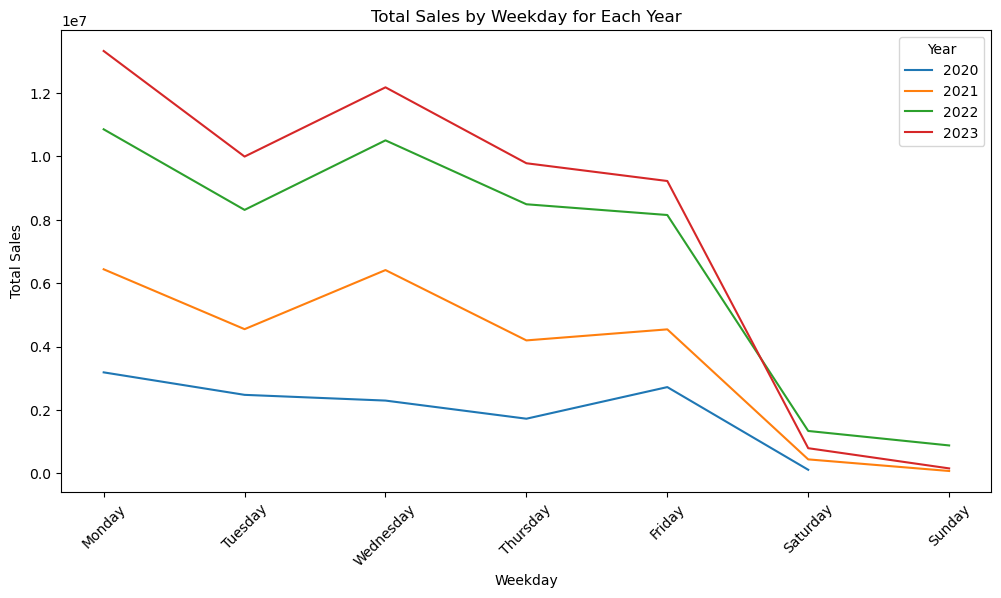

In [7]:
# Group by Year and Weekday
grouped_data = df.groupby(['Year', 'Weekday'])['TotalSales'].sum().reset_index()

# Mapping numbers to weekday names
weekday_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
               4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

grouped_data['Weekday'] = grouped_data['Weekday'].map(weekday_map)

plt.figure(figsize=(12, 6))

# Get unique years
years = grouped_data['Year'].unique()

for year in years:
    # Filter data for each year
    yearly_data = grouped_data[grouped_data['Year'] == year]

    # Plot
    sns.lineplot(x='Weekday', y='TotalSales', data=yearly_data, label=str(year))

plt.title('Total Sales by Weekday for Each Year')
plt.xlabel('Weekday')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.show()


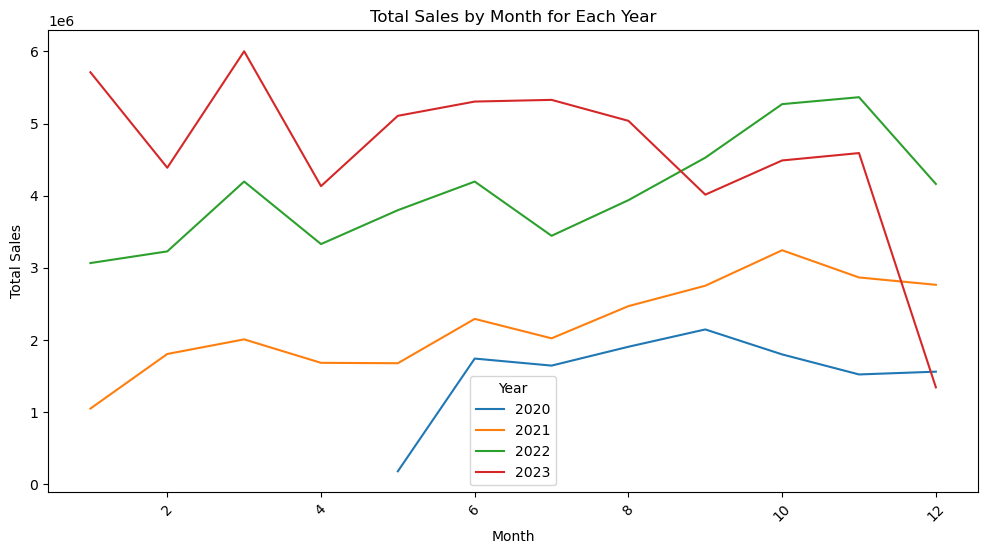

In [8]:
grouped_data = df.groupby(['Year', 'Month'])['TotalSales'].sum().reset_index()

plt.figure(figsize=(12, 6))

# Get unique years
years = grouped_data['Year'].unique()

for year in years:
    # Filter data for each year
    yearly_data = grouped_data[grouped_data['Year'] == year]

    # Plot
    sns.lineplot(x='Month', y='TotalSales', data=yearly_data, label=str(year))

plt.title('Total Sales by Month for Each Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.show()


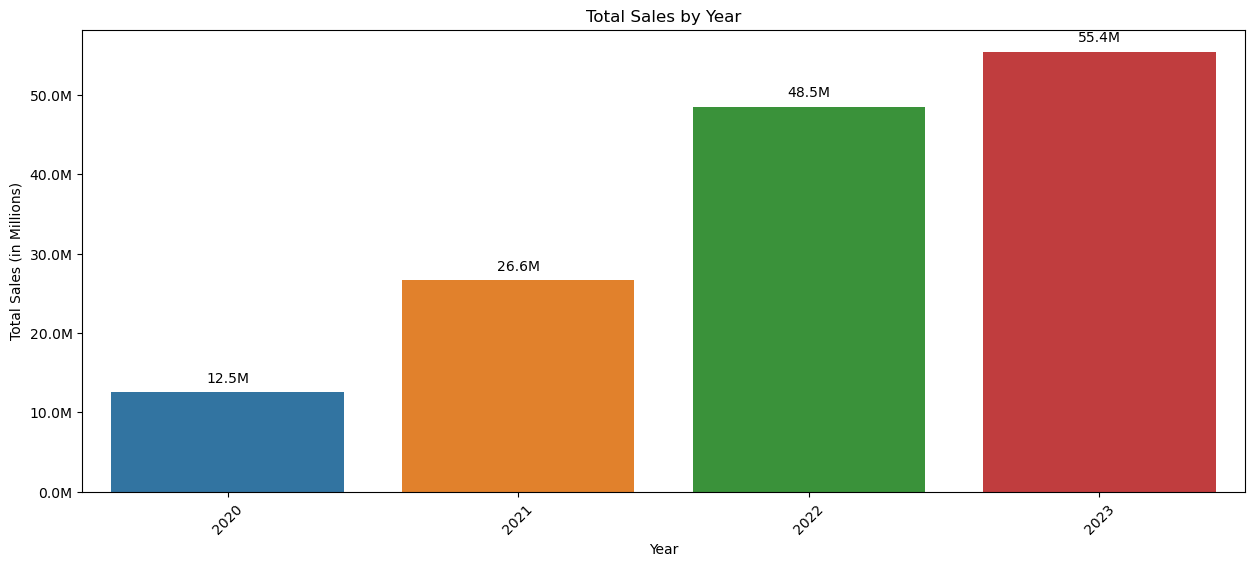

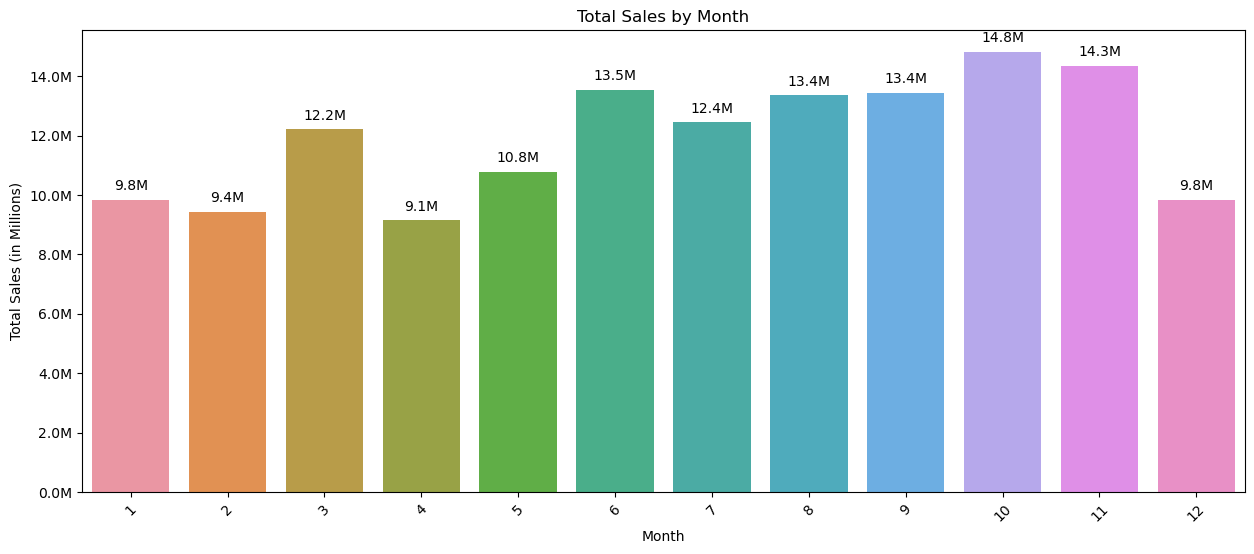

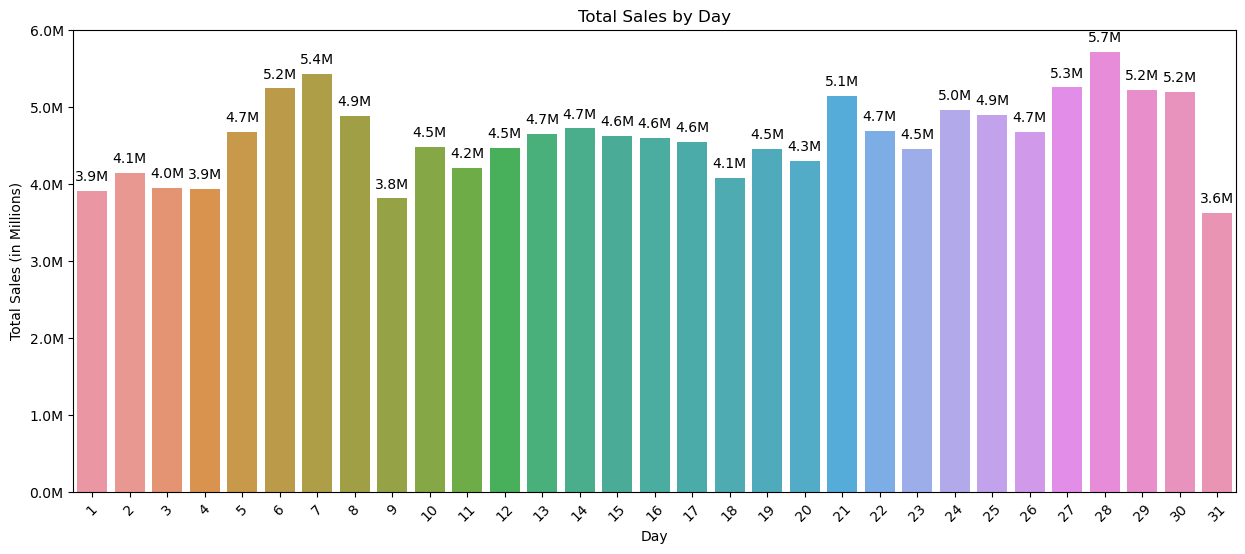

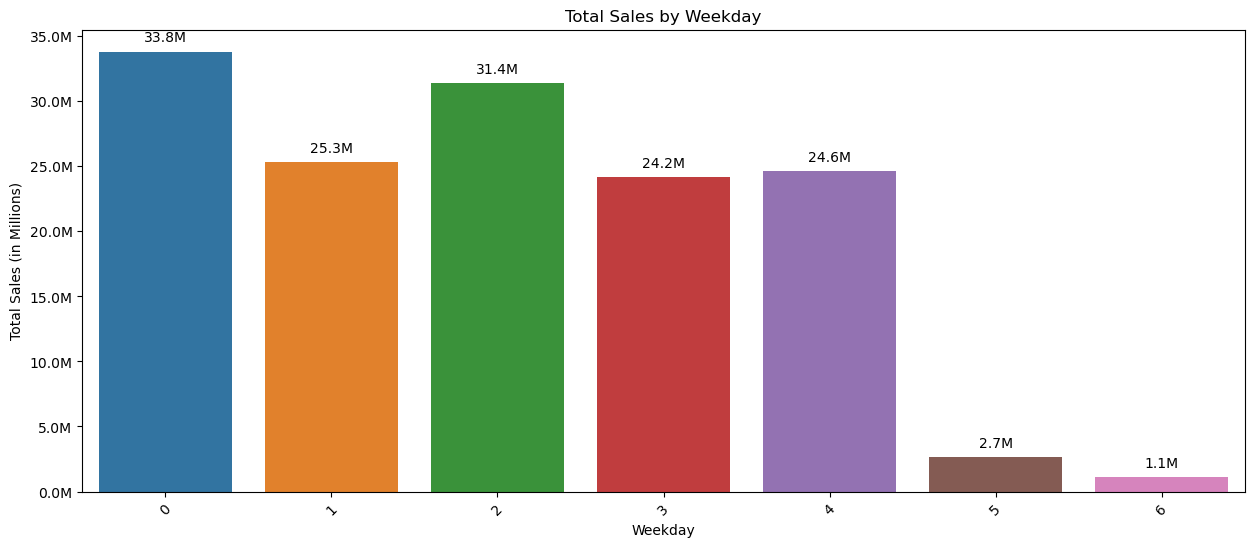

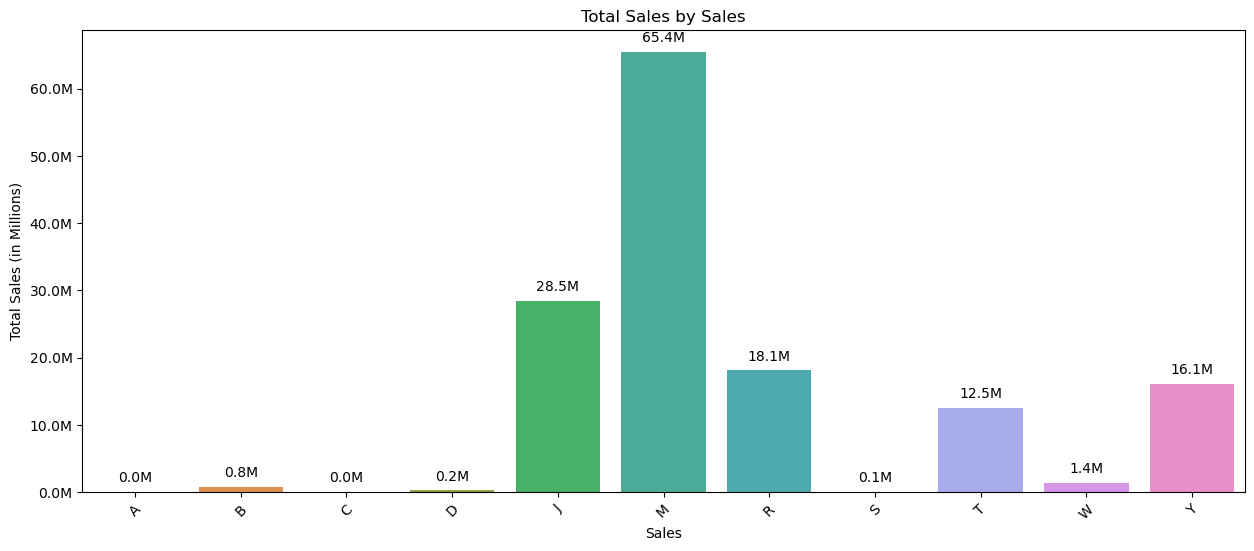

In [9]:
# List of dimensions for which you want to plot summaries
dimensions = ['Year', 'Month', 'Day', 'Weekday', 'Sales']

for dimension in dimensions:
    plt.figure(figsize=(15, 6))
    ax = sns.barplot(x=dimension, y='TotalSales', data=df, estimator=lambda x: sum(x) / 1e6, ci=None)

    # Format y-axis in millions
    ax.set_ylabel('Total Sales (in Millions)')
    ax.set_yticklabels([f'{y:.1f}M' for y in ax.get_yticks()])

    # Add labels on each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}M',  # Format the label in millions
                    (p.get_x() + p.get_width() / 2., p.get_height()),  # Position for the label
                    ha='center', va='center',  # Alignment
                    xytext=(0, 10),  # Distance from the bar
                    textcoords='offset points')

    plt.title(f'Total Sales by {dimension}')
    plt.xticks(rotation=45)  # Rotate labels for better readability if needed
    plt.xlabel(dimension)
    plt.show()

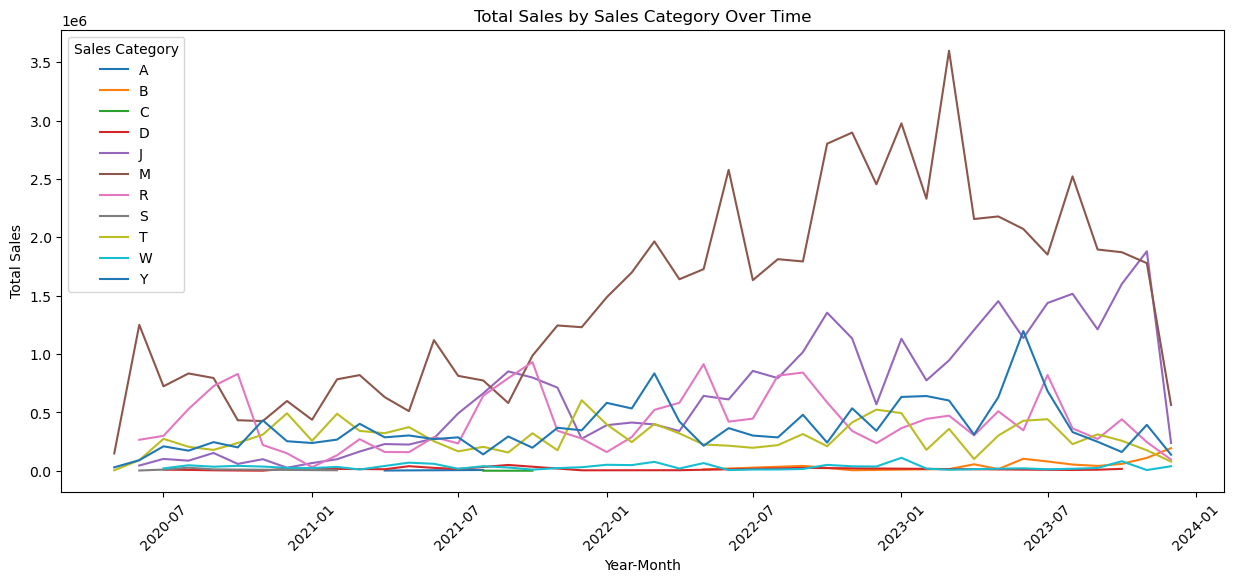

In [10]:
df['YearMonth'] = df['OutDate'].dt.to_period('M')
sales_categories = df['Sales'].unique()

# Set the size of the plots
plt.figure(figsize=(15, 6))

# Loop through each sales category and plot
for sales_category in sales_categories:
    # Filter data for the current category
    category_data = df[df['Sales'] == sales_category]

    # Group by YearMonth and sum the TotalSales
    grouped_data = category_data.groupby('YearMonth')['TotalSales'].sum().reset_index()

    # Plot
    plt.plot(grouped_data['YearMonth'].dt.to_timestamp(), grouped_data['TotalSales'], label=sales_category)

# Add plot details
plt.title('Total Sales by Sales Category Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Sales Category')
plt.show()

In [11]:
df

,OutDate,Sales,Customer,Product,ProductID,OutCountTotal,TotalSales,Year,Month,Day,Weekday,YearMonth
0,2021-04-20,A,O,T,CT013260047,5100,0.00,2021,4,20,1,2021-04
1,2021-04-27,A,T,T,CT002950025,1650,1995.02,2021,4,27,1,2021-04
2,2021-08-24,A,S,S,CT015200004,1050,6478.29,2021,8,24,1,2021-08
3,2022-05-02,B,H,3,CT013840087,112500,11644.65,2022,5,2,0,2022-05
4,2022-09-01,B,M,P,CT022460001,123200,32179.78,2022,9,1,3,2022-09
...,...,...,...,...,...,...,...,...,...,...,...,...
18974,2023-12-08,Y,D,H,CT023600006,9020,2140.45,2023,12,8,4,2023-12
18975,2023-12-08,Y,D,J,CT023600003,9120,2164.18,2023,12,8,4,2023-12
18976,2023-12-08,Y,D,L,CT023600005,7310,1734.66,2023,12,8,4,2023-12
18977,2023-12-08,Y,D,M,CT023600002,10120,2401.48,2023,12,8,4,2023-12


In [12]:
total_sales_df = df.groupby('OutDate')['TotalSales'].sum().reset_index()
total_sales_df

,OutDate,TotalSales
0,2020-05-20,17334.61
1,2020-05-22,35447.07
2,2020-05-25,18010.53
3,2020-05-26,37692.22
4,2020-05-27,22220.01
...,...,...
994,2023-12-04,270507.93
995,2023-12-05,218625.77
996,2023-12-06,178956.24
997,2023-12-07,339240.74


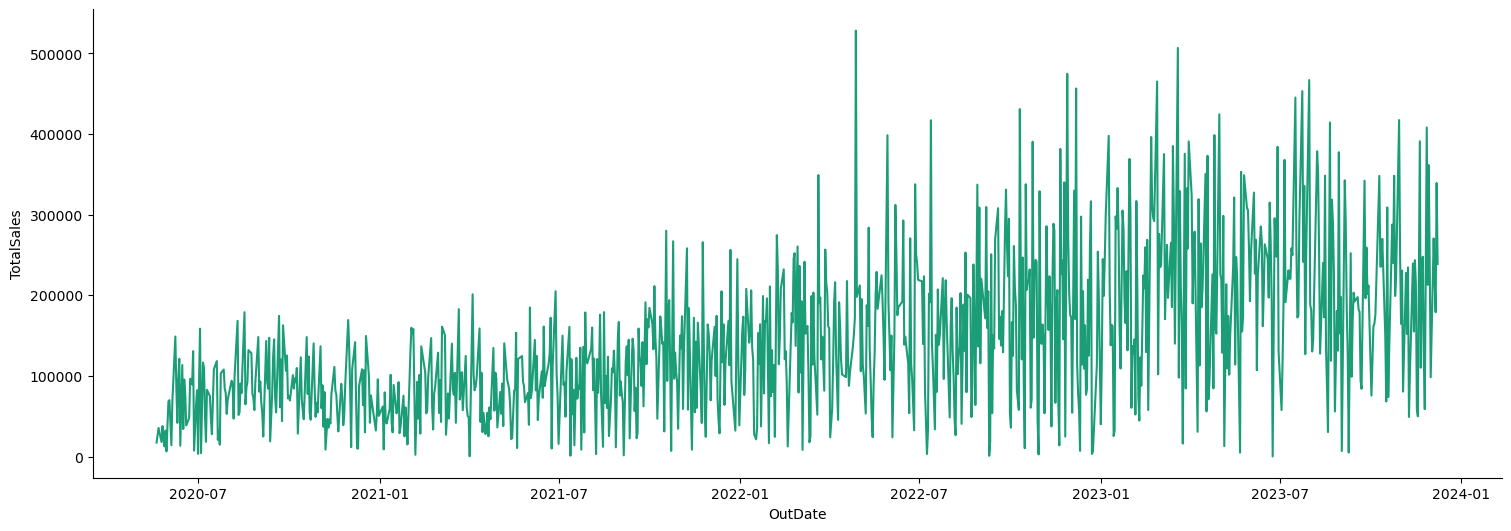

In [13]:
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['OutDate']
  ys = series['TotalSales']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(15, 5.2), layout='constrained')
df_sorted = total_sales_df.sort_values('OutDate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('OutDate')
_ = plt.ylabel('TotalSales')

In [14]:
# Aggregate data for forecast by Sales category
sales_category_df = df.groupby(['OutDate', 'Sales'])['TotalSales'].sum().reset_index()
sales_category_df

,OutDate,Sales,TotalSales
0,2020-05-20,A,0.00
1,2020-05-20,B,0.00
2,2020-05-20,C,0.00
3,2020-05-20,D,0.00
4,2020-05-20,J,0.00
...,...,...,...
10984,2023-12-08,R,12952.39
10985,2023-12-08,S,0.00
10986,2023-12-08,T,0.00
10987,2023-12-08,W,0.00


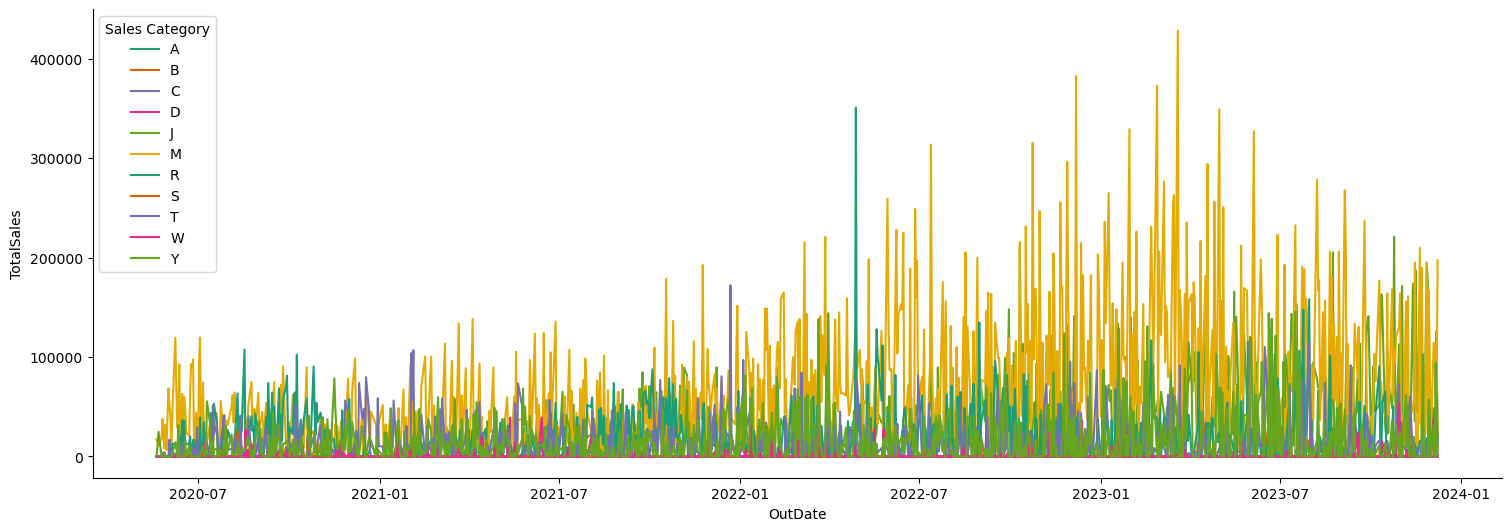

In [15]:
fig, ax = plt.subplots(figsize=(15, 5.2), layout='constrained')

# Get unique sales categories
sales_categories = sales_category_df['Sales'].unique()

# Plot each category
for index, category in enumerate(sales_categories):
    category_df = sales_category_df[sales_category_df['Sales'] == category].sort_values('OutDate', ascending=True)
    _plot_series(category_df, category, series_index=index)

# Finalize the plot
sns.despine(fig=fig, ax=ax)
plt.xlabel('OutDate')
plt.ylabel('TotalSales')
plt.legend(title='Sales Category')
plt.show()

### Feature Engineering

In [16]:
def add_time_features(df):
    df['OutDate'] = pd.to_datetime(df['OutDate'])
    df['Year'] = df['OutDate'].dt.year
    df['Month'] = df['OutDate'].dt.month
    df['Day'] = df['OutDate'].dt.day
    df['Weekday'] = df['OutDate'].dt.weekday
    return df

In [17]:
total_sales_df = add_time_features(total_sales_df)
sales_category_df = add_time_features(sales_category_df)
total_sales_df

,OutDate,TotalSales,Year,Month,Day,Weekday
0,2020-05-20,17334.61,2020,5,20,2
1,2020-05-22,35447.07,2020,5,22,4
2,2020-05-25,18010.53,2020,5,25,0
3,2020-05-26,37692.22,2020,5,26,1
4,2020-05-27,22220.01,2020,5,27,2
...,...,...,...,...,...,...
994,2023-12-04,270507.93,2023,12,4,0
995,2023-12-05,218625.77,2023,12,5,1
996,2023-12-06,178956.24,2023,12,6,2
997,2023-12-07,339240.74,2023,12,7,3


In [18]:
sales_category_df

,OutDate,Sales,TotalSales,Year,Month,Day,Weekday
0,2020-05-20,A,0.00,2020,5,20,2
1,2020-05-20,B,0.00,2020,5,20,2
2,2020-05-20,C,0.00,2020,5,20,2
3,2020-05-20,D,0.00,2020,5,20,2
4,2020-05-20,J,0.00,2020,5,20,2
...,...,...,...,...,...,...,...
10984,2023-12-08,R,12952.39,2023,12,8,4
10985,2023-12-08,S,0.00,2023,12,8,4
10986,2023-12-08,T,0.00,2023,12,8,4
10987,2023-12-08,W,0.00,2023,12,8,4


### Train-Test Split

In [19]:
# Define a split date as a Timestamp object
split_date = pd.Timestamp('2023-01-01')

# For total forecast
train_total = total_sales_df[total_sales_df['OutDate'] < split_date]
test_total = total_sales_df[total_sales_df['OutDate'] >= split_date]

# For Sales category forecast
train_sales_category = sales_category_df[sales_category_df['OutDate'] < split_date]
# train_sales_category = train_data.asfreq('D', fill_value=0)

test_sales_category = sales_category_df[sales_category_df['OutDate'] >= split_date]

train_total.shape, test_total.shape, train_sales_category.shape, test_sales_category.shape

((740, 6), (259, 6), (8140, 7), (2849, 7))

### Model Training

#### a. Total Forecast Model


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare the data
#implies'totalsales' is target variable which I want to predict
#the 'outdate' is not used as a feature in the model
X_train_total = train_total.drop(['TotalSales', 'OutDate'], axis=1)
y_train_total = train_total['TotalSales']

X_test_total = test_total.drop(['TotalSales', 'OutDate'], axis=1)
y_test_total = test_total['TotalSales']

# Train the linearR model to predict totalsales
lr_model_total = LinearRegression()
lr_model_total.fit(X_train_total, y_train_total)

LinearRegression()

In [21]:
import statsmodels.api as sm

# Ensure 'OutDate' is the index and the data is sorted
train_total = train_total.set_index('OutDate').sort_index()
test_total = test_total.set_index('OutDate').sort_index()

# Set the frequency of the datetime index
train_total.index = pd.DatetimeIndex(train_total.index).to_period('D')
test_total.index = pd.DatetimeIndex(test_total.index).to_period('D')

# Define and fit the SARIMA model - example parameters, adjust based on your data
sarima_model_total = sm.tsa.statespace.SARIMAX(train_total['TotalSales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results_sarima_total = sarima_model_total.fit()


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26068D+01    |proj g|=  7.24852D-02

At iterate    5    f=  1.25387D+01    |proj g|=  8.09068D-03

At iterate   10    f=  1.25337D+01    |proj g|=  1.18252D-03

At iterate   15    f=  1.25331D+01    |proj g|=  1.42651D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     19      1     0     0   1.606D-05   1.253D+01
  F =   12.533114421892439     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


#### b. Sales Category Forecast Model


In [22]:
lr_models_by_sales = {}

for sales_category in train_sales_category['Sales'].unique():
    train_data = train_sales_category[train_sales_category['Sales'] == sales_category]
    X_train = train_data.drop(['TotalSales', 'OutDate', 'Sales'], axis=1)
    y_train = train_data['TotalSales']

    model = LinearRegression()
    model.fit(X_train, y_train)
    lr_models_by_sales[sales_category] = model


In [23]:
sarima_models_by_sales = {}

for sales_category in train_sales_category['Sales'].unique():
    train_data = train_sales_category[train_sales_category['Sales'] == sales_category]
    train_data.index = pd.DatetimeIndex(train_data.index).to_period('M')

    model = sm.tsa.statespace.SARIMAX(train_data['TotalSales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    results = model.fit()
    sarima_models_by_sales[sales_category] = results

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.08142D+00    |proj g|=  7.21191D-02


 This problem is unconstrained.



At iterate    5    f=  7.01588D+00    |proj g|=  1.61027D-02

At iterate   10    f=  7.00925D+00    |proj g|=  5.31150D-03

At iterate   15    f=  6.93198D+00    |proj g|=  1.66862D-01

At iterate   20    f=  6.85669D+00    |proj g|=  3.15266D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     28      1     0     0   6.375D-06   6.857D+00
  F =   6.8566858058545890     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.89835D+00    |proj g|=  8.60105D-02

At iterate    5    f=  8.82045D+00    |proj g|=  1.37912D-02

At iterate   10    f=  8.81278D+00    |proj g|=  2.27546D-03

At iterate   15    f=  8.81057D+00    |proj g|=  2.35996D-03

At iterate   20    f=  8.81051D+00    |proj g|=  3.82112D-04

At iterate   25    f=  8.80806D+00    |proj g|=  3.94806D-02

At iterate   30    f=  8.71401D+00    |proj g|=  9.58555D-02

At iterate   35    f=  8.66241D+00    |proj g|=  3.28597D-03

At iterate   40    f=  8.66197D+00    |proj g|=  3.74961D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate   10    f=  3.92819D+00    |proj g|=  1.30655D-03

At iterate   15    f=  3.92818D+00    |proj g|=  1.78967D-03

At iterate   20    f=  3.92815D+00    |proj g|=  2.80676D-05

At iterate   25    f=  3.92815D+00    |proj g|=  5.95100D-05

At iterate   30    f=  3.92812D+00    |proj g|=  1.58348D-03

At iterate   35    f=  3.92809D+00    |proj g|=  6.48287D-04

At iterate   40    f=  3.92808D+00    |proj g|=  9.18529D-05

At iterate   45    f=  3.92808D+00    |proj g|=  4.13372D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     51      1     0     0   4.134D-06   3.928D+00
  F =   3.92808254501

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.27998D+00    |proj g|=  7.41593D-02

At iterate    5    f=  9.22111D+00    |proj g|=  1.86523D-02

At iterate   10    f=  9.21702D+00    |proj g|=  2.31636D-03

At iterate   15    f=  9.21512D+00    |proj g|=  1.23303D-03

At iterate   20    f=  9.21509D+00    |proj g|=  7.94961D-04

At iterate   25    f=  9.21400D+00    |proj g|=  2.12354D-02

At iterate   30    f=  9.13319D+00    |proj g|=  2.24146D-01

At iterate   35    f=  9.06910D+00    |proj g|=  1.91702D-03

At iterate   40    f=  9.06788D+00    |proj g|=  8.10386D-04

At iterate   45    f=  9.06768D+00    |proj g|=  1.88120D-03

At iterate   50    f=  9.06712D+00    |proj g|=  8.57803D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14706D+01    |proj g|=  1.07081D-01

At iterate    5    f=  1.13849D+01    |proj g|=  1.03534D-02

At iterate   10    f=  1.13808D+01    |proj g|=  3.51594D-05

At iterate   15    f=  1.13808D+01    |proj g|=  1.64549D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     18      1     0     0   1.645D-05   1.138D+01
  F =   11.380845859823323     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22466D+01    |proj g|=  7.84136D-02

At iterate    5    f=  1.21688D+01    |proj g|=  3.04662D-03

At iterate   10    f=  1.21678D+01    |proj g|=  1.17008D-03

At iterate   15    f=  1.21676D+01    |proj g|=  2.20682D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     17      1     0     0   1.081D-05   1.217D+01
  F =   12.167602327882934     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15194D+01    |proj g|=  7.65678D-02

At iterate    5    f=  1.14504D+01    |proj g|=  8.42351D-03

At iterate   10    f=  1.14455D+01    |proj g|=  4.43587D-04

At iterate   15    f=  1.14455D+01    |proj g|=  1.48542D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     17      1     0     0   1.485D-05   1.145D+01
  F =   11.445506617512256     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.45403D+00    |proj g|=  9.96914D-02

At iterate    5    f=  8.40827D+00    |proj g|=  1.05252D-02

At iterate   10    f=  8.40385D+00    |proj g|=  4.11902D-04

At iterate   15    f=  8.40346D+00    |proj g|=  3.67017D-04

At iterate   20    f=  8.40339D+00    |proj g|=  2.30165D-03

At iterate   25    f=  8.38667D+00    |proj g|=  8.40689D-02

At iterate   30    f=  8.24404D+00    |proj g|=  1.00614D-02

At iterate   35    f=  8.24193D+00    |proj g|=  1.70717D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f=  1.11952D+01    |proj g|=  1.18646D-02

At iterate   10    f=  1.11920D+01    |proj g|=  1.91191D-03

At iterate   15    f=  1.11914D+01    |proj g|=  7.99986D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     19      1     0     0   1.901D-05   1.119D+01
  F =   11.191393029279734     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.94331D+00    |proj g|=  6.92748D-02

At iterate    5    f=  9.87540D+00    |proj g|=  1.36996D-02

At iterate   10    f=  9.86992D+00    |proj g|=  5.46091D-03

At iterate   15    f=  9.86947D+00    |proj g|=  1.43339D-04

At iterate   20    f=  9.86947D+00    |proj g|=  1.51342D-04

At iterate   25    f=  9.86432D+00    |proj g|=  3.96853D-02

At iterate   30    f=  9.71529D+00    |proj g|=  1.66795D-02

At iterate   35    f=  9.71385D+00    |proj g|=  1.49777D-03

At iterate   40    f=  9.71362D+00    |proj g|=  2.93356D-03

At iterate   45    f=  9.71359D+00    |proj g|=  2.06109D-04

At iterate   50    f=  9.71359D+00    |proj g|=  2.41681D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13118D+01    |proj g|=  6.45833D-02

At iterate    5    f=  1.12346D+01    |proj g|=  8.56969D-03

At iterate   10    f=  1.12318D+01    |proj g|=  1.10097D-03

At iterate   15    f=  1.12315D+01    |proj g|=  1.03670D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     19      1     0     0   2.525D-05   1.123D+01
  F =   11.231466075366699     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


### Model Evaluation


#### a. Total Forecast Model Evaluation


In [24]:
# LinearR model
from math import sqrt

y_pred_lr_total = lr_model_total.predict(X_test_total)

mse_lr_total = mean_squared_error(y_test_total, y_pred_lr_total)
print(f'Linear Regression Total Forecast MSE: {mse_lr_total}')
rmse_lr_total = sqrt(mse_lr_total)
print(f'Linear Regression Total Forecast RMSE: {rmse_lr_total}')


Linear Regression Total Forecast MSE: 8907815218.291986
Linear Regression Total Forecast RMSE: 94381.22280566186


In [25]:
# SARIMA model
forecast_results_sarima = results_sarima_total.get_forecast(steps=len(test_total))
y_pred_sarima_total = forecast_results_sarima.predicted_mean

mse_sarima_total = mean_squared_error(test_total['TotalSales'], y_pred_sarima_total)
print(f'SARIMA Total Forecast MSE: {mse_sarima_total}')
rmse_sarima_total = sqrt(mse_sarima_total)
print(f'SARIMA Total Forecast RMSE: {rmse_sarima_total}')


SARIMA Total Forecast MSE: 11625606506.95093
SARIMA Total Forecast RMSE: 107822.10583619172


In [26]:
import itertools
import statsmodels.api as sm

# tune hyperparameters for sarima model(first round)
p = d = q = range(0, 2) 
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq] 

best_aic = float("inf")
best_params = best_seasonal_params = None

for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(train_total['TotalSales'],
                                              order=param,
                                              seasonal_order=seasonal_param,
                                              enforce_stationarity=False,
                                              enforce_invertibility=False)
            results = model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_params, best_seasonal_params = param, seasonal_param
        except:
            continue

print(f"Best SARIMA Model: {best_params}x{best_seasonal_params} with AIC: {best_aic}")


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32679D+01    |proj g|=  9.23707D-09

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   9.237D-09   1.327D+01
  F =   13.267898504981186     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.3

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22287D+01    |proj g|=  1.40477D-01

At iterate    5    f=  1.22231D+01    |proj g|=  2.55303D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6     10      1     0     0   1.892D-06   1.222D+01
  F =   12.223062202762032     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26483D+01    |proj g|=  1.14740D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     12      1     0     0   1.142D-05   1.265D+01
  F =   12.648269857937299     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.2

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22429D+01    |proj g|=  1.74319D-01

At iterate    5    f=  1.22209D+01    |proj g|=  2.71343D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     13      1     0     0   1.794D-06   1.222D+01
  F =   12.220916074287180     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.28098D+01    |proj g|=  1.11793D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   2.987D-06   1.281D+01
  F =   12.809828112015625     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26677D+01    |proj g|=  5.25076D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27986D+01    |proj g|=  1.68182D-01

At iterate    5    f=  1.27777D+01    |proj g|=  1.72743D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   3.956D-06   1.278D+01
  F =   12.777682308564476     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      6      1     0     0   2.481D-06   1.237D+01
  F =   12.372296018284613     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22741D+01    |proj g|=  1.15294D-01

At iterate    5    f=  1.22570D+01    |proj g|=  7.74383D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     14      1     0     0   4.123D-06   1.226D+01
  F =   12.256889467918478     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.25363D+01    |proj g|=  2.24782D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     20      1     0     0   3.151D-06   1.254D+01
  F =   12.536333513914631     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26927D+01    |proj g|=  4.80345D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26811D+01    |proj g|=  6.58158D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   6.582D-06   1.268D+01
  F =   12.681100166749884     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26035D+01    |proj g|=  1.53310D-01

At iterate    5    f=  1.25037D+01    |proj g|=  9.58133D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     13      1     0     0   2.204D-05   1.250D+01
  F =   12.503691819175126     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.25381D+01    |proj g|=  2.23192D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6     10      1     0     0   2.838D-06   1.254D+01
  F =   12.538104548818076     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23935D+01    |proj g|=  2.81205D-01

At iterate    5    f=  1.23372D+01    |proj g|=  1.17546D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     56      2     0     0   4.710D-05   1.234D+01
  F =   12.337235427937095     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27282D+01    |proj g|=  2.79008D-01
  ys=-5.482E-03  -gs= 5.947E-02 BFGS update SKIPPED

At iterate    5    f=  1.26681D+01    |proj g|=  1.21491D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7     30      2     1     0   5.407D-04   1.267D+01
  F =   12.668111591670494     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23237D+01    |proj g|=  1.53072D-01

At iterate    5    f=  1.22780D+01    |proj g|=  1.59402D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24278D+01    |proj g|=  2.79268D-01

At iterate    5    f=  1.23725D+01    |proj g|=  1.73985D-02

At iterate   10    f=  1.23723D+01    |proj g|=  2.46310D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     17      1     0     0   2.463D-06   1.237D+01
  F =   12.372275422426824     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  1.23982D+01    |proj g|=  2.03057D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     16      1     0     0   1.171D-04   1.240D+01
  F =   12.398184293826020     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23688D+01    |proj g|=  1.80216D-01


 This problem is unconstrained.



At iterate    5    f=  1.23009D+01    |proj g|=  2.76296D-01

At iterate   10    f=  1.22779D+01    |proj g|=  3.00264D-03

At iterate   15    f=  1.22779D+01    |proj g|=  9.65546D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     33      1     0     0   8.693D-06   1.228D+01
  F =   12.277870154166846     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28339D+01    |proj g|=  1.18789D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     11      1     0     0   1.186D-05   1.283D+01
  F =   12.833855440643637     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.2

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22805D+01    |proj g|=  8.94035D-02

At iterate    5    f=  1.22747D+01    |proj g|=  8.38476D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      9      1     0     0   8.385D-06   1.227D+01
  F =   12.274700189283035     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28823D+01    |proj g|=  7.07658D-01

At iterate    5    f=  1.26324D+01    |proj g|=  7.87733D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     19      1     0     0   2.836D-06   1.263D+01
  F =   12.629222839344024     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22907D+01    |proj g|=  1.15097D-01


 This problem is unconstrained.



At iterate    5    f=  1.22739D+01    |proj g|=  7.38007D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     14      1     0     0   4.128D-06   1.227D+01
  F =   12.273823066017556     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26258D+01    |proj g|=  2.62285D-01

At iterate    5    f=  1.25608D+01    |proj g|=  2.72139D+00

At iterate   10    f=  1.25593D+01    |proj g|=  8.95304D-03

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.23585D+01    |proj g|=  4.32778D-01

At iterate   10    f=  1.23584D+01    |proj g|=  2.74200D-02

At iterate   15    f=  1.23584D+01    |proj g|=  7.27145D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     31      1     0     0   3.178D-06   1.236D+01
  F =   12.358405131387366     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26814D+01    |proj g|=  5.94018D+00


 This problem is unconstrained.



At iterate    5    f=  1.26599D+01    |proj g|=  1.68356D-02

At iterate   10    f=  1.26598D+01    |proj g|=  5.62224D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     17      1     0     0   2.599D-05   1.266D+01
  F =   12.659791572952377     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25947D+01    |proj g|=  5.75121D+01


 This problem is unconstrained.



At iterate    5    f=  1.22522D+01    |proj g|=  4.44622D-02

At iterate   10    f=  1.22483D+01    |proj g|=  1.64827D-01

At iterate   15    f=  1.22273D+01    |proj g|=  9.25570D-02

At iterate   20    f=  1.22266D+01    |proj g|=  6.29849D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     38      1     0     0   5.373D-04   1.223D+01
  F =   12.226637855757861     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  1.23766D+01    |proj g|=  5.03477D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     28      1     0     0   3.962D-03   1.238D+01
  F =   12.376604344807316     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24293D+01    |proj g|=  3.89537D-01


 This problem is unconstrained.



At iterate    5    f=  1.23755D+01    |proj g|=  1.78838D-01

At iterate   10    f=  1.23612D+01    |proj g|=  7.43199D-01

At iterate   15    f=  1.23582D+01    |proj g|=  7.14692D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     38      1     0     0   7.811D-04   1.236D+01
  F =   12.358226838393215     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24174D+01    |proj g|=  1.40053D+01

At iterate    5    f=  1.23536D+01    |proj g|=  8.92632D-03

At iterate   10    f=  1.23535D+01    |proj g|=  4.61435D-03

At iterate   15    f=  1.23534D+01    |proj g|=  7.38448D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     24      1     0     0   2.302D-05   1.235D+01
  F =   12.353359848254691     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24795D+01    |proj g|=  3.77114D+01

At iterate    5    f=  1.22557D+01    |proj g|=  7.50796D-02

At iterate   10    f=  1.22467D+01    |proj g|=  1.67769D-01

At iterate   15    f=  1.22284D+01    |proj g|=  4.20186D-01

At iterate   20    f=  1.22272D+01    |proj g|=  2.53120D-02

At iterate   25    f=  1.22265D+01    |proj g|=  5.78110D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     47      1     0     0   4.097D-05   1.223D+01
  F =   12.226508007345

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27281D+01    |proj g|=  6.75477D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   6.755D-06   1.273D+01
  F =   12.728104348849254     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.2


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     40      1     0     0   5.407D-05   1.243D+01
  F =   12.427878439770756     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25252D+01    |proj g|=  7.98407D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25263D+01    |proj g|=  4.38985D-02

At iterate    5    f=  1.25252D+01    |proj g|=  5.79934D-03

At iterate   10    f=  1.25249D+01    |proj g|=  4.08192D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     16      1     0     0   4.079D-06   1.252D+01
  F =   12.524868348227050     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2      4      1     0     0   2.416D-06   1.255D+01
  F =   12.548664738720893     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25077D+01    |proj g|=  1.05019D-01

At iterate    5    f=  1.24270D+01    |proj g|=  2.97639D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     26      1     0     0   1.216D-05   1.243D+01
  F =   12.427010416217948     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26004D+01    |proj g|=  2.67989D-01

At iterate    5    f=  1.25383D+01    |proj g|=  3.37554D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     20      1     0     0   2.668D-06   1.254D+01
  F =   12.537837084470659     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  1.26667D+01    |proj g|=  1.66437D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     17      1     0     0   2.103D-04   1.267D+01
  F =   12.666686878941759     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23228D+01    |proj g|=  1.54196D-01


 This problem is unconstrained.



At iterate    5    f=  1.22779D+01    |proj g|=  7.32947D-03

At iterate   10    f=  1.22778D+01    |proj g|=  2.77549D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     28      1     0     0   2.775D-05   1.228D+01
  F =   12.277777329334429     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24169D+01    |proj g|=  2.66558D-01

At iterate    5    f=  1.23538D+01    |proj g|=  3.23107D-03

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.23370D+01    |proj g|=  5.25414D-03

At iterate   10    f=  1.23370D+01    |proj g|=  5.21647D-03

At iterate   15    f=  1.23366D+01    |proj g|=  9.14783D-02

At iterate   20    f=  1.23352D+01    |proj g|=  5.08739D-03

At iterate   25    f=  1.23352D+01    |proj g|=  1.90095D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     39      1     0     0   1.901D-05   1.234D+01
  F =   12.335221458857198     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.



At iterate    5    f=  1.23812D+01    |proj g|=  2.27721D-02

At iterate   10    f=  1.23811D+01    |proj g|=  5.54058D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     21      1     0     0   1.267D-05   1.238D+01
  F =   12.381139894143814     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23676D+01    |proj g|=  1.81616D-01

At iterate    5    f=  1.23068D+01    |proj g|=  2.35255D-01

At iterate   10    f=  1.22793D+01    |proj g|=  2.73731D-02

At iterate   15    f=  1.22777D+01    |proj g|=  4.28884D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     31      1     0     0   2.938D-05   1.228D+01
  F =   12.277685028666447     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Best SAR

In [27]:
# Fit with my optimal parameters
optimal_model = sm.tsa.statespace.SARIMAX(train_total['TotalSales'],
                                          order=(0, 0, 0),
                                          seasonal_order=(1, 1, 1, 12),
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)
results_optimal = optimal_model.fit()

forecast_results_optimal = results_optimal.get_forecast(steps=len(test_total))
y_pred_optimal = forecast_results_optimal.predicted_mean

mse_optimal = mean_squared_error(test_total['TotalSales'], y_pred_optimal)
rmse_optimal = sqrt(mse_optimal)
print(f'Optimal SARIMA Model MSE: {mse_optimal}')
print(f'Optimal SARIMA Model RMSE: {rmse_optimal}')

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22429D+01    |proj g|=  1.74319D-01

At iterate    5    f=  1.22209D+01    |proj g|=  2.71343D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     13      1     0     0   1.794D-06   1.222D+01
  F =   12.220916074287180     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Optimal SARIMA Model MSE: 13588853635.63186
Optimal SARIMA Model RMSE: 116571.23845799983


In [ ]:
#finds: based on the AIC, it a little bit worse than the original sarima model
#next step: adjust the range(to expand it); cross validation

In [ ]:
# tune hyperparameters for sarima model(second round)

p = d = q = range(0, 3) 
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]  

best_aic = float("inf")
best_params = best_seasonal_params = None

for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(train_total['TotalSales'],
                                              order=param,
                                              seasonal_order=seasonal_param,
                                              enforce_stationarity=False,
                                              enforce_invertibility=False)
            results = model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_params, best_seasonal_params = param, seasonal_param
        except:
            continue

print(f"Best SARIMA Model: {best_params}x{best_seasonal_params} with AIC: {best_aic}")


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32679D+01    |proj g|=  9.23707D-09

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   9.237D-09   1.327D+01
  F =   13.267898504981186     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.3

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26875D+01    |proj g|=  1.76570D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.766D-07   1.269D+01
  F =   12.687453031357006     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.2

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20174D+01    |proj g|=  7.93134D-02

At iterate    5    f=  1.20159D+01    |proj g|=  1.22597D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     11      1     0     0   1.864D-06   1.202D+01
  F =   12.015877195901712     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30065D+01    |proj g|=  2.01084D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   2.011D-07   1.301D+01
  F =   13.006465393358541     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.2

 This problem is unconstrained.



At iterate    5    f=  1.23077D+01    |proj g|=  2.61692D-01

At iterate   10    f=  1.23049D+01    |proj g|=  8.90754D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     10     24      1     0     0   8.908D-06   1.230D+01
  F =   12.304896089103847     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19947D+01    |proj g|=  3.01875D-01

At iterate    5    f=  1.19649D+01    |proj g|=  1.29997D-01

At iterate   10    f=  1.19362D+01    |proj g|=  3.33820D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     61      2     0     0   1.172D-04   1.194D+01
  F =   11.936142347671417     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26483D+01    |proj g|=  1.14740D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     12      1     0     0   1.142D-05   1.265D+01
  F =   12.648269857937299     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.2

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25383D+01    |proj g|=  1.39093D+01

At iterate    5    f=  1.22078D+01    |proj g|=  1.95312D-01

At iterate   10    f=  1.22072D+01    |proj g|=  2.03879D-02

At iterate   15    f=  1.22071D+01    |proj g|=  1.17824D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     18      1     0     0   1.178D-05   1.221D+01
  F =   12.207099354375497     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23540D+01    |proj g|=  6.26663D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   6.267D-06   1.235D+01
  F =   12.354001691361761     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.2

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20137D+01    |proj g|=  4.52868D-02

At iterate    5    f=  1.20132D+01    |proj g|=  4.37272D-03

At iterate   10    f=  1.20125D+01    |proj g|=  3.96512D-02

At iterate   15    f=  1.20100D+01    |proj g|=  2.59766D-02

At iterate   20    f=  1.20098D+01    |proj g|=  8.56083D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     49      1     0     0   5.828D-05   1.201D+01
  F =   12.009751951203194     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25162D+01    |proj g|=  8.52172D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   8.522D-06   1.252D+01
  F =   12.516209328323511     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22457D+01    |proj g|=  3.28371D-01

At iterate    5    f=  1.21800D+01    |proj g|=  2.74686D-02

At iterate   10    f=  1.21795D+01    |proj g|=  3.33369D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     30      1     0     0   3.334D-06   1.218D+01
  F =   12.179526180697591     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  1.19813D+01    |proj g|=  2.53991D-01

At iterate   10    f=  1.18859D+01    |proj g|=  4.27443D-01

At iterate   15    f=  1.18808D+01    |proj g|=  2.49301D-02

At iterate   20    f=  1.18806D+01    |proj g|=  1.38553D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     51      1     0     0   3.853D-05   1.188D+01
  F =   11.880529037976720     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.22236D+01    |proj g|=  8.32612D-02

At iterate   10    f=  1.22227D+01    |proj g|=  1.48526D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     19      1     0     0   4.353D-05   1.222D+01
  F =   12.222594535536007     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24667D+01    |proj g|=  1.31226D+01

At iterate    5    f=  1.22093D+01    |proj g|=  2.30741D-01

At iterate   10    f=  1.22065D+01    |proj g|=  8.28760D-03

At iterate   15    f=  1.22065D+01    |proj g|=  1.74516D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     22      1     0     0   2.335D-04   1.221D+01
  F =   12.206468342194185     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20983D+01    |proj g|=  6.88676D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   6.887D-06   1.210D+01
  F =   12.098285087082669     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20689D+01    |proj g|=  1.18318D-01

At iterate    5    f=  1.20310D+01    |proj g|=  1.13178D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     14      1     0     0   1.058D-05   1.203D+01
  F =   12.030894409996971     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20135D+01    |proj g|=  4.98833D-02

At iterate    5    f=  1.20120D+01    |proj g|=  9.52086D-04

At iterate   10    f=  1.20120D+01    |proj g|=  3.64229D-03

At iterate   15    f=  1.20116D+01    |proj g|=  7.18647D-02

At iterate   20    f=  1.20099D+01    |proj g|=  1.87494D-02

At iterate   25    f=  1.20094D+01    |proj g|=  1.18688D-02

At iterate   30    f=  1.20073D+01    |proj g|=  8.90487D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21802D+01    |proj g|=  1.10099D-05



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     14      1     0     0   1.098D-05   1.218D+01
  F =   12.180240860732630     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20785D+01    |proj g|=  2.74023D-01

At iterate    5    f=  1.19545D+01    |proj g|=  6.25640D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     30      1     0     0   3.625D-06   1.195D+01
  F =   11.954467149525875     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  1.19316D+01    |proj g|=  1.03237D-01

At iterate   10    f=  1.19235D+01    |proj g|=  4.62257D-02

At iterate   15    f=  1.19105D+01    |proj g|=  3.97149D-01

At iterate   20    f=  1.18642D+01    |proj g|=  1.27772D-01

At iterate   25    f=  1.18598D+01    |proj g|=  6.90708D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     44      1     0     0   1.044D-04   1.186D+01
  F =   11.859808421403775     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.25656D+01    |proj g|=  2.15011D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     10      1     0     0   3.401D-06   1.257D+01
  F =   12.565594669853400     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26677D+01    |proj g|=  5.25076D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.22578D+01    |proj g|=  9.00329D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      9      1     0     0   9.003D-06   1.226D+01
  F =   12.257814581900739     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20547D+01    |proj g|=  7.19130D-02

At iterate    5    f=  1.20507D+01    |proj g|=  7.87162D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     12      1     0     0   1.197D-05   1.205D+01
  F =   12.050577220698845     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29839D+01    |proj g|=  2.11362D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1      4      1     0     0   9.868D-07   1.298D+01
  F =   12.983890071006524     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.3

 This problem is unconstrained.



At iterate    5    f=  1.24539D+01    |proj g|=  1.10386D-01

At iterate   10    f=  1.24532D+01    |proj g|=  4.57692D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     27      1     0     0   9.760D-05   1.245D+01
  F =   12.453149815875189     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22017D+01    |proj g|=  1.38124D-01


 This problem is unconstrained.



At iterate    5    f=  1.21812D+01    |proj g|=  1.40109D-01

At iterate   10    f=  1.21750D+01    |proj g|=  2.74642D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     27      1     0     0   4.930D-04   1.218D+01
  F =   12.175042710443643     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27986D+01    |proj g|=  1.68182D-01

At iterate    5    f=  1.27777D+01    |proj g|=  1.72743D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   3.956D-06   1.278D+01
  F =   12.777682308564476     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.


At iterate    5    f=  1.24622D+01    |proj g|=  2.86311D-01

At iterate   10    f=  1.24568D+01    |proj g|=  2.77423D-02

At iterate   15    f=  1.24564D+01    |proj g|=  5.00222D-03

At iterate   20    f=  1.24564D+01    |proj g|=  2.29726D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     28      1     0     0   3.901D-05   1.246D+01
  F =   12.456347649099152     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23730D+01    |proj g|=  3.07494D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      6      1     0     0   2.481D-06   1.237D+01
  F =   12.372296018284613     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22741D+01    |proj g|=  1.15294D-01

At iterate    5    f=  1.22570D+01    |proj g|=  7.74383D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     14      1     0     0   4.123D-06   1.226D+01
  F =   12.256889467918478     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  1.20513D+01    |proj g|=  5.47486D-04

At iterate   10    f=  1.20511D+01    |proj g|=  1.67823D-02

At iterate   15    f=  1.20498D+01    |proj g|=  2.72119D-02

At iterate   20    f=  1.20490D+01    |proj g|=  1.57341D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     35      1     0     0   2.935D-04   1.205D+01
  F =   12.049009071021484     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      6      1     0     0   2.560D-06   1.259D+01
  F =   12.586517966566159     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24402D+01    |proj g|=  1.33829D-01


 This problem is unconstrained.



At iterate    5    f=  1.24134D+01    |proj g|=  2.69903D-02

At iterate   10    f=  1.24128D+01    |proj g|=  2.43293D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     37      1     0     0   1.308D-05   1.241D+01
  F =   12.412832430646061     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28051D+01    |proj g|=  3.91871D+00


 This problem is unconstrained.



At iterate    5    f=  1.22099D+01    |proj g|=  5.07757D-02

At iterate   10    f=  1.21866D+01    |proj g|=  1.78502D-01

At iterate   15    f=  1.21757D+01    |proj g|=  9.20305D-02

At iterate   20    f=  1.21749D+01    |proj g|=  5.93819D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     41      1     0     0   1.544D-05   1.217D+01
  F =   12.174865574243794     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25463D+01    |proj g|=  1.41593D-01

At iterate    5    f=  1.25275D+01    |proj g|=  5.49011D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     10      1     0     0   4.455D-06   1.253D+01
  F =   12.527504247489073     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 v

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25100D+01    |proj g|=  2.10778D+00

At iterate    5    f=  1.24652D+01    |proj g|=  1.31227D-01

At iterate   10    f=  1.24565D+01    |proj g|=  2.56068D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     14     18      1     0     0   2.572D-04   1.246D+01
  F =   12.456460216542247     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21327D+01    |proj g|=  5.39852D-02

At iterate    5    f=  1.21303D+01    |proj g|=  6.14122D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5      8      1     0     0   6.141D-06   1.213D+01
  F =   12.130322670112788     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21125D+01    |proj g|=  7.57564D-02

At iterate    5    f=  1.20848D+01    |proj g|=  1.96034D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      9     17      1     0     0   8.300D-06   1.208D+01
  F =   12.084721548334263     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20543D+01    |proj g|=  5.45240D-02

At iterate    5    f=  1.20506D+01    |proj g|=  1.70604D-03

At iterate   10    f=  1.20505D+01    |proj g|=  8.88190D-04

At iterate   15    f=  1.20501D+01    |proj g|=  5.54127D-02

At iterate   20    f=  1.20492D+01    |proj g|=  7.34317D-02

At iterate   25    f=  1.20490D+01    |proj g|=  3.64443D-03
  ys=-6.479E-04  -gs= 4.127E-05 BFGS update SKIPPED

At iterate   30    f=  1.20480D+01    |proj g|=  2.81293D-02

At iterate   35    f=  1.20480D+01    |proj g|=  4.57031D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of 

 This problem is unconstrained.



At iterate    5    f=  1.23141D+01    |proj g|=  3.20047D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5      9      1     0     0   3.200D-06   1.231D+01
  F =   12.314064630473169     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22751D+01    |proj g|=  1.06466D-01

At iterate    5    f=  1.22253D+01    |proj g|=  4.61744D-03

At iterate   10    f=  1.22253D+01    |proj g|=  1.02600D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     29      1     0     0   1.026D-04   1.223D+01
  F =   12.225258310490895     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22186D+01    |proj g|=  1.41107D+00

At iterate    5    f=  1.21983D+01    |proj g|=  4.24278D-02

At iterate   10    f=  1.21950D+01    |proj g|=  1.96693D-02

At iterate   15    f=  1.21877D+01    |proj g|=  1.53171D-01

At iterate   20    f=  1.21782D+01    |proj g|=  6.35188D-01

At iterate   25    f=  1.21748D+01    |proj g|=  2.84201D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     48      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30427D+01    |proj g|=  2.24537D-01

At iterate    5    f=  1.29913D+01    |proj g|=  1.34594D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   3.284D-06   1.299D+01
  F =   12.991310292009247     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.


At iterate    5    f=  1.25304D+01    |proj g|=  1.27938D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7      9      1     0     0   3.713D-06   1.253D+01
  F =   12.530389904886119     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26497D+01    |proj g|=  1.08126D-02


 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2      5      1     0     0   2.283D-05   1.265D+01
  F =   12.649585798781997     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22474D+01    |proj g|=  8.01051D-02

At iterate    5    f=  1.22399D+01    |proj g|=  1.77128D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate    5    f=  1.20332D+01    |proj g|=  6.79030D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      9     12      1     0     0   4.054D-06   1.203D+01
  F =   12.033069401475485     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29654D+01    |proj g|=  1.45882D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      6      1     0     0   6.022D-08   1.297D+01
  F =   12.965269129069680     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.3

 This problem is unconstrained.



At iterate    5    f=  1.24367D+01    |proj g|=  1.14188D-01

At iterate   10    f=  1.24358D+01    |proj g|=  4.71870D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     27      1     0     0   6.537D-05   1.244D+01
  F =   12.435817644965548     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21844D+01    |proj g|=  1.37599D-01

At iterate    5    f=  1.21629D+01    |proj g|=  4.16115D-02

At iterate   10    f=  1.21584D+01    |proj g|=  1.07926D-02

At iterate   15    f=  1.21582D+01    |proj g|=  8.66367D-02

At iterate   20    f=  1.21580D+01    |proj g|=  3.91891D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     37      1     0     0   4.412D-06   1.216D+01
  F =   12.158044025913901     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27935D+01    |proj g|=  1.17309D-01

At iterate    5    f=  1.27795D+01    |proj g|=  5.26715D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     11      1     0     0   7.071D-06   1.278D+01
  F =   12.779466891397618     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 v

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24935D+01    |proj g|=  1.94794D+00

At iterate    5    f=  1.24493D+01    |proj g|=  3.94528D-02

At iterate   10    f=  1.24445D+01    |proj g|=  3.42780D-02

At iterate   15    f=  1.24432D+01    |proj g|=  3.62567D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     24      1     0     0   5.274D-04   1.244D+01
  F =   12.443163886619919     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23723D+01    |proj g|=  2.24855D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4      6      1     0     0   1.016D-05   1.237D+01
  F =   12.371787999033446     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22570D+01    |proj g|=  1.11868D-01

At iterate    5    f=  1.22389D+01    |proj g|=  4.86572D-03

At iterate   10    f=  1.22388D+01    |proj g|=  4.41194D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     15      1     0     0   4.412D-06   1.224D+01
  F =   12.238826976574455     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  1.20338D+01    |proj g|=  6.89202D-04

At iterate   10    f=  1.20337D+01    |proj g|=  7.62020D-03

At iterate   15    f=  1.20318D+01    |proj g|=  1.71396D-02

At iterate   20    f=  1.20316D+01    |proj g|=  6.34479D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     27      1     0     0   6.345D-06   1.203D+01
  F =   12.031559448567842     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25863D+01    |proj g|=  3.46707D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4      6      1     0     0   1.119D-05   1.259D+01
  F =   12.586248052784670     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.2

 This problem is unconstrained.



At iterate    5    f=  1.23960D+01    |proj g|=  1.70171D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      9     34      1     0     0   5.836D-06   1.240D+01
  F =   12.395788255448648     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27828D+01    |proj g|=  3.89712D+00

At iterate    5    f=  1.21928D+01    |proj g|=  5.28973D-02

At iterate   10    f=  1.21700D+01    |proj g|=  1.59851D-01

At iterate   15    f=  1.21583D+01    |proj g|=  1.00444D-01

At iterate   20    f=  1.21579D+01    |proj g|=  8.84112D-02

At iterate   25    f=  1.21579D+01    |proj g|=  9.82773D-04

At iterate   30    f=  1.21579D+01    |proj g|=  3.18424D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25432D+01    |proj g|=  6.76992D-02

At iterate    5    f=  1.25316D+01    |proj g|=  6.64767D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      8     11      1     0     0   1.071D-05   1.253D+01
  F =   12.531591701348741     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25070D+01    |proj g|=  4.56424D-01

At iterate    5    f=  1.25007D+01    |proj g|=  1.41127D-01

At iterate   10    f=  1.24961D+01    |proj g|=  5.93364D-02

At iterate   15    f=  1.24955D+01    |proj g|=  2.24515D-02

At iterate   20    f=  1.24954D+01    |proj g|=  3.84141D-03

At iterate   25    f=  1.24954D+01    |proj g|=  2.91896D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     29      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  1.24497D+01    |proj g|=  5.32363D-02

At iterate   10    f=  1.24434D+01    |proj g|=  6.22993D-03

At iterate   15    f=  1.24433D+01    |proj g|=  5.53721D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     18     21      1     0     0   9.377D-05   1.244D+01
  F =   12.443287898588896     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21324D+01    |proj g|=  4.69218D-02

At iterate    5    f=  1.21302D+01    |proj g|=  3.02876D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7      9      1     0     0   1.590D-05   1.213D+01
  F =   12.130156792052057     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  1.20841D+01    |proj g|=  8.35258D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     14      1     0     0   2.180D-05   1.208D+01
  F =   12.083968399313088     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20384D+01    |proj g|=  5.19274D-02


 This problem is unconstrained.



At iterate    5    f=  1.20330D+01    |proj g|=  3.55549D-04

At iterate   10    f=  1.20330D+01    |proj g|=  2.60498D-03

At iterate   15    f=  1.20317D+01    |proj g|=  5.19890D-01

At iterate   20    f=  1.20309D+01    |proj g|=  1.95140D-01

At iterate   25    f=  1.20307D+01    |proj g|=  4.30397D-02

At iterate   30    f=  1.20307D+01    |proj g|=  2.55026D-02

At iterate   35    f=  1.20307D+01    |proj g|=  9.48923D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     70      1     0     0   9.489D-05   1.203D+01
  F =   12.030672513698116     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23160D+01    |proj g|=  3.28764D-02

At iterate    5    f=  1.23145D+01    |proj g|=  8.90084D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     10      1     0     0   3.203D-06   1.231D+01
  F =   12.314493351596603     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22751D+01    |proj g|=  1.05905D-01

At iterate    5    f=  1.22259D+01    |proj g|=  3.61945D-03

At iterate   10    f=  1.22259D+01    |proj g|=  3.81569D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     32      1     0     0   3.816D-05   1.223D+01
  F =   12.225881561179207     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22022D+01    |proj g|=  1.45452D+00

At iterate    5    f=  1.21812D+01    |proj g|=  4.00432D-02

At iterate   10    f=  1.21781D+01    |proj g|=  2.36084D-02

At iterate   15    f=  1.21705D+01    |proj g|=  1.04295D-01

At iterate   20    f=  1.21581D+01    |proj g|=  2.47625D-02

At iterate   25    f=  1.21578D+01    |proj g|=  5.72397D-03

At iterate   30    f=  1.21578D+01    |proj g|=  2.61589D-03

At iterate   35    f=  1.21578D+01    |proj g|=  4.80721D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28797D+01    |proj g|=  2.68230D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   2.682D-08   1.288D+01
  F =   12.879660594119823     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.2

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.25363D+01    |proj g|=  2.24782D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     20      1     0     0   3.151D-06   1.254D+01
  F =   12.536333513914631     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23535D+01    |proj g|=  1.33868D-01


 This problem is unconstrained.



At iterate    5    f=  1.23329D+01    |proj g|=  1.61474D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     19      1     0     0   3.153D-06   1.233D+01
  F =   12.332858647392955     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33634D+01    |proj g|=  1.42109D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.421D-07   1.336D+01
  F =   13.363446143841896     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28930D+01    |proj g|=  1.00242D+00

At iterate    5    f=  1.27289D+01    |proj g|=  2.24591D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     15      1     0     0   8.966D-05   1.273D+01
  F =   12.728914670602414     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  1.24509D+01    |proj g|=  3.77423D-01

At iterate   10    f=  1.24273D+01    |proj g|=  4.75058D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     31      1     0     0   6.659D-05   1.243D+01
  F =   12.427273035996173     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26927D+01    |proj g|=  4.80345D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   4.803D-06   1.269D+01
  F =   12.692694213308629     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.2

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26035D+01    |proj g|=  1.53310D-01

At iterate    5    f=  1.25037D+01    |proj g|=  9.58133D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     13      1     0     0   2.204D-05   1.250D+01
  F =   12.503691819175126     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23166D+01    |proj g|=  1.10514D-01

At iterate    5    f=  1.22916D+01    |proj g|=  9.50724D-04

At iterate   10    f=  1.22916D+01    |proj g|=  5.86289D-03

At iterate   15    f=  1.22915D+01    |proj g|=  2.23785D-02

At iterate   20    f=  1.22914D+01    |proj g|=  7.98295D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     30      1     0     0   7.983D-06   1.229D+01
  F =   12.291435196595877     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26255D+01    |proj g|=  2.64481D-01

At iterate    5    f=  1.25433D+01    |proj g|=  7.89340D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     19      1     0     0   3.664D-05   1.254D+01
  F =   12.543306866194218     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24716D+01    |proj g|=  6.72314D-01

At iterate    5    f=  1.23490D+01    |proj g|=  8.47797D-02

At iterate   10    f=  1.22817D+01    |proj g|=  1.11278D-01

At iterate   15    f=  1.22635D+01    |proj g|=  4.37707D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     35      1     0     0   1.615D-03   1.226D+01
  F =   12.263438393717237     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.24877D+01    |proj g|=  6.51108D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     33      1     0     0   5.546D-07   1.249D+01
  F =   12.487645377291235     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24718D+01    |proj g|=  2.38278D-02

At iterate    5    f=  1.24713D+01    |proj g|=  8.43754D-03


 This problem is unconstrained.



At iterate   10    f=  1.24696D+01    |proj g|=  6.76502D-02

At iterate   15    f=  1.24676D+01    |proj g|=  6.59711D-02

At iterate   20    f=  1.24653D+01    |proj g|=  3.55839D-02

At iterate   25    f=  1.24652D+01    |proj g|=  1.59732D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     48      1     0     0   1.597D-05   1.247D+01
  F =   12.465155651497016     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23983D+01    |proj g|=  7.58629D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   7.586D-06   1.240D+01
  F =   12.398326918256714     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23949D+01    |proj g|=  6.63818D-02

At iterate    5    f=  1.23031D+01    |proj g|=  9.37802D-02

At iterate   10    f=  1.22964D+01    |proj g|=  8.60160D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     19      1     0     0   2.166D-05   1.230D+01
  F =   12.296409574447809     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23351D+01    |proj g|=  9.52900D-02

At iterate    5    f=  1.22816D+01    |proj g|=  5.10120D-02

At iterate   10    f=  1.22797D+01    |proj g|=  1.18481D-03

At iterate   15    f=  1.22796D+01    |proj g|=  1.40886D-02

At iterate   20    f=  1.22796D+01    |proj g|=  5.77021D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     29      1     0     0   3.923D-05   1.228D+01
  F =   12.279575617850870     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24796D+01    |proj g|=  1.21931D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     13      1     0     0   1.216D-05   1.248D+01
  F =   12.479573200250014     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24267D+01    |proj g|=  1.85514D-01

At iterate    5    f=  1.22679D+01    |proj g|=  1.36778D-01

At iterate   10    f=  1.22611D+01    |proj g|=  4.26440D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     26      1     0     0   5.330D-06   1.226D+01
  F =   12.261053988214735     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  1.22468D+01    |proj g|=  2.72769D-02

At iterate   10    f=  1.22281D+01    |proj g|=  1.10039D-01

At iterate   15    f=  1.22021D+01    |proj g|=  3.27932D-01

At iterate   20    f=  1.21908D+01    |proj g|=  2.86876D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     32      1     0     0   3.556D-05   1.219D+01
  F =   12.190753239287256     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.


At iterate    5    f=  1.23372D+01    |proj g|=  1.17546D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     56      2     0     0   4.710D-05   1.234D+01
  F =   12.337235427937095     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21941D+01    |proj g|=  2.79086D-01

At iterate    5    f=  1.21364D+01    |proj g|=  7.75679D-03

At iterate   10    f=  1.21363D+01    |proj g|=  3.01728D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     20      1     0     0   3.017D-05   1.214D+01
  F =   12.136328066188476     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27282D+01    |proj g|=  2.79008D-01
  ys=-5.482E-03  -gs= 5.947E-02 BFGS update SKIPPED

At iterate    5    f=  1.26681D+01    |proj g|=  1.21491D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7     30      2     1     0   5.407D-04   1.267D+01
  F =   12.668111591670494     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23237D+01    |proj g|=  1.53072D-01

At iterate    5    f=  1.22780D+01    |proj g|=  1.59402D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate    5    f=  1.20729D+01    |proj g|=  3.86072D-02

At iterate   10    f=  1.20723D+01    |proj g|=  1.65850D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     30      1     0     0   1.381D-05   1.207D+01
  F =   12.072279165514081     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30352D+01    |proj g|=  2.68622D-01


 This problem is unconstrained.



At iterate    5    f=  1.29825D+01    |proj g|=  9.56193D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7     19      1     0     0   3.116D-05   1.298D+01
  F =   12.982524183520036     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27063D+01    |proj g|=  1.04736D+00


 This problem is unconstrained.



At iterate    5    f=  1.25455D+01    |proj g|=  1.52432D-01

At iterate   10    f=  1.25180D+01    |proj g|=  2.33465D-02

At iterate   15    f=  1.25179D+01    |proj g|=  3.79128D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     29      1     0     0   3.791D-06   1.252D+01
  F =   12.517942724757473     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22795D+01    |proj g|=  1.28937D-01

At iterate    5    f=  1.22598D+01    |proj g|=  2.00055D-01

At iterate   10    f=  1.22497D+01    |proj g|=  1.50966D-01

At iterate   15    f=  1.22486D+01    |proj g|=  6.84689D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     33      1     0     0   4.534D-05   1.225D+01
  F =   12.248551377005709     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23936D+01    |proj g|=  2.81234D-01

At iterate    5    f=  1.23373D+01    |proj g|=  1.78723D-02

At iterate   10    f=  1.23373D+01    |proj g|=  1.93507D-03

At iterate   15    f=  1.23366D+01    |proj g|=  5.01398D-02

At iterate   20    f=  1.23355D+01    |proj g|=  2.39742D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     45      1     0     0   1.560D-05   1.234D+01
  F =   12.335516299096687     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21941D+01    |proj g|=  2.79153D-01

At iterate    5    f=  1.21364D+01    |proj g|=  6.34481D-03

At iterate   10    f=  1.21364D+01    |proj g|=  4.79677D-04

At iterate   15    f=  1.21361D+01    |proj g|=  3.90016D-02

At iterate   20    f=  1.21350D+01    |proj g|=  1.90662D-02

At iterate   25    f=  1.21349D+01    |proj g|=  3.36882D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     48      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  1.23982D+01    |proj g|=  2.03057D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     16      1     0     0   1.171D-04   1.240D+01
  F =   12.398184293826020     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23688D+01    |proj g|=  1.80216D-01

At iterate    5    f=  1.23009D+01    |proj g|=  2.76296D-01

At iterate   10    f=  1.22779D+01    |proj g|=  3.00264D-03

At iterate   15    f=  1.22779D+01    |proj g|=  9.65546D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     33      1     0     0   8.693D-06   1.228D+01
  F =   12.277870154166846     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  1.20719D+01    |proj g|=  8.82572D-03

At iterate   10    f=  1.20719D+01    |proj g|=  3.71752D-04

At iterate   15    f=  1.20719D+01    |proj g|=  9.74193D-03

At iterate   20    f=  1.20703D+01    |proj g|=  5.71433D-02

At iterate   25    f=  1.20701D+01    |proj g|=  1.81076D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     64      1     0     0   5.071D-06   1.207D+01
  F =   12.070054220476065     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26539D+01    |proj g|=  1.51302D-01

At iterate    5    f=  1.26271D+01    |proj g|=  5.22239D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     20      1     0     0   6.667D-05   1.263D+01
  F =   12.627068723108199     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25272D+01    |proj g|=  1.16951D-01

At iterate    5    f=  1.24854D+01    |proj g|=  1.19343D-02

At iterate   10    f=  1.24854D+01    |proj g|=  3.20303D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     25      1     0     0   3.011D-05   1.249D+01
  F =   12.485350226719493     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24270D+01    |proj g|=  7.87300D-01

At iterate    5    f=  1.23217D+01    |proj g|=  1.39669D-01

At iterate   10    f=  1.22825D+01    |proj g|=  4.70152D-02

At iterate   15    f=  1.22738D+01    |proj g|=  4.60011D-02

At iterate   20    f=  1.22584D+01    |proj g|=  1.46131D-01

At iterate   25    f=  1.22495D+01    |proj g|=  3.46940D-01

At iterate   30    f=  1.22484D+01    |proj g|=  5.81480D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  1.21701D+01    |proj g|=  1.64032D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     19      1     0     0   1.355D-05   1.217D+01
  F =   12.169951272481041     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22270D+01    |proj g|=  2.79269D-01


 This problem is unconstrained.



At iterate    5    f=  1.21700D+01    |proj g|=  1.43851D-02

At iterate   10    f=  1.21700D+01    |proj g|=  8.52848D-04

At iterate   15    f=  1.21695D+01    |proj g|=  4.53840D-02

At iterate   20    f=  1.21684D+01    |proj g|=  1.68534D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     42      1     0     0   2.025D-05   1.217D+01
  F =   12.168385920786150     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21941D+01    |proj g|=  2.79092D-01

At iterate    5    f=  1.21364D+01    |proj g|=  6.82611D-03

At iterate   10    f=  1.21364D+01    |proj g|=  2.04845D-03

At iterate   15    f=  1.21361D+01    |proj g|=  7.74404D-02

At iterate   20    f=  1.21355D+01    |proj g|=  2.07804D-02

At iterate   25    f=  1.21353D+01    |proj g|=  6.11250D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     39      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  1.21638D+01    |proj g|=  1.40496D-02

At iterate   10    f=  1.21633D+01    |proj g|=  1.28185D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     19      1     0     0   1.282D-05   1.216D+01
  F =   12.163296631461870     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21943D+01    |proj g|=  1.69115D-01


 This problem is unconstrained.



At iterate    5    f=  1.21605D+01    |proj g|=  6.54641D-02

At iterate   10    f=  1.21314D+01    |proj g|=  2.02668D-01

At iterate   15    f=  1.21067D+01    |proj g|=  5.00816D-02

At iterate   20    f=  1.21063D+01    |proj g|=  3.49829D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     43      1     0     0   3.940D-05   1.211D+01
  F =   12.106330628642315     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21317D+01    |proj g|=  1.53599D-01

At iterate    5    f=  1.20741D+01    |proj g|=  5.11937D-02

At iterate   10    f=  1.20718D+01    |proj g|=  1.58982D-03

At iterate   15    f=  1.20718D+01    |proj g|=  3.11879D-03

At iterate   20    f=  1.20702D+01    |proj g|=  1.12253D-02

At iterate   25    f=  1.20701D+01    |proj g|=  3.96023D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     44      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23829D+01    |proj g|=  1.00917D-01
  ys=-1.845E-03  -gs= 1.781E-02 BFGS update SKIPPED

At iterate    5    f=  1.23647D+01    |proj g|=  1.16600D-02

At iterate   10    f=  1.23645D+01    |proj g|=  1.56301D-02

At iterate   15    f=  1.23644D+01    |proj g|=  2.54260D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     36      2     1     0   2.907D-05   1.236D+01
  F =   12.364411859225319     

CONVERGENCE: REL_

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23646D+01    |proj g|=  9.14367D-02

At iterate    5    f=  1.23237D+01    |proj g|=  6.90307D-01

At iterate   10    f=  1.22997D+01    |proj g|=  5.82716D-02

At iterate   15    f=  1.22979D+01    |proj g|=  1.58733D-02

At iterate   20    f=  1.22978D+01    |proj g|=  4.45853D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     46      1     0     0   6.165D-06   1.230D+01
  F =   12.297827761649003     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22781D+01    |proj g|=  7.75603D-02

At iterate    5    f=  1.22672D+01    |proj g|=  8.69596D-03

At iterate   10    f=  1.22648D+01    |proj g|=  3.23949D-02

At iterate   15    f=  1.22521D+01    |proj g|=  4.69400D-02

At iterate   20    f=  1.22483D+01    |proj g|=  4.19742D-02

At iterate   25    f=  1.22483D+01    |proj g|=  2.35219D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     37      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.23187D+01    |proj g|=  1.31684D-01

At iterate   10    f=  1.23154D+01    |proj g|=  1.42469D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     24      1     0     0   9.926D-06   1.232D+01
  F =   12.315414406018396     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21423D+01    |proj g|=  2.82074D-01


 This problem is unconstrained.



At iterate    5    f=  1.21152D+01    |proj g|=  1.02275D-01

At iterate   10    f=  1.21146D+01    |proj g|=  1.06776D-03

At iterate   15    f=  1.21146D+01    |proj g|=  2.30447D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     23      1     0     0   2.304D-05   1.211D+01
  F =   12.114592028034025     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26871D+01    |proj g|=  2.75756D-01

At iterate    5    f=  1.26542D+01    |proj g|=  5.49647D-01

At iterate   10    f=  1.26483D+01    |proj g|=  2.95408D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     20      1     0     0   2.954D-06   1.265D+01
  F =   12.648318987418675     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  1.22603D+01    |proj g|=  3.42967D-01

At iterate   10    f=  1.22574D+01    |proj g|=  2.29574D-02

At iterate   15    f=  1.22570D+01    |proj g|=  9.26025D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     28      1     0     0   1.110D-05   1.226D+01
  F =   12.256977428592473     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20756D+01    |proj g|=  1.36050D-01


 This problem is unconstrained.



At iterate    5    f=  1.20535D+01    |proj g|=  2.95034D-02

At iterate   10    f=  1.20513D+01    |proj g|=  5.62448D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     31      1     0     0   1.426D-04   1.205D+01
  F =   12.051245778804077     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30086D+01    |proj g|=  2.58036D-01
  ys=-1.008E-02  -gs= 2.924E-02 BFGS update SKIPPED

At iterate    5    f=  1.29646D+01    |proj g|=  1.74896D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     32      2     1     0   7.834D-04   1.296D+01
  F =   12.964562220912454     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22693D+01    |proj g|=  1.21368D-01

At iterate    5    f=  1.22561D+01    |proj g|=  9.21723D-02

At iterate   10    f=  1.22436D+01    |proj g|=  1.18566D-01

At iterate   15    f=  1.22420D+01    |proj g|=  4.27347D-03

At iterate   20    f=  1.22419D+01    |proj g|=  6.49443D-03


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23923D+01    |proj g|=  2.77150D-01

At iterate    5    f=  1.23702D+01    |proj g|=  1.08213D-01

At iterate   10    f=  1.23670D+01    |proj g|=  1.28186D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     22      1     0     0   2.131D-06   1.237D+01
  F =   12.367022638913523     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  1.23183D+01    |proj g|=  9.57303D-02

At iterate   10    f=  1.23155D+01    |proj g|=  5.68052D-04

At iterate   15    f=  1.23155D+01    |proj g|=  5.02346D-03

At iterate   20    f=  1.23148D+01    |proj g|=  8.57707D-02

At iterate   25    f=  1.23137D+01    |proj g|=  2.37015D-02

At iterate   30    f=  1.23136D+01    |proj g|=  1.97140D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     49      1     0     0   1.971D-06   1.231D+01
  F =   12.313605063111577     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21423D+01    |proj g|=  2.82161D-01

At iterate    5    f=  1.21148D+01    |proj g|=  2.11653D-02

At iterate   10    f=  1.21146D+01    |proj g|=  4.89031D-04

At iterate   15    f=  1.21146D+01    |proj g|=  1.18640D-03

At iterate   20    f=  1.21146D+01    |proj g|=  9.58311D-03

At iterate   25    f=  1.21144D+01    |proj g|=  1.31488D-01

At iterate   30    f=  1.21133D+01    |proj g|=  3.40573D-02

At iterate   35    f=  1.21132D+01    |proj g|=  5.86329D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f=  1.23956D+01    |proj g|=  2.36015D-02

At iterate   10    f=  1.23955D+01    |proj g|=  5.09521D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     22      1     0     0   3.294D-05   1.240D+01
  F =   12.395473503633811     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23327D+01    |proj g|=  1.66667D-01

At iterate    5    f=  1.22615D+01    |proj g|=  4.84346D-01

At iterate   10    f=  1.22570D+01    |proj g|=  7.38160D-03

At iterate   15    f=  1.22569D+01    |proj g|=  9.43037D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     29      1     0     0   2.574D-05   1.226D+01
  F =   12.256888819706369     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20746D+01    |proj g|=  1.36322D-01


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26549D+01    |proj g|=  1.43002D-01
  ys=-8.043E-04  -gs= 1.677E-02 BFGS update SKIPPED

At iterate    5    f=  1.26372D+01    |proj g|=  6.71253D-02

At iterate   10    f=  1.26339D+01    |proj g|=  4.19171D-02

At iterate   15    f=  1.26339D+01    |proj g|=  3.52015D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     30      2     1     0   3.520D-05   1.263D+01
  F =   12.633884452744889     

CONVERGENCE: REL_

 This problem is unconstrained.



At iterate    5    f=  1.24791D+01    |proj g|=  4.90870D-02

At iterate   10    f=  1.24782D+01    |proj g|=  5.20849D-03

At iterate   15    f=  1.24781D+01    |proj g|=  8.91881D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     37      1     0     0   8.396D-06   1.248D+01
  F =   12.478100285740162     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24170D+01    |proj g|=  7.90769D-01


 This problem is unconstrained.



At iterate    5    f=  1.22912D+01    |proj g|=  8.82883D-02

At iterate   10    f=  1.22723D+01    |proj g|=  5.27457D-02


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21917D+01    |proj g|=  2.80843D-01

At iterate    5    f=  1.21649D+01    |proj g|=  1.27573D-02

At iterate   10    f=  1.21648D+01    |proj g|=  6.08119D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     20      1     0     0   7.685D-05   1.216D+01
  F =   12.164844861811430     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21917D+01    |proj g|=  2.81063D-01

At iterate    5    f=  1.21656D+01    |proj g|=  1.00819D-01

At iterate   10    f=  1.21649D+01    |proj g|=  1.05369D-03

At iterate   15    f=  1.21649D+01    |proj g|=  1.14612D-03

At iterate   20    f=  1.21647D+01    |proj g|=  3.01990D-02

At iterate   25    f=  1.21634D+01    |proj g|=  1.06178D-02

At iterate   30    f=  1.21632D+01    |proj g|=  3.75717D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  1.21148D+01    |proj g|=  1.77380D-02

At iterate   10    f=  1.21147D+01    |proj g|=  5.92972D-04

At iterate   15    f=  1.21147D+01    |proj g|=  8.96184D-03

At iterate   20    f=  1.21139D+01    |proj g|=  4.81230D-02

At iterate   25    f=  1.21132D+01    |proj g|=  4.18919D-02

At iterate   30    f=  1.21131D+01    |proj g|=  4.53465D-03

At iterate   35    f=  1.21101D+01    |proj g|=  8.73630D-02

At iterate   40    f=  1.21097D+01    |proj g|=  7.68306D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     74      1     0     0   4.414D-04   1.211D+01
  F =   12.1097119131

 This problem is unconstrained.



At iterate    5    f=  1.21605D+01    |proj g|=  9.94788D-02

At iterate   10    f=  1.21602D+01    |proj g|=  2.94626D-02

At iterate   15    f=  1.21602D+01    |proj g|=  2.39496D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     22      1     0     0   2.279D-05   1.216D+01
  F =   12.160165627484725     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21756D+01    |proj g|=  1.57136D-01

At iterate    5    f=  1.21543D+01    |proj g|=  3.07920D-02

At iterate   10    f=  1.21166D+01    |proj g|=  2.28831D-01

At iterate   15    f=  1.21026D+01    |proj g|=  3.50369D-02

At iterate   20    f=  1.21025D+01    |proj g|=  1.51953D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     37      1     0     0   1.595D-04   1.210D+01
  F =   12.102467246269702     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  1.20517D+01    |proj g|=  2.72569D-02

At iterate   10    f=  1.20508D+01    |proj g|=  9.45590D-04

At iterate   15    f=  1.20508D+01    |proj g|=  1.92475D-03

At iterate   20    f=  1.20495D+01    |proj g|=  4.34218D-02
  ys=-1.679E-03  -gs= 1.285E-04 BFGS update SKIPPED

At iterate   25    f=  1.20491D+01    |proj g|=  1.75327D-02

At iterate   30    f=  1.20491D+01    |proj g|=  8.84380D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33     58      1     1     0   1.447D-05   1.205D+01
  F =   12.049054103481998     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 This problem is unconstrained.



At iterate    5    f=  1.23740D+01    |proj g|=  1.83226D-02

At iterate   10    f=  1.23733D+01    |proj g|=  6.94926D-03

At iterate   15    f=  1.23732D+01    |proj g|=  6.85903D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     29      1     0     0   1.389D-05   1.237D+01
  F =   12.373208316738609     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23696D+01    |proj g|=  8.76660D-02

At iterate    5    f=  1.23498D+01    |proj g|=  7.09962D-02

At iterate   10    f=  1.23152D+01    |proj g|=  9.28734D-02

At iterate   15    f=  1.23091D+01    |proj g|=  1.52869D-02

At iterate   20    f=  1.23086D+01    |proj g|=  7.44256D-04

At iterate   25    f=  1.23085D+01    |proj g|=  2.03847D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     44      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22680D+01    |proj g|=  7.20039D-02

At iterate    5    f=  1.22602D+01    |proj g|=  1.92782D-02

At iterate   10    f=  1.22595D+01    |proj g|=  1.48910D-02

At iterate   15    f=  1.22526D+01    |proj g|=  3.90796D-01

At iterate   20    f=  1.22431D+01    |proj g|=  8.64090D-02

At iterate   25    f=  1.22418D+01    |proj g|=  6.63569D-02

At iterate   30    f=  1.22417D+01    |proj g|=  2.77629D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34138D+01    |proj g|=  2.36256D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   2.363D-08   1.341D+01
  F =   13.413785596464280     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.3

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29935D+01    |proj g|=  8.92150D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      7      1     0     0   1.098D-05   1.299D+01
  F =   12.987790265835866     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.3

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.30790D+01    |proj g|=  4.77398D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5     20      1     0     0   4.774D-05   1.308D+01
  F =   13.078971064046215     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28915D+01    |proj g|=  1.08919D-01


 This problem is unconstrained.



At iterate    5    f=  1.28726D+01    |proj g|=  5.72934D-05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     56      2     0     0   5.729D-05   1.287D+01
  F =   12.872566167665571     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.38816D+01    |proj g|=  8.43768D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   8.438D-08   1.388D+01
  F =   13.881627221818004     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.36281D+01    |proj g|=  1.93017D+00

At iterate    5    f=  1.33088D+01    |proj g|=  1.74145D-01

At iterate   10    f=  1.32972D+01    |proj g|=  1.26147D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     12     35      1     0     0   5.535D-05   1.330D+01
  F =   13.297203920640476     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  1.30317D+01    |proj g|=  1.97779D-01

At iterate   10    f=  1.30187D+01    |proj g|=  1.85811D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     71      2     0     0   3.674D-04   1.302D+01
  F =   13.018649578668619     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32189D+01    |proj g|=  4.81997D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   4.820D-06   1.322D+01
  F =   13.218907981307908     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.3

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29940D+01    |proj g|=  8.72541D-02


 This problem is unconstrained.



At iterate    5    f=  1.29878D+01    |proj g|=  4.43735D-03

At iterate   10    f=  1.29870D+01    |proj g|=  1.45863D-02

At iterate   15    f=  1.29869D+01    |proj g|=  4.92495D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     21      1     0     0   4.925D-06   1.299D+01
  F =   12.986881925566228     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31927D+01    |proj g|=  6.67875D-06

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.30194D+01    |proj g|=  9.83143D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     22      1     0     0   1.538D-06   1.302D+01
  F =   13.019328889796535     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28326D+01    |proj g|=  1.07145D-01

At iterate    5    f=  1.28054D+01    |proj g|=  2.38219D-03

At iterate   10    f=  1.28054D+01    |proj g|=  1.59660D-02

At iterate   15    f=  1.28051D+01    |proj g|=  7.23538D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     43      1     0     0   6.626D-05   1.281D+01
  F =   12.805095622101025     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31554D+01    |proj g|=  2.38506D-01

At iterate    5    f=  1.30672D+01    |proj g|=  3.94155D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     17      1     0     0   1.875D-05   1.307D+01
  F =   13.067125245153234     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  1.28751D+01    |proj g|=  1.52724D-01

At iterate   10    f=  1.28347D+01    |proj g|=  4.30145D-01

At iterate   15    f=  1.28019D+01    |proj g|=  1.02417D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     26      1     0     0   1.244D-04   1.280D+01
  F =   12.801884433151654     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30049D+01    |proj g|=  4.76899D-06

       

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30097D+01    |proj g|=  9.62062D-02

At iterate    5    f=  1.30050D+01    |proj g|=  6.65024D-04

At iterate   10    f=  1.30047D+01    |proj g|=  4.19950D-02

At iterate   15    f=  1.30041D+01    |proj g|=  1.75088D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     23      1     0     0   2.099D-05   1.300D+01
  F =   13.004135522186983     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29940D+01    |proj g|=  8.71293D-02

At iterate    5    f=  1.29864D+01    |proj g|=  2.42662D-02
  ys=-1.127E-02  -gs= 1.331E-03 BFGS update SKIPPED

At iterate   10    f=  1.29757D+01    |proj g|=  4.50338D-02

At iterate   15    f=  1.29746D+01    |proj g|=  1.77000D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     38      1     1     0   1.410D-06   1.297D+01
  F =   12.974598477348509     

CONVERGENCE: NORM

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28956D+01    |proj g|=  7.78595D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   7.786D-06   1.290D+01
  F =   12.895559726131332     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.2

 This problem is unconstrained.



At iterate    5    f=  1.28460D+01    |proj g|=  1.20041D-01

At iterate   10    f=  1.27986D+01    |proj g|=  5.64353D-02

At iterate   15    f=  1.27985D+01    |proj g|=  2.56826D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     28      1     0     0   2.568D-06   1.280D+01
  F =   12.798495154609313     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28490D+01    |proj g|=  1.16515D-01

At iterate    5    f=  1.27859D+01    |proj g|=  7.38581D-02

At iterate   10    f=  1.27840D+01    |proj g|=  4.69115D-03

At iterate   15    f=  1.27837D+01    |proj g|=  5.23247D-03

At iterate   20    f=  1.27837D+01    |proj g|=  2.93241D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     41      1     0     0   2.932D-06   1.278D+01
  F =   12.783730754476457     

CONVERG

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     20      1     0     0   1.249D-05   1.297D+01
  F =   12.968562885547099     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29245D+01    |proj g|=  1.63872D-01


 This problem is unconstrained.



At iterate    5    f=  1.27500D+01    |proj g|=  8.01368D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     12      1     0     0   1.930D-06   1.275D+01
  F =   12.749677336715795     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27837D+01    |proj g|=  2.32056D-01

At iterate    5    f=  1.27497D+01    |proj g|=  2.59423D-02

At iterate   10    f=  1.27446D+01    |proj g|=  8.06228D-02

At iterate   15    f=  1.27032D+01    |proj g|=  3.76556D-01

At iterate   20    f=  1.27011D+01    |proj g|=  9.53010D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     35      1     0     0   4.854D-05   1.270D+01
  F =   12.701044967097516     

CONVERG

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.26542D+01    |proj g|=  5.27605D-02

At iterate   10    f=  1.26525D+01    |proj g|=  3.11912D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     22      1     0     0   1.544D-06   1.265D+01
  F =   12.652468663872973     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25492D+01    |proj g|=  4.50360D-01


 This problem is unconstrained.



At iterate    5    f=  1.24490D+01    |proj g|=  2.30904D-01

At iterate   10    f=  1.24470D+01    |proj g|=  6.82601D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     18      1     0     0   6.799D-04   1.245D+01
  F =   12.447034344413771     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31279D+01    |proj g|=  4.52521D-01

At iterate    5    f=  1.30077D+01    |proj g|=  3.76019D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6     11      1     0     0   1.705D-04   1.301D+01
  F =   13.007745675908284     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  1.23640D+01    |proj g|=  1.13061D-01

At iterate   10    f=  1.23621D+01    |proj g|=  6.59587D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     24      1     0     0   3.357D-06   1.236D+01
  F =   12.361819285497267     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34474D+01    |proj g|=  4.20024D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4     14      1     0     0   2.189D-03   1.333D+01
  F =   13.327828154760907     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33271D+01    |proj g|=  1.93945D+00

At iterate    5    f=  1.28360D+01    |proj g|=  1.82506D-01

At iterate   10    f=  1.28083D+01    |proj g|=  1.08269D-01

At iterate   15    f=  1.28063D+01    |proj g|=  5.09261D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     38      1     0     0   7.191D-06   1.281D+01
  F =   12.806290702184427     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27333D+01    |proj g|=  6.61216D-01

At iterate    5    f=  1.25424D+01    |proj g|=  6.29132D-02

At iterate   10    f=  1.25224D+01    |proj g|=  1.08864D-01

At iterate   15    f=  1.25211D+01    |proj g|=  9.91814D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     32      1     0     0   6.125D-05   1.252D+01
  F =   12.521098124348804     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27951D+01    |proj g|=  5.28821D-01

At iterate    5    f=  1.26868D+01    |proj g|=  8.84548D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     18      1     0     0   7.840D-04   1.269D+01
  F =   12.686730539581761     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27630D+01    |proj g|=  5.05714D-01

At iterate    5    f=  1.26529D+01    |proj g|=  3.64010D-02

At iterate   10    f=  1.26523D+01    |proj g|=  7.95831D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     20      1     0     0   3.099D-04   1.265D+01
  F =   12.652323562604673     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  1.24479D+01    |proj g|=  3.18076D-02

At iterate   10    f=  1.24470D+01    |proj g|=  5.07854D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     19      1     0     0   5.079D-04   1.245D+01
  F =   12.447001766310800     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28388D+01    |proj g|=  5.34039D-01


 This problem is unconstrained.



At iterate    5    f=  1.27054D+01    |proj g|=  1.01898D-02

At iterate   10    f=  1.27054D+01    |proj g|=  1.56311D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     23      1     0     0   8.659D-05   1.271D+01
  F =   12.705386687559924     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27812D+01    |proj g|=  5.58094D-01

At iterate    5    f=  1.25845D+01    |proj g|=  5.05593D-01

At iterate   10    f=  1.25732D+01    |proj g|=  3.70321D-02

At iterate   15    f=  1.25731D+01    |proj g|=  2.84588D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     35      1     0     0   2.846D-05   1.257D+01
  F =   12.573125534264747     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25218D+01    |proj g|=  5.99059D-01

At iterate    5    f=  1.23691D+01    |proj g|=  5.36032D-02

At iterate   10    f=  1.23618D+01    |proj g|=  3.73619D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     20      1     0     0   4.788D-04   1.236D+01
  F =   12.361767592352312     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30944D+01    |proj g|=  5.78277D-01

At iterate    5    f=  1.29304D+01    |proj g|=  5.82723D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     20      1     0     0   1.369D-03   1.293D+01
  F =   12.930349156762309     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29862D+01    |proj g|=  6.43290D-01

At iterate    5    f=  1.27889D+01    |proj g|=  8.49687D-01

At iterate   10    f=  1.27650D+01    |proj g|=  2.75178D-02

At iterate   15    f=  1.27649D+01    |proj g|=  6.67790D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     29      1     0     0   3.469D-06   1.276D+01
  F =   12.764885605760080     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29438D+01    |proj g|=  1.40872D+00

At iterate    5    f=  1.26259D+01    |proj g|=  3.75781D-01

At iterate   10    f=  1.25614D+01    |proj g|=  1.20628D-01

At iterate   15    f=  1.25462D+01    |proj g|=  1.82695D-01

At iterate   20    f=  1.25297D+01    |proj g|=  2.24209D-01

At iterate   25    f=  1.25204D+01    |proj g|=  3.03805D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     52      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  1.24809D+01    |proj g|=  5.48550D-03

At iterate   10    f=  1.24809D+01    |proj g|=  3.23285D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     21      1     0     0   1.865D-04   1.248D+01
  F =   12.480922509553322     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25833D+01    |proj g|=  4.38596D-01


 This problem is unconstrained.



At iterate    5    f=  1.24813D+01    |proj g|=  1.06831D-01

At iterate   10    f=  1.24809D+01    |proj g|=  2.91472D-02

At iterate   15    f=  1.24809D+01    |proj g|=  4.96126D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     23      1     0     0   3.209D-04   1.248D+01
  F =   12.480878142894420     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25495D+01    |proj g|=  4.49286D-01


 This problem is unconstrained.



At iterate    5    f=  1.24475D+01    |proj g|=  1.45491D-01

At iterate   10    f=  1.24469D+01    |proj g|=  2.06867D-03

At iterate   15    f=  1.24460D+01    |proj g|=  2.18227D-01

At iterate   20    f=  1.24440D+01    |proj g|=  2.40051D-01

At iterate   25    f=  1.24435D+01    |proj g|=  4.03339D-03

At iterate   30    f=  1.24432D+01    |proj g|=  2.84318D-01

At iterate   35    f=  1.24408D+01    |proj g|=  2.51119D-01

At iterate   40    f=  1.24392D+01    |proj g|=  2.84029D-01

At iterate   45    f=  1.24384D+01    |proj g|=  7.73310D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49     75   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25888D+01    |proj g|=  5.69007D-01

At iterate    5    f=  1.24500D+01    |proj g|=  3.23360D-02

At iterate   10    f=  1.24499D+01    |proj g|=  2.98026D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     24      1     0     0   5.084D-05   1.245D+01
  F =   12.449932036146702     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25886D+01    |proj g|=  5.69266D-01

At iterate    5    f=  1.24488D+01    |proj g|=  3.07580D-02

At iterate   10    f=  1.24258D+01    |proj g|=  6.67148D-01
  ys=-8.315E-03  -gs= 2.396E-02 BFGS update SKIPPED

At iterate   15    f=  1.24007D+01    |proj g|=  1.04538D-01

At iterate   20    f=  1.23969D+01    |proj g|=  1.13310D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     38      1     1     0   1.205D-05 

 This problem is unconstrained.



At iterate    5    f=  1.23898D+01    |proj g|=  3.47073D-01

At iterate   10    f=  1.23624D+01    |proj g|=  2.62632D-01

At iterate   15    f=  1.23614D+01    |proj g|=  5.29218D-02

At iterate   20    f=  1.23612D+01    |proj g|=  3.65949D-04

At iterate   25    f=  1.23612D+01    |proj g|=  9.60094D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     49      1     0     0   9.511D-05   1.236D+01
  F =   12.361153122685812     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28180D+01    |proj g|=  6.16875D-01

At iterate    5    f=  1.26421D+01    |proj g|=  3.47509D-02

At iterate   10    f=  1.26421D+01    |proj g|=  1.28233D-02

At iterate   15    f=  1.26421D+01    |proj g|=  9.89257D-04

At iterate   20    f=  1.26421D+01    |proj g|=  8.72315D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     33      1     0     0   6.104D-04   1.264D+01
  F =   12.642077657223370     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  1.26030D+01    |proj g|=  7.01502D-02

At iterate   10    f=  1.25696D+01    |proj g|=  7.15863D-02

At iterate   15    f=  1.25689D+01    |proj g|=  1.35679D-02

At iterate   20    f=  1.25689D+01    |proj g|=  2.35900D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     41      1     0     0   2.861D-06   1.257D+01
  F =   12.568882438019594     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27345D+01    |proj g|=  6.59511D-01

At iterate    5    f=  1.25533D+01    |proj g|=  1.05874D-01

At iterate   10    f=  1.25391D+01    |proj g|=  3.33482D-02

At iterate   15    f=  1.25382D+01    |proj g|=  2.60220D-02

At iterate   20    f=  1.25301D+01    |proj g|=  1.53566D-01

At iterate   25    f=  1.25254D+01    |proj g|=  3.29405D-02

At iterate   30    f=  1.25202D+01    |proj g|=  2.09686D-02

At iterate   35    f=  1.25202D+01    |proj g|=  1.21099D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27266D+01    |proj g|=  4.07799D-01

At iterate    5    f=  1.26395D+01    |proj g|=  1.24007D+00

At iterate   10    f=  1.26236D+01    |proj g|=  5.23781D-01

At iterate   15    f=  1.26233D+01    |proj g|=  2.54797D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     38      1     0     0   2.548D-05   1.262D+01
  F =   12.623261520411495     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  1.24246D+01    |proj g|=  5.78488D-01
  ys=-5.239E-04  -gs= 5.286E-03 BFGS update SKIPPED

At iterate   10    f=  1.24113D+01    |proj g|=  9.27756D-01

At iterate   15    f=  1.24097D+01    |proj g|=  2.19243D-01

At iterate   20    f=  1.24077D+01    |proj g|=  3.76031D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     54      1     1     0   1.869D-05   1.241D+01
  F =   12.407739572567280     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0   

 This problem is unconstrained.



At iterate    5    f=  1.22708D+01    |proj g|=  1.48542D+00

At iterate   10    f=  1.22080D+01    |proj g|=  1.98604D+00

At iterate   15    f=  1.22048D+01    |proj g|=  2.78255D-01

At iterate   20    f=  1.22046D+01    |proj g|=  2.55467D+00

At iterate   25    f=  1.22017D+01    |proj g|=  7.93799D-01

At iterate   30    f=  1.22017D+01    |proj g|=  1.67937D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     62      1     0     0   1.660D-01   1.220D+01
  F =   12.201708582144805     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28757D+01    |proj g|=  3.81544D-01

At iterate    5    f=  1.28036D+01    |proj g|=  2.60394D+00

At iterate   10    f=  1.27682D+01    |proj g|=  3.29840D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     77      2     0     0   5.258D-04   1.277D+01
  F =   12.768054557712412     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25168D+01    |proj g|=  2.08907D-01


 This problem is unconstrained.



At iterate    5    f=  1.24958D+01    |proj g|=  1.51842D+00

At iterate   10    f=  1.24672D+01    |proj g|=  3.04591D-01

At iterate   15    f=  1.24560D+01    |proj g|=  5.38918D-01

At iterate   20    f=  1.24541D+01    |proj g|=  1.11422D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     56      1     0     0   2.464D-04   1.245D+01
  F =   12.454097025628732     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  1.22871D+01    |proj g|=  8.69349D-01

At iterate   10    f=  1.22718D+01    |proj g|=  1.66342D-01

At iterate   15    f=  1.22464D+01    |proj g|=  6.03438D-02

At iterate   20    f=  1.22441D+01    |proj g|=  5.62121D-02

At iterate   25    f=  1.22440D+01    |proj g|=  4.77282D-03

At iterate   30    f=  1.22440D+01    |proj g|=  1.57799D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     54      1     0     0   1.063D-04   1.224D+01
  F =   12.244008940632513     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  1.31179D+01    |proj g|=  1.90897D+00

At iterate   10    f=  1.30813D+01    |proj g|=  2.48834D-01

At iterate   15    f=  1.30812D+01    |proj g|=  2.72670D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     55      1     0     0   2.727D-03   1.308D+01
  F =   13.081246048483093     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31085D+01    |proj g|=  1.94608D+00

At iterate    5    f=  1.27740D+01    |proj g|=  1.11277D-01

At iterate   10    f=  1.27452D+01    |proj g|=  9.50232D-02

At iterate   15    f=  1.27350D+01    |proj g|=  6.11451D-01

At iterate   20    f=  1.27328D+01    |proj g|=  2.08890D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     60      1     0     0   4.826D-04   1.273D+01
  F =   12.732783995757460     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25168D+01    |proj g|=  9.26947D-02

At iterate    5    f=  1.25015D+01    |proj g|=  5.81416D-01

At iterate   10    f=  1.24858D+01    |proj g|=  4.31723D-02

At iterate   15    f=  1.24856D+01    |proj g|=  6.88283D-02

At iterate   20    f=  1.24851D+01    |proj g|=  4.95596D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     43      1     0     0   1.682D-04   1.249D+01
  F =   12.485075281725956     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25732D+01    |proj g|=  4.06622D-01

At iterate    5    f=  1.25456D+01    |proj g|=  2.53624D+00

At iterate   10    f=  1.24621D+01    |proj g|=  8.02900D-01

At iterate   15    f=  1.24620D+01    |proj g|=  2.52497D-01

At iterate   20    f=  1.24613D+01    |proj g|=  1.13738D+00

At iterate   25    f=  1.24610D+01    |proj g|=  3.87563D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     55      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  1.24573D+01    |proj g|=  6.92080D-01

At iterate   10    f=  1.24149D+01    |proj g|=  7.02078D-01

At iterate   15    f=  1.24128D+01    |proj g|=  1.38314D+00

At iterate   20    f=  1.24084D+01    |proj g|=  2.73637D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     55      1     0     0   1.290D-01   1.241D+01
  F =   12.408382258367702     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  1.22383D+01    |proj g|=  1.70327D+00

At iterate   10    f=  1.22068D+01    |proj g|=  4.67180D+00

At iterate   15    f=  1.22031D+01    |proj g|=  9.55841D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     66      1     0     0   3.267D-02   1.220D+01
  F =   12.201642131488574     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26287D+01    |proj g|=  2.87090D-01


 This problem is unconstrained.



At iterate    5    f=  1.26063D+01    |proj g|=  6.30989D-01

At iterate   10    f=  1.25586D+01    |proj g|=  6.49787D-01

At iterate   15    f=  1.25543D+01    |proj g|=  1.90175D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     42      1     0     0   7.335D-03   1.255D+01
  F =   12.554252943485306     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25577D+01    |proj g|=  2.66591D-01

At iterate    5    f=  1.24740D+01    |proj g|=  1.91583D-01

At iterate   10    f=  1.24694D+01    |proj g|=  7.70833D-02

At iterate   15    f=  1.24598D+01    |proj g|=  3.15216D+00

At iterate   20    f=  1.24550D+01    |proj g|=  8.01663D-02

At iterate   25    f=  1.24540D+01    |proj g|=  2.06444D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     48      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23017D+01    |proj g|=  2.03741D-01

At iterate    5    f=  1.22762D+01    |proj g|=  5.88377D-01

At iterate   10    f=  1.22547D+01    |proj g|=  3.55453D-01

At iterate   15    f=  1.22450D+01    |proj g|=  5.75480D-02

At iterate   20    f=  1.22436D+01    |proj g|=  3.32072D-02

At iterate   25    f=  1.22435D+01    |proj g|=  1.80102D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     44      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28815D+01    |proj g|=  2.10107D-01

At iterate    5    f=  1.28482D+01    |proj g|=  9.42955D-01

At iterate   10    f=  1.28246D+01    |proj g|=  3.44313D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     40      1     0     0   1.369D-02   1.282D+01
  F =   12.824566253043709     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27649D+01    |proj g|=  1.37204D-01

At iterate    5    f=  1.27282D+01    |proj g|=  8.60607D-01

At iterate   10    f=  1.27236D+01    |proj g|=  5.81971D-02

At iterate   15    f=  1.27171D+01    |proj g|=  1.03406D-01

At iterate   20    f=  1.27156D+01    |proj g|=  3.08088D-02

At iterate   25    f=  1.27154D+01    |proj g|=  1.23995D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     87      2     0     0   5.429D-04   1.272D+01
  F =   12.715382812017387     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27313D+01    |proj g|=  1.43163D+00


 This problem is unconstrained.



At iterate    5    f=  1.25310D+01    |proj g|=  1.51155D-01

At iterate   10    f=  1.25137D+01    |proj g|=  4.43386D-02

At iterate   15    f=  1.25016D+01    |proj g|=  2.24034D-01

At iterate   20    f=  1.25011D+01    |proj g|=  2.58052D-02

At iterate   25    f=  1.24993D+01    |proj g|=  1.56210D-01

At iterate   30    f=  1.24992D+01    |proj g|=  2.34998D-02

At iterate   35    f=  1.24914D+01    |proj g|=  1.19990D-01

At iterate   40    f=  1.24858D+01    |proj g|=  6.97520D-02

At iterate   45    f=  1.24849D+01    |proj g|=  8.15856D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49     91   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23693D+01    |proj g|=  4.06283D-01

At iterate    5    f=  1.22899D+01    |proj g|=  4.76893D-01

At iterate   10    f=  1.22534D+01    |proj g|=  4.32250D+00

At iterate   15    f=  1.22527D+01    |proj g|=  3.04617D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     50      1     0     0   5.136D-02   1.225D+01
  F =   12.252657679280698     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  1.23256D+01    |proj g|=  1.50859D+00

At iterate   10    f=  1.22632D+01    |proj g|=  2.07683D+00

At iterate   15    f=  1.22553D+01    |proj g|=  1.61342D+00

At iterate   20    f=  1.22522D+01    |proj g|=  6.72351D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     48      1     0     0   8.229D-03   1.225D+01
  F =   12.252218952278895     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23236D+01    |proj g|=  4.10342D-01

At iterate    5    f=  1.22425D+01    |proj g|=  9.33245D-01

At iterate   10    f=  1.22068D+01    |proj g|=  4.53263D-01

At iterate   15    f=  1.22063D+01    |proj g|=  4.81948D-01

At iterate   20    f=  1.22018D+01    |proj g|=  2.24179D+00

At iterate   25    f=  1.22016D+01    |proj g|=  4.56561D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     69      1     0     0   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23889D+01    |proj g|=  2.55011D-01


 This problem is unconstrained.



At iterate    5    f=  1.23336D+01    |proj g|=  1.56272D-01

At iterate   10    f=  1.23281D+01    |proj g|=  1.96995D-02

At iterate   15    f=  1.23280D+01    |proj g|=  1.22556D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     38      1     0     0   4.851D-05   1.233D+01
  F =   12.327989817018974     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23887D+01    |proj g|=  2.54889D-01

At iterate    5    f=  1.23403D+01    |proj g|=  1.06478D-01

At iterate   10    f=  1.23252D+01    |proj g|=  1.71349D-01

At iterate   15    f=  1.23247D+01    |proj g|=  9.60560D-02

At iterate   20    f=  1.23232D+01    |proj g|=  2.11185D+00

At iterate   25    f=  1.23108D+01    |proj g|=  1.04065D+00

At iterate   30    f=  1.23039D+01    |proj g|=  2.60813D-01

At iterate   35    f=  1.22977D+01    |proj g|=  4.52064D-01

At iterate   40    f=  1.22963D+01    |proj g|=  7.96042D-02

At iterate   45    f=  1.22963D+01    |proj g|=  1.91182D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate    5    f=  1.22645D+01    |proj g|=  2.33964D-01

At iterate   10    f=  1.22447D+01    |proj g|=  4.88173D-02

At iterate   15    f=  1.22441D+01    |proj g|=  6.97159D-02

At iterate   20    f=  1.22435D+01    |proj g|=  1.23476D-01

At iterate   25    f=  1.22434D+01    |proj g|=  5.26042D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     38      1     0     0   5.260D-04   1.224D+01
  F =   12.243414807683536     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate    5    f=  1.26074D+01    |proj g|=  1.31636D+00

At iterate   10    f=  1.25817D+01    |proj g|=  1.85636D-01


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26091D+01    |proj g|=  1.50566D-01

At iterate    5    f=  1.25936D+01    |proj g|=  1.50206D+00

At iterate   10    f=  1.25628D+01    |proj g|=  9.67091D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25201D+01    |proj g|=  1.00654D-01


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28339D+01    |proj g|=  1.18789D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     11      1     0     0   1.186D-05   1.283D+01
  F =   12.833855440643637     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.2

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22805D+01    |proj g|=  8.94035D-02

At iterate    5    f=  1.22747D+01    |proj g|=  8.38476D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      9      1     0     0   8.385D-06   1.227D+01
  F =   12.274700189283035     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20712D+01    |proj g|=  7.03264D-02

At iterate    5    f=  1.20675D+01    |proj g|=  6.60884D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     12      1     0     0   4.066D-06   1.207D+01
  F =   12.067487417831629     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30025D+01    |proj g|=  4.86384D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   4.864D-06   1.300D+01
  F =   13.002484634925674     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.3

 This problem is unconstrained.



At iterate    5    f=  1.24713D+01    |proj g|=  8.46343D-02

At iterate   10    f=  1.24703D+01    |proj g|=  2.19252D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     24      1     0     0   3.713D-06   1.247D+01
  F =   12.470319291087353     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22190D+01    |proj g|=  1.39416D-01

At iterate    5    f=  1.21970D+01    |proj g|=  1.38872D-01

At iterate   10    f=  1.21921D+01    |proj g|=  3.27761D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     26      1     0     0   1.278D-03   1.219D+01
  F =   12.192070528122752     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28823D+01    |proj g|=  7.07658D-01

At iterate    5    f=  1.26324D+01    |proj g|=  7.87733D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     19      1     0     0   2.836D-06   1.263D+01
  F =   12.629222839344024     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     33      1     0     0   2.124D-04   1.245D+01
  F =   12.452279290862528     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23997D+01    |proj g|=  3.15094D-01

At iterate    5    f=  1.22602D+01    |proj g|=  5.40114D-01

At iterate   10    f=  1.22460D+01    |proj g|=  1.12673D-02

At iterate   15    f=  1.22457D+01    |proj g|=  6.88489D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     23      1     0     0   7.603D-05   1.225D+01
  F =   12.245718180152398     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23560D+01    |proj g|=  2.89218D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      5      1     0     0   2.463D-06   1.236D+01
  F =   12.355441822635905     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22907D+01    |proj g|=  1.15097D-01

At iterate    5    f=  1.22739D+01    |proj g|=  7.38007D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     14      1     0     0   4.128D-06   1.227D+01
  F =   12.273823066017556     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  1.20682D+01    |proj g|=  7.21320D-04

At iterate   10    f=  1.20681D+01    |proj g|=  7.50168D-03

At iterate   15    f=  1.20663D+01    |proj g|=  1.68835D-02

At iterate   20    f=  1.20660D+01    |proj g|=  8.42839D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     36      1     0     0   8.625D-05   1.207D+01
  F =   12.065988144986266     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      5      1     0     0   2.548D-06   1.257D+01
  F =   12.568789940295190     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24573D+01    |proj g|=  1.34159D-01

At iterate    5    f=  1.24302D+01    |proj g|=  1.71086D-02

At iterate   10    f=  1.24299D+01    |proj g|=  4.79119D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     35      1     0     0   4.791D-06   1.243D+01
  F =   12.429873074109643     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  1.22268D+01    |proj g|=  1.76071D-02

At iterate   10    f=  1.21928D+01    |proj g|=  2.24648D-01

At iterate   15    f=  1.21919D+01    |proj g|=  7.23496D-03

At iterate   20    f=  1.21919D+01    |proj g|=  7.25603D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     43      1     0     0   1.081D-05   1.219D+01
  F =   12.191890197660406     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25502D+01    |proj g|=  5.90383D-01

At iterate    5    f=  1.23301D+01    |proj g|=  1.01782D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     14      1     0     0   8.871D-06   1.233D+01
  F =   12.330044800223753     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23999D+01    |proj g|=  4.22257D-01

At iterate    5    f=  1.23047D+01    |proj g|=  7.48842D-01

At iterate   10    f=  1.22466D+01    |proj g|=  7.04558D-02

At iterate   15    f=  1.22457D+01    |proj g|=  8.81659D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     21      1     0     0   8.817D-06   1.225D+01
  F =   12.245738259277669     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  1.22781D+01    |proj g|=  9.33311D-01

At iterate   10    f=  1.22461D+01    |proj g|=  2.75380D-02

At iterate   15    f=  1.22460D+01    |proj g|=  1.79871D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     18      1     0     0   1.799D-04   1.225D+01
  F =   12.245975311042745     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21151D+01    |proj g|=  5.11229D-02

At iterate    5    f=  1.21131D+01    |proj g|=  9.08553D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5      7      1     0     0   9.086D-06   1.211D+01
  F =   12.113075123505489     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  1.20673D+01    |proj g|=  1.91155D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      9     17      1     0     0   5.568D-06   1.207D+01
  F =   12.067203218905970     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20708D+01    |proj g|=  4.98130D-02


 This problem is unconstrained.



At iterate    5    f=  1.20675D+01    |proj g|=  1.48412D-03

At iterate   10    f=  1.20675D+01    |proj g|=  6.83010D-04

At iterate   15    f=  1.20668D+01    |proj g|=  4.51551D-02

At iterate   20    f=  1.20657D+01    |proj g|=  2.42778D-01

At iterate   25    f=  1.20649D+01    |proj g|=  2.38008D-02

At iterate   30    f=  1.20649D+01    |proj g|=  1.29108D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     61      1     0     0   1.291D-04   1.206D+01
  F =   12.064928535978639     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22978D+01    |proj g|=  3.81366D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4      7      1     0     0   3.194D-06   1.230D+01
  F =   12.295969419909763     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22568D+01    |proj g|=  1.06529D-01

At iterate    5    f=  1.22072D+01    |proj g|=  1.97042D-02

At iterate   10    f=  1.22072D+01    |proj g|=  8.80059D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     30      1     0     0   2.963D-05   1.221D+01
  F =   12.207177760735721     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  1.22155D+01    |proj g|=  4.23383D-02

At iterate   10    f=  1.22122D+01    |proj g|=  1.89230D-02

At iterate   15    f=  1.22047D+01    |proj g|=  1.78974D-01

At iterate   20    f=  1.21988D+01    |proj g|=  4.14118D-02

At iterate   25    f=  1.21927D+01    |proj g|=  4.95060D-02

At iterate   30    f=  1.21918D+01    |proj g|=  1.13590D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     49      1     0     0   4.554D-05   1.219D+01
  F =   12.191805093354043     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26258D+01    |proj g|=  2.62285D-01

At iterate    5    f=  1.25608D+01    |proj g|=  2.72139D+00

At iterate   10    f=  1.25593D+01    |proj g|=  8.95304D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     29      1     0     0   5.155D-05   1.256D+01
  F =   12.559257732911700     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  1.21577D+01    |proj g|=  8.06813D-01

At iterate   10    f=  1.21570D+01    |proj g|=  8.52041D-03

At iterate   15    f=  1.21569D+01    |proj g|=  4.24015D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     31      1     0     0   1.461D-04   1.216D+01
  F =   12.156912810540639     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26814D+01    |proj g|=  5.94018D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25947D+01    |proj g|=  5.75121D+01

At iterate    5    f=  1.22522D+01    |proj g|=  4.44622D-02

At iterate   10    f=  1.22483D+01    |proj g|=  1.64827D-01

At iterate   15    f=  1.22273D+01    |proj g|=  9.25570D-02

At iterate   20    f=  1.22266D+01    |proj g|=  6.29849D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     38      1     0     0   5.373D-04   1.223D+01
  F =   12.226637855757861     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  1.20532D+01    |proj g|=  1.13572D-01

At iterate   10    f=  1.20494D+01    |proj g|=  8.31074D-04

At iterate   15    f=  1.20423D+01    |proj g|=  1.39034D-01

At iterate   20    f=  1.20240D+01    |proj g|=  1.32269D-01

At iterate   25    f=  1.20233D+01    |proj g|=  1.78831D-02

At iterate   30    f=  1.20232D+01    |proj g|=  1.03370D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     63      1     0     0   4.596D-06   1.202D+01
  F =   12.023163292172946     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.


  ys=-5.423E-02  -gs= 1.395E-03 BFGS update SKIPPED

At iterate    5    f=  1.29488D+01    |proj g|=  5.80444D-01

At iterate   10    f=  1.29470D+01    |proj g|=  2.00321D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     41      1     1     0   2.003D-03   1.295D+01
  F =   12.946974780267860     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27544D+01    |proj g|=  2.00108D+00

At iterate    5    f=  1.24541D+01    |proj g|=  1.53429D-01

At iterate   10    f=  1.24507D+01    |proj g|=  3.33642D-03

At iterate   15    f=  1.24505D+01    |proj g|=  3.62367D-02

At iterate   20    f=  1.24492D+01    |proj g|=  8.17252D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     50      1     0     0   9.656D-06   1.245D+01
  F =   12.449157276878259     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22000D+01    |proj g|=  1.37800D-01

At iterate    5    f=  1.21860D+01    |proj g|=  1.05092D-01

At iterate   10    f=  1.21742D+01    |proj g|=  1.40292D-02

At iterate   15    f=  1.21741D+01    |proj g|=  9.90561D-04

At iterate   20    f=  1.21740D+01    |proj g|=  1.46159D-02

At iterate   25    f=  1.21740D+01    |proj g|=  2.90273D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     40      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27197D+01    |proj g|=  6.86562D-01

At iterate    5    f=  1.24400D+01    |proj g|=  8.52453D-01

At iterate   10    f=  1.23783D+01    |proj g|=  2.75327D-01

At iterate   15    f=  1.23766D+01    |proj g|=  5.03477D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     28      1     0     0   3.962D-03   1.238D+01
  F =   12.376604344807316     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  1.23755D+01    |proj g|=  1.78838D-01

At iterate   10    f=  1.23612D+01    |proj g|=  7.43199D-01

At iterate   15    f=  1.23582D+01    |proj g|=  7.14692D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     38      1     0     0   7.811D-04   1.236D+01
  F =   12.358226838393215     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22315D+01    |proj g|=  3.77510D-01

At iterate    5    f=  1.21711D+01    |proj g|=  6.85475D-01

At iterate   10    f=  1.21600D+01    |proj g|=  2.92118D-01

At iterate   15    f=  1.21578D+01    |proj g|=  1.01884D-02

At iterate   20    f=  1.21577D+01    |proj g|=  3.95943D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     34      1     0     0   1.725D-04   1.216D+01
  F =   12.157660445697314     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  1.23536D+01    |proj g|=  8.92632D-03

At iterate   10    f=  1.23535D+01    |proj g|=  4.61435D-03

At iterate   15    f=  1.23534D+01    |proj g|=  7.38448D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     24      1     0     0   2.302D-05   1.235D+01
  F =   12.353359848254691     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24795D+01    |proj g|=  3.77114D+01

At iterate    5    f=  1.22557D+01    |proj g|=  7.50796D-02

At iterate   10    f=  1.22467D+01    |proj g|=  1.67769D-01

At iterate   15    f=  1.22284D+01    |proj g|=  4.20186D-01

At iterate   20    f=  1.22272D+01    |proj g|=  2.53120D-02

At iterate   25    f=  1.22265D+01    |proj g|=  5.78110D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     47      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26938D+01    |proj g|=  1.07005D+02

At iterate    5    f=  1.20520D+01    |proj g|=  6.71606D-02

At iterate   10    f=  1.20502D+01    |proj g|=  6.13272D-04

At iterate   15    f=  1.20459D+01    |proj g|=  1.71312D-01

At iterate   20    f=  1.20284D+01    |proj g|=  7.56050D-01

At iterate   25    f=  1.20239D+01    |proj g|=  2.55345D-02

At iterate   30    f=  1.20237D+01    |proj g|=  8.54724D-02

At iterate   35    f=  1.20217D+01    |proj g|=  2.13098D-01

At iterate   40    f=  1.20208D+01    |proj g|=  3.99883D-01

At iterate   45    f=  1.20199D+01    |proj g|=  4.76789D-03

At iterate   50    f=  1.20199D+01    |proj g|=  2.09700D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


  ys=-4.079E-02  -gs= 9.551E-04 BFGS update SKIPPED

At iterate    5    f=  1.25575D+01    |proj g|=  1.43157D-01

At iterate   10    f=  1.25558D+01    |proj g|=  1.59895D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     33      1     1     0   5.311D-04   1.256D+01
  F =   12.555786284772910     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24383D+01    |proj g|=  1.33094D-01

At iterate    5    f=  1.24119D+01    |proj g|=  1.09467D-01

At iterate   10    f=  1.24112D+01    |proj g|=  1.67630D-03

At iterate   15    f=  1.24110D+01    |proj g|=  4.73979D-02

At iterate   20    f=  1.24109D+01    |proj g|=  6.17747D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     50      1     0     0   2.101D-05   1.241D+01
  F =   12.410918554479675     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  1.22103D+01    |proj g|=  9.07476D-02

At iterate   10    f=  1.22031D+01    |proj g|=  4.23365D-02

At iterate   15    f=  1.21781D+01    |proj g|=  3.35217D-01

At iterate   20    f=  1.21740D+01    |proj g|=  1.28245D-03

At iterate   25    f=  1.21739D+01    |proj g|=  2.92092D-02

At iterate   30    f=  1.21738D+01    |proj g|=  1.95864D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     63      1     0     0   3.010D-04   1.217D+01
  F =   12.173771359826832     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  1.21779D+01    |proj g|=  1.86179D-01

At iterate   10    f=  1.21760D+01    |proj g|=  1.26888D-01

At iterate   15    f=  1.21739D+01    |proj g|=  9.12878D-03

At iterate   20    f=  1.21739D+01    |proj g|=  1.25329D-01

At iterate   25    f=  1.21738D+01    |proj g|=  1.03069D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     44      1     0     0   1.031D-03   1.217D+01
  F =   12.173827222854850     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f=  1.22066D+01    |proj g|=  6.20517D-01

At iterate   10    f=  1.21911D+01    |proj g|=  2.68543D-01

At iterate   15    f=  1.21788D+01    |proj g|=  5.94911D-01

At iterate   20    f=  1.21774D+01    |proj g|=  1.29399D-01

At iterate   25    f=  1.21752D+01    |proj g|=  4.84426D-02

At iterate   30    f=  1.21746D+01    |proj g|=  6.30631D-02

At iterate   35    f=  1.21742D+01    |proj g|=  3.46993D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     61      1     0     0   5.031D-06   1.217D+01
  F =   12.174238378501284     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22312D+01    |proj g|=  4.06578D-01

At iterate    5    f=  1.21831D+01    |proj g|=  5.90270D-01

At iterate   10    f=  1.21627D+01    |proj g|=  6.90325D-01

At iterate   15    f=  1.21563D+01    |proj g|=  1.08352D-01

At iterate   20    f=  1.21561D+01    |proj g|=  1.85214D-03

At iterate   25    f=  1.21561D+01    |proj g|=  5.67002D-03

At iterate   30    f=  1.21561D+01    |proj g|=  6.43447D-03

At iterate   35    f=  1.21560D+01    |proj g|=  6.56207D-02
  ys=-3.605E-03  -gs= 3.325E-04 BFGS update SKIPPED

At iterate   40    f=  1.21535D+01    |proj g|=  2.95988D-02

At iterate   45    f=  1.21534D+01    |proj g|=  2.04694D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy search

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22298D+01    |proj g|=  2.43608D+01

At iterate    5    f=  1.21122D+01    |proj g|=  2.63370D-03

At iterate   10    f=  1.21122D+01    |proj g|=  3.92828D-04

At iterate   15    f=  1.21122D+01    |proj g|=  2.38559D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     22      1     0     0   3.765D-05   1.211D+01
  F =   12.112195521720585     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22526D+01    |proj g|=  3.06511D+01

At iterate    5    f=  1.20766D+01    |proj g|=  3.43994D-02

At iterate   10    f=  1.20611D+01    |proj g|=  7.52122D-02

At iterate   15    f=  1.20536D+01    |proj g|=  1.08790D-01

At iterate   20    f=  1.20406D+01    |proj g|=  9.17052D-02

At iterate   25    f=  1.20400D+01    |proj g|=  3.51266D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     45      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  1.20499D+01    |proj g|=  2.46840D-02

At iterate   10    f=  1.20494D+01    |proj g|=  4.99982D-04

At iterate   15    f=  1.20491D+01    |proj g|=  1.03876D-01
  ys=-1.257E-04  -gs= 1.251E-04 BFGS update SKIPPED

At iterate   20    f=  1.20284D+01    |proj g|=  1.96928D-01

At iterate   25    f=  1.20232D+01    |proj g|=  2.66310D-01

At iterate   30    f=  1.20227D+01    |proj g|=  4.29657D-02

At iterate   35    f=  1.20227D+01    |proj g|=  1.86459D-03

At iterate   40    f=  1.20227D+01    |proj g|=  4.05674D-02

At iterate   45    f=  1.20225D+01    |proj g|=  9.18375D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f=  1.20219D+01    |proj g|=  1.31439D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50    101      2     1     0   1.314D-01   1.202D+01
  F =   12.021897573326671     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22963D+01    |proj g|=  3.64878D-02

At iterate    5    f=  1.22952D+01    |proj g|=  4.13243D-03
  ys=-2.880E-02  -gs= 3.955E-04 BFGS update SKIPPED

At iterate   10    f=  1.22896D+01    |proj g|=  8.56724D-02

At iterate   15    f=  1.22891D+01    |proj g|=  6.02762D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     42      1     1     0   7.680D-06   1.229D+01
  F =   12.289033036355805     

CONVERGENCE: NORM

 This problem is unconstrained.



At iterate    5    f=  1.22065D+01    |proj g|=  2.48225D-03

At iterate   10    f=  1.22063D+01    |proj g|=  2.97187D-03

At iterate   15    f=  1.22063D+01    |proj g|=  2.08922D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     41      1     0     0   4.251D-06   1.221D+01
  F =   12.206261460010172     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22138D+01    |proj g|=  1.04465D+00


 This problem is unconstrained.



At iterate    5    f=  1.21958D+01    |proj g|=  2.95267D-02

At iterate   10    f=  1.21939D+01    |proj g|=  3.17300D-02

At iterate   15    f=  1.21842D+01    |proj g|=  1.73987D-01

At iterate   20    f=  1.21754D+01    |proj g|=  1.78869D-02

At iterate   25    f=  1.21740D+01    |proj g|=  7.36737D-03

At iterate   30    f=  1.21739D+01    |proj g|=  3.00045D-02

At iterate   35    f=  1.21737D+01    |proj g|=  4.90767D-03

At iterate   40    f=  1.21737D+01    |proj g|=  2.04821D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     69      1     0     0   4.236D-04   1.217D+01
  F =   12.1736834396

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25703D+01    |proj g|=  2.46845D-01

At iterate    5    f=  1.25419D+01    |proj g|=  1.82295D+00

At iterate   10    f=  1.25372D+01    |proj g|=  1.31321D+00

At iterate   15    f=  1.25348D+01    |proj g|=  9.35380D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     42      1     0     0   9.354D-04   1.253D+01
  F =   12.534755192020453     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.23409D+01    |proj g|=  5.77628D-01

At iterate   10    f=  1.23407D+01    |proj g|=  2.18273D-01

At iterate   15    f=  1.23358D+01    |proj g|=  2.37483D+00

At iterate   20    f=  1.23343D+01    |proj g|=  2.10565D-02

At iterate   25    f=  1.23342D+01    |proj g|=  2.38832D-01

At iterate   30    f=  1.23339D+01    |proj g|=  1.49667D-01

At iterate   35    f=  1.23338D+01    |proj g|=  2.88109D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     52      1     0     0   2.353D-06   1.233D+01
  F =   12.333834658250339     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  1.21411D+01    |proj g|=  4.30950D-01

At iterate   10    f=  1.21366D+01    |proj g|=  1.20251D-01

At iterate   15    f=  1.21328D+01    |proj g|=  6.16041D-02

At iterate   20    f=  1.21327D+01    |proj g|=  4.50898D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     33      1     0     0   7.045D-05   1.213D+01
  F =   12.132705116293845     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  1.26502D+01    |proj g|=  2.23981D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     17      1     0     0   2.240D-06   1.265D+01
  F =   12.650204419330667     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22512D+01    |proj g|=  1.46546D-01


 This problem is unconstrained.



At iterate    5    f=  1.22370D+01    |proj g|=  7.79637D-03

At iterate   10    f=  1.22370D+01    |proj g|=  6.29878D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     17      1     0     0   1.584D-05   1.224D+01
  F =   12.236925506769733     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20433D+01    |proj g|=  1.72455D-01

At iterate    5    f=  1.20300D+01    |proj g|=  9.81880D-03

At iterate   10    f=  1.20298D+01    |proj g|=  3.72115D-03

At iterate   15    f=  1.20298D+01    |proj g|=  4.37768D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     21      1     0     0   6.789D-06   1.203D+01
  F =   12.029775622730597     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  1.30047D+01    |proj g|=  9.85017D-02

At iterate   10    f=  1.29998D+01    |proj g|=  3.64626D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     22      1     0     0   4.159D-05   1.300D+01
  F =   12.999806769646677     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.40816D+01    |proj g|=  7.49056D+00

At iterate    5    f=  1.24460D+01    |proj g|=  5.32320D-01

At iterate   10    f=  1.24369D+01    |proj g|=  1.32304D-01

At iterate   15    f=  1.24295D+01    |proj g|=  3.27656D-02

At iterate   20    f=  1.24291D+01    |proj g|=  1.12395D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     36      1     0     0   1.289D-04   1.243D+01
  F =   12.429078564671965     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  1.24885D+01    |proj g|=  5.23671D-01

At iterate   10    f=  1.21617D+01    |proj g|=  1.09999D-01

At iterate   15    f=  1.21504D+01    |proj g|=  1.33091D-01

At iterate   20    f=  1.21500D+01    |proj g|=  2.41119D-02

At iterate   25    f=  1.21497D+01    |proj g|=  7.99048D-04

At iterate   30    f=  1.21496D+01    |proj g|=  1.90285D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     44      1     0     0   1.230D-04   1.215D+01
  F =   12.149638725649542     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26780D+01    |proj g|=  6.80316D-01

At iterate    5    f=  1.24427D+01    |proj g|=  4.77553D+00

At iterate   10    f=  1.23726D+01    |proj g|=  2.46219D-01

At iterate   15    f=  1.23690D+01    |proj g|=  2.71420D-01

At iterate   20    f=  1.23690D+01    |proj g|=  1.66915D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     49      1     0     0   1.645D-02   1.237D+01
  F =   12.369020136662128     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  1.23468D+01    |proj g|=  6.40485D-01

At iterate   10    f=  1.23430D+01    |proj g|=  7.41390D-02

At iterate   15    f=  1.23376D+01    |proj g|=  2.99072D-01

At iterate   20    f=  1.23352D+01    |proj g|=  1.69986D-01

At iterate   25    f=  1.23335D+01    |proj g|=  4.85428D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     37      1     0     0   7.799D-05   1.233D+01
  F =   12.333497946094719     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21759D+01    |proj g|=  3.44629D-01

At iterate    5    f=  1.21495D+01    |proj g|=  2.11483D-01

At iterate   10    f=  1.21426D+01    |proj g|=  1.28941D-01

At iterate   15    f=  1.21357D+01    |proj g|=  3.25268D-01

At iterate   20    f=  1.21349D+01    |proj g|=  1.08265D-01

At iterate   25    f=  1.21301D+01    |proj g|=  5.46556D-01

At iterate   30    f=  1.21300D+01    |proj g|=  2.73947D-01

At iterate   35    f=  1.21300D+01    |proj g|=  4.24058D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23612D+01    |proj g|=  1.54456D-01


 This problem is unconstrained.



At iterate    5    f=  1.23537D+01    |proj g|=  1.17249D-03

At iterate   10    f=  1.23536D+01    |proj g|=  3.03277D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     15      1     0     0   3.033D-06   1.235D+01
  F =   12.353646082838035     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22615D+01    |proj g|=  1.49801D-01

At iterate    5    f=  1.22371D+01    |proj g|=  2.22206D-02

At iterate   10    f=  1.22358D+01    |proj g|=  1.87146D-03

At iterate   15    f=  1.22357D+01    |proj g|=  1.12509D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     19      1     0     0   1.125D-05   1.224D+01
  F =   12.235729474635804     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  1.20307D+01    |proj g|=  3.06022D-03

At iterate   10    f=  1.20306D+01    |proj g|=  8.57892D-03

At iterate   15    f=  1.20306D+01    |proj g|=  4.97138D-03

At iterate   20    f=  1.20297D+01    |proj g|=  2.39261D-02

At iterate   25    f=  1.20285D+01    |proj g|=  5.62428D-03

At iterate   30    f=  1.20284D+01    |proj g|=  3.16359D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     42      1     0     0   9.569D-06   1.203D+01
  F =   12.028436215983453     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31365D+01    |proj g|=  2.73804D-01

At iterate    5    f=  1.25676D+01    |proj g|=  4.12572D-02
  ys=-7.979E-03  -gs= 7.971E-03 BFGS update SKIPPED

At iterate   10    f=  1.25558D+01    |proj g|=  2.58572D-02

At iterate   15    f=  1.25558D+01    |proj g|=  3.00378D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     40      1     1     0   3.004D-03   1.256D+01
  F =   12.555779448343035     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29905D+01    |proj g|=  3.39477D-01

At iterate    5    f=  1.26037D+01    |proj g|=  5.05787D-01

At iterate   10    f=  1.23915D+01    |proj g|=  2.02243D-01

At iterate   15    f=  1.23901D+01    |proj g|=  2.12391D-02

At iterate   20    f=  1.23884D+01    |proj g|=  2.75359D-02

At iterate   25    f=  1.23879D+01    |proj g|=  5.91504D-04

At iterate   30    f=  1.23879D+01    |proj g|=  7.60586D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  1.22023D+01    |proj g|=  1.16588D-01

At iterate   10    f=  1.21824D+01    |proj g|=  3.04596D-02

At iterate   15    f=  1.21547D+01    |proj g|=  4.25009D-01

At iterate   20    f=  1.21495D+01    |proj g|=  6.92611D-03

At iterate   25    f=  1.21494D+01    |proj g|=  6.29217D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     47      1     0     0   7.116D-04   1.215D+01
  F =   12.149395839518784     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23704D+01    |proj g|=  5.81656D-01

At iterate    5    f=  1.22214D+01    |proj g|=  1.73448D+00

At iterate   10    f=  1.21674D+01    |proj g|=  3.07445D-01

At iterate   15    f=  1.21671D+01    |proj g|=  7.02791D-02

At iterate   20    f=  1.21667D+01    |proj g|=  4.58885D-01

At iterate   25    f=  1.21665D+01    |proj g|=  5.91266D-03

At iterate   30    f=  1.21664D+01    |proj g|=  3.85298D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22221D+01    |proj g|=  4.46737D-01

At iterate    5    f=  1.21881D+01    |proj g|=  7.86819D-01

At iterate   10    f=  1.21763D+01    |proj g|=  2.43187D-01

At iterate   15    f=  1.21740D+01    |proj g|=  1.93969D-01

At iterate   20    f=  1.21697D+01    |proj g|=  1.69609D+00

At iterate   25    f=  1.21666D+01    |proj g|=  5.48079D-02

At iterate   30    f=  1.21664D+01    |proj g|=  6.97270D-01

At iterate   35    f=  1.21636D+01    |proj g|=  9.18586D-02

At iterate   40    f=  1.21635D+01    |proj g|=  1.27081D-02

At iterate   45    f=  1.21635D+01    |proj g|=  8.74496D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21754D+01    |proj g|=  4.21021D-01

At iterate    5    f=  1.21490D+01    |proj g|=  2.36539D-01

At iterate   10    f=  1.21390D+01    |proj g|=  1.12905D-01

At iterate   15    f=  1.21356D+01    |proj g|=  1.86739D-01

At iterate   20    f=  1.21319D+01    |proj g|=  1.10736D-01

At iterate   25    f=  1.21317D+01    |proj g|=  1.42769D-02

At iterate   30    f=  1.21317D+01    |proj g|=  6.07259D-04

At iterate   35    f=  1.21316D+01    |proj g|=  2.47982D-03

At iterate   40    f=  1.21296D+01    |proj g|=  1.12620D-01

At iterate   45    f=  1.21287D+01    |proj g|=  5.81768D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21206D+01    |proj g|=  1.60147D-01

At iterate    5    f=  1.21104D+01    |proj g|=  1.64820D-03

At iterate   10    f=  1.21103D+01    |proj g|=  1.13385D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     13     18      1     0     0   7.278D-06   1.211D+01
  F =   12.110328203703668     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21000D+01    |proj g|=  1.55340D-01

At iterate    5    f=  1.20648D+01    |proj g|=  3.41785D-02

At iterate   10    f=  1.20635D+01    |proj g|=  2.93222D-03

At iterate   15    f=  1.20635D+01    |proj g|=  3.72220D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     16     23      1     0     0   4.114D-06   1.206D+01
  F =   12.063461768748095     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20426D+01    |proj g|=  1.67387D-01

At iterate    5    f=  1.20298D+01    |proj g|=  2.73529D-03

At iterate   10    f=  1.20298D+01    |proj g|=  6.92516D-03

At iterate   15    f=  1.20297D+01    |proj g|=  3.70162D-04

At iterate   20    f=  1.20297D+01    |proj g|=  4.54770D-03

At iterate   25    f=  1.20287D+01    |proj g|=  1.56537D-02

At iterate   30    f=  1.20284D+01    |proj g|=  2.82562D-03

At iterate   35    f=  1.20284D+01    |proj g|=  4.21741D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f=  1.25975D+01    |proj g|=  4.48368D-02

At iterate   10    f=  1.25925D+01    |proj g|=  4.52557D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     13     22      1     0     0   2.568D-06   1.259D+01
  F =   12.592513257606250     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28173D+01    |proj g|=  3.24075D-01

At iterate    5    f=  1.22589D+01    |proj g|=  2.15503D-01

At iterate   10    f=  1.22001D+01    |proj g|=  2.26409D-02

At iterate   15    f=  1.22000D+01    |proj g|=  1.78300D-02

At iterate   20    f=  1.21999D+01    |proj g|=  1.17960D-03

At iterate   25    f=  1.21999D+01    |proj g|=  5.11865D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     40      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  1.21812D+01    |proj g|=  8.22463D-02

At iterate   10    f=  1.21708D+01    |proj g|=  5.62042D-03

At iterate   15    f=  1.21639D+01    |proj g|=  5.09387D-02

At iterate   20    f=  1.21511D+01    |proj g|=  1.30501D-01

At iterate   25    f=  1.21496D+01    |proj g|=  2.83396D-02

At iterate   30    f=  1.21494D+01    |proj g|=  9.39515D-03

At iterate   35    f=  1.21493D+01    |proj g|=  2.40224D-02

At iterate   40    f=  1.21493D+01    |proj g|=  2.05387D-02

At iterate   45    f=  1.21493D+01    |proj g|=  1.05962D-03

At iterate   50    f=  1.21493D+01    |proj g|=  4.30384D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27281D+01    |proj g|=  6.75477D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   6.755D-06   1.273D+01
  F =   12.728104348849254     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.2

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.24279D+01    |proj g|=  1.48175D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     40      1     0     0   5.407D-05   1.243D+01
  F =   12.427878439770756     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22412D+01    |proj g|=  1.42200D-01


 This problem is unconstrained.



At iterate    5    f=  1.22198D+01    |proj g|=  1.17637D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     23      1     0     0   2.534D-05   1.222D+01
  F =   12.219698341674873     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32094D+01    |proj g|=  6.63345D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28453D+01    |proj g|=  1.05146D+00

At iterate    5    f=  1.26702D+01    |proj g|=  2.98081D-02

At iterate   10    f=  1.26702D+01    |proj g|=  5.45594D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     22      1     0     0   2.847D-05   1.267D+01
  F =   12.670174643898784     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  1.24009D+01    |proj g|=  6.90573D-01

At iterate   10    f=  1.23832D+01    |proj g|=  9.90653D-02

At iterate   15    f=  1.23832D+01    |proj g|=  7.86670D-03

At iterate   20    f=  1.23832D+01    |proj g|=  1.63718D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     38      1     0     0   1.508D-05   1.238D+01
  F =   12.383150098770818     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25252D+01    |proj g|=  7.98407D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      5      1     0     0   9.539D-08   1.253D+01
  F =   12.525172501394726     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.2

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4      7      1     0     0   1.863D-05   1.232D+01
  F =   12.323394384564455     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25488D+01    |proj g|=  1.49495D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2      4      1     0     0   2.416D-06   1.255D+01
  F =   12.548664738720893     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.2

 This problem is unconstrained.



At iterate    5    f=  1.24270D+01    |proj g|=  2.97639D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     26      1     0     0   1.216D-05   1.243D+01
  F =   12.427010416217948     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22399D+01    |proj g|=  9.22558D-02


 This problem is unconstrained.



At iterate    5    f=  1.22200D+01    |proj g|=  4.77131D-03

At iterate   10    f=  1.22200D+01    |proj g|=  1.96466D-03

At iterate   15    f=  1.22199D+01    |proj g|=  1.23424D-02

At iterate   20    f=  1.22197D+01    |proj g|=  5.50156D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     36      1     0     0   6.945D-05   1.222D+01
  F =   12.219675867327398     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      5      1     0     0   2.042D-06   1.277D+01
  F =   12.769425802527149     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26685D+01    |proj g|=  1.28046D-01

At iterate    5    f=  1.26283D+01    |proj g|=  1.49379D-02

At iterate   10    f=  1.26282D+01    |proj g|=  7.90538D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     24      1     0     0   3.366D-06   1.263D+01
  F =   12.628203572316311     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  1.24249D+01    |proj g|=  4.36147D-02

At iterate   10    f=  1.24019D+01    |proj g|=  2.93446D-01

At iterate   15    f=  1.23843D+01    |proj g|=  2.23311D-01

At iterate   20    f=  1.23828D+01    |proj g|=  7.73776D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     38      1     0     0   7.543D-04   1.238D+01
  F =   12.382825777903014     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23238D+01    |proj g|=  2.31630D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3      5      1     0     0   8.287D-06   1.232D+01
  F =   12.323418703768285     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23248D+01    |proj g|=  4.43694D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4      7      1     0     0   9.704D-06   1.232D+01
  F =   12.323419725357697     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23248D+01    |proj g|=  3.73248D-02

At iterate    5    f=  1.23234D+01    |proj g|=  2.72019D-03

At iterate   10    f=  1.23233D+01    |proj g|=  3.15658D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     13     17      1     0     0   2.103D-05   1.232D+01
  F =   12.323336508368028     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  1.22963D+01    |proj g|=  2.72333D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5      7      1     0     0   2.723D-06   1.230D+01
  F =   12.296277739989888     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22949D+01    |proj g|=  3.13279D-02


 This problem is unconstrained.


  ys=-3.201E-02  -gs= 4.116E-02 BFGS update SKIPPED

At iterate    5    f=  1.22200D+01    |proj g|=  3.32418D-02

At iterate   10    f=  1.22196D+01    |proj g|=  6.10394D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     20      1     1     0   4.654D-05   1.222D+01
  F =   12.219591962350471     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22643D+01    |proj g|=  6.70449D-02

At iterate    5    f=  1.22198D+01    |proj g|=  3.56092D-02

At iterate   10    f=  1.22193D+01    |proj g|=  3.20362D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     12     29      1     0     0   3.853D-05   1.222D+01
  F =   12.219288273861173     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24861D+01    |proj g|=  1.88770D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4      7      1     0     0   2.621D-06   1.249D+01
  F =   12.485568983158705     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24667D+01    |proj g|=  6.65936D-02

At iterate    5    f=  1.24013D+01    |proj g|=  2.15709D-02

At iterate   10    f=  1.23999D+01    |proj g|=  1.00663D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     26      1     0     0   3.424D-06   1.240D+01
  F =   12.399925561934777     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24126D+01    |proj g|=  8.66713D-02

At iterate    5    f=  1.24063D+01    |proj g|=  3.95390D-02

At iterate   10    f=  1.24051D+01    |proj g|=  2.32001D-02

At iterate   15    f=  1.23971D+01    |proj g|=  1.98783D-01

At iterate   20    f=  1.23888D+01    |proj g|=  4.16358D-02

At iterate   25    f=  1.23828D+01    |proj g|=  3.11188D-03

At iterate   30    f=  1.23828D+01    |proj g|=  5.11234D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.23369D+01    |proj g|=  1.71972D-02

At iterate   10    f=  1.23369D+01    |proj g|=  1.63320D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     22      1     0     0   1.633D-05   1.234D+01
  F =   12.336914802397803     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22009D+01    |proj g|=  2.65573D-01


 This problem is unconstrained.



At iterate    5    f=  1.21360D+01    |proj g|=  1.02109D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7     11      1     0     0   2.449D-04   1.214D+01
  F =   12.136014401370561     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27268D+01    |proj g|=  2.80601D-01

At iterate    5    f=  1.26667D+01    |proj g|=  1.66437D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     17      1     0     0   2.103D-04   1.267D+01
  F =   12.666686878941759     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23228D+01    |proj g|=  1.54196D-01


 This problem is unconstrained.



At iterate    5    f=  1.22779D+01    |proj g|=  7.32947D-03

At iterate   10    f=  1.22778D+01    |proj g|=  2.77549D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     28      1     0     0   2.775D-05   1.228D+01
  F =   12.277777329334429     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21081D+01    |proj g|=  1.46659D-01


 This problem is unconstrained.



At iterate    5    f=  1.20725D+01    |proj g|=  2.77576D-02

At iterate   10    f=  1.20722D+01    |proj g|=  8.34488D-03

At iterate   15    f=  1.20721D+01    |proj g|=  5.04698D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     28      1     0     0   5.047D-06   1.207D+01
  F =   12.072148962715788     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30351D+01    |proj g|=  2.68872D-01
  ys=-2.432E-03  -gs= 5.830E-02 BFGS update SKIPPED

At iterate    5    f=  1.29796D+01    |proj g|=  2.64640D-03

At iterate   10    f=  1.29796D+01    |proj g|=  2.28324D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     22      2     1     0   2.946D-05   1.298D+01
  F =   12.979565017800756     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27063D+01    |proj g|=  1.04747D+00

At iterate    5    f=  1.25411D+01    |proj g|=  1.47630D-01

At iterate   10    f=  1.25184D+01    |proj g|=  6.35746D-02

At iterate   15    f=  1.25176D+01    |proj g|=  1.13171D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     33      1     0     0   2.065D-05   1.252D+01
  F =   12.517528112898573     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22795D+01    |proj g|=  1.28860D-01

At iterate    5    f=  1.22592D+01    |proj g|=  1.73892D-01

At iterate   10    f=  1.22488D+01    |proj g|=  1.09835D-01

At iterate   15    f=  1.22485D+01    |proj g|=  3.00764D-03

At iterate   20    f=  1.22485D+01    |proj g|=  1.21716D-02

At iterate   25    f=  1.22485D+01    |proj g|=  1.17207D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     41      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24003D+01    |proj g|=  2.68026D-01

At iterate    5    f=  1.23370D+01    |proj g|=  5.25414D-03

At iterate   10    f=  1.23370D+01    |proj g|=  5.21647D-03

At iterate   15    f=  1.23366D+01    |proj g|=  9.14783D-02

At iterate   20    f=  1.23352D+01    |proj g|=  5.08739D-03

At iterate   25    f=  1.23352D+01    |proj g|=  1.90095D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     39      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  1.21361D+01    |proj g|=  1.02702D-02

At iterate   10    f=  1.21361D+01    |proj g|=  1.45599D-03

At iterate   15    f=  1.21358D+01    |proj g|=  3.54333D-02

At iterate   20    f=  1.21348D+01    |proj g|=  1.33618D-02

At iterate   25    f=  1.21347D+01    |proj g|=  2.43289D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     38      1     0     0   2.395D-06   1.213D+01
  F =   12.134651935552426     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24203D+01    |proj g|=  2.07072D-01

At iterate    5    f=  1.23812D+01    |proj g|=  2.27721D-02

At iterate   10    f=  1.23811D+01    |proj g|=  5.54058D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     21      1     0     0   1.267D-05   1.238D+01
  F =   12.381139894143814     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23676D+01    |proj g|=  1.81616D-01

At iterate    5    f=  1.23068D+01    |proj g|=  2.35255D-01

At iterate   10    f=  1.22793D+01    |proj g|=  2.73731D-02

At iterate   15    f=  1.22777D+01    |proj g|=  4.28884D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     31      1     0     0   2.938D-05   1.228D+01
  F =   12.277685028666447     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21070D+01    |proj g|=  1.46886D-01

At iterate    5    f=  1.20718D+01    |proj g|=  8.59589D-03

At iterate   10    f=  1.20718D+01    |proj g|=  2.48080D-04

At iterate   15    f=  1.20717D+01    |proj g|=  6.13132D-03

At iterate   20    f=  1.20700D+01    |proj g|=  4.47718D-02

At iterate   25    f=  1.20699D+01    |proj g|=  2.05862D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     60      1     0     0   

 This problem is unconstrained.


  ys=-1.733E-03  -gs= 1.344E-02 BFGS update SKIPPED

At iterate    5    f=  1.26087D+01    |proj g|=  4.82292D-02

At iterate   10    f=  1.26086D+01    |proj g|=  7.32567D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     25      1     1     0   7.249D-05   1.261D+01
  F =   12.608552579823643     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25272D+01    |proj g|=  1.16902D-01


 This problem is unconstrained.



At iterate    5    f=  1.24858D+01    |proj g|=  2.49731D-02

At iterate   10    f=  1.24853D+01    |proj g|=  2.39609D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     29      1     0     0   5.326D-05   1.249D+01
  F =   12.485320089127429     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24269D+01    |proj g|=  7.87380D-01

At iterate    5    f=  1.22828D+01    |proj g|=  1.34649D-01

At iterate   10    f=  1.22796D+01    |proj g|=  1.93431D-02

At iterate   15    f=  1.22594D+01    |proj g|=  5.97112D-02

At iterate   20    f=  1.22486D+01    |proj g|=  8.86810D-02

At iterate   25    f=  1.22483D+01    |proj g|=  1.07358D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     47      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  1.21528D+01    |proj g|=  8.45710D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      9     13      1     0     0   7.307D-05   1.215D+01
  F =   12.152821397293426     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22171D+01    |proj g|=  2.65627D-01

At iterate    5    f=  1.21529D+01    |proj g|=  1.26349D-02

At iterate   10    f=  1.21529D+01    |proj g|=  5.33664D-04

At iterate   15    f=  1.21524D+01    |proj g|=  5.28658D-02

At iterate   20    f=  1.21515D+01    |proj g|=  8.92111D-03

At iterate   25    f=  1.21514D+01    |proj g|=  7.57612D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     38      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22009D+01    |proj g|=  2.65585D-01

At iterate    5    f=  1.21361D+01    |proj g|=  1.26852D-02

At iterate   10    f=  1.21361D+01    |proj g|=  1.56803D-03

At iterate   15    f=  1.21355D+01    |proj g|=  4.77765D-02

At iterate   20    f=  1.21350D+01    |proj g|=  4.10612D-03

At iterate   25    f=  1.21346D+01    |proj g|=  1.66266D-02

At iterate   30    f=  1.21345D+01    |proj g|=  2.61372D-03
  ys=-8.226E-06  -gs= 2.853E-04 BFGS update SKIPPED

At iterate   35    f=  1.21322D+01    |proj g|=  5.70919D-02

At iterate   40    f=  1.21313D+01    |proj g|=  4.59936D-03

At iterate   45    f=  1.21313D+01    |proj g|=  4.52812D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy search

 This problem is unconstrained.



At iterate    5    f=  1.21467D+01    |proj g|=  2.15082D-02

At iterate   10    f=  1.21462D+01    |proj g|=  6.14904D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     22      1     0     0   6.143D-06   1.215D+01
  F =   12.146186345300887     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21761D+01    |proj g|=  1.70590D-01


 This problem is unconstrained.



At iterate    5    f=  1.21438D+01    |proj g|=  1.90617D-01

At iterate   10    f=  1.21350D+01    |proj g|=  1.81046D-01

At iterate   15    f=  1.20903D+01    |proj g|=  1.11665D-01

At iterate   20    f=  1.20892D+01    |proj g|=  2.41317D-03

At iterate   25    f=  1.20891D+01    |proj g|=  6.12776D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     50      1     0     0   6.128D-05   1.209D+01
  F =   12.089141884854982     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21306D+01    |proj g|=  1.54967D-01

At iterate    5    f=  1.20749D+01    |proj g|=  3.92264D-02

At iterate   10    f=  1.20717D+01    |proj g|=  1.11462D-02

At iterate   15    f=  1.20717D+01    |proj g|=  4.16820D-04

At iterate   20    f=  1.20717D+01    |proj g|=  1.16961D-02
  ys=-1.537E-03  -gs= 1.334E-04 BFGS update SKIPPED

At iterate   25    f=  1.20699D+01    |proj g|=  1.62027D-02

At iterate   30    f=  1.20699D+01    |proj g|=  4.33059D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

   

 This problem is unconstrained.



At iterate    5    f=  1.23465D+01    |proj g|=  6.53062D-03

At iterate   10    f=  1.23464D+01    |proj g|=  5.74275D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     21      1     0     0   5.743D-05   1.235D+01
  F =   12.346381009124521     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23467D+01    |proj g|=  9.18056D-02


 This problem is unconstrained.



At iterate    5    f=  1.22823D+01    |proj g|=  1.24693D-01

At iterate   10    f=  1.22797D+01    |proj g|=  1.03909D-02

At iterate   15    f=  1.22797D+01    |proj g|=  7.75165D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     33      1     0     0   3.181D-05   1.228D+01
  F =   12.279659320390143     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22780D+01    |proj g|=  7.75054D-02

At iterate    5    f=  1.22672D+01    |proj g|=  8.80185D-03

At iterate   10    f=  1.22667D+01    |proj g|=  1.95744D-02

At iterate   15    f=  1.22581D+01    |proj g|=  4.41976D-02

At iterate   20    f=  1.22491D+01    |proj g|=  5.38419D-02

At iterate   25    f=  1.22484D+01    |proj g|=  3.51541D-02

At iterate   30    f=  1.22482D+01    |proj g|=  1.52035D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30218D+01    |proj g|=  6.55703D-01

At iterate    5    f=  1.25120D+01    |proj g|=  1.87636D-01

At iterate   10    f=  1.25079D+01    |proj g|=  2.60181D-03

At iterate   15    f=  1.25079D+01    |proj g|=  2.68488D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     21      1     0     0   3.110D-05   1.251D+01
  F =   12.507884058798862     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  1.21879D+01    |proj g|=  1.42597D-01

At iterate   10    f=  1.21839D+01    |proj g|=  3.25403D-02

At iterate   15    f=  1.21800D+01    |proj g|=  3.26641D-01

At iterate   20    f=  1.21091D+01    |proj g|=  3.21705D-02

At iterate   25    f=  1.21079D+01    |proj g|=  1.18080D-02

At iterate   30    f=  1.21061D+01    |proj g|=  1.15307D-01

At iterate   35    f=  1.21059D+01    |proj g|=  8.43185D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     57      1     0     0   1.388D-04   1.211D+01
  F =   12.105875492146527     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32324D+01    |proj g|=  6.30498D-01

At iterate    5    f=  1.27856D+01    |proj g|=  8.42147D-02

At iterate   10    f=  1.26858D+01    |proj g|=  5.00534D-01

At iterate   15    f=  1.26281D+01    |proj g|=  2.09156D-01

At iterate   20    f=  1.26266D+01    |proj g|=  4.24483D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     46      1     0     0   1.817D-05   1.263D+01
  F =   12.626635374972146     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  1.24082D+01    |proj g|=  1.81122D+00

At iterate   10    f=  1.22254D+01    |proj g|=  1.41155D-01

At iterate   15    f=  1.22223D+01    |proj g|=  7.19370D-02

At iterate   20    f=  1.22191D+01    |proj g|=  1.61263D-02

At iterate   25    f=  1.22186D+01    |proj g|=  1.04204D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     51      1     0     0   4.959D-06   1.222D+01
  F =   12.218582806909136     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f=  1.23121D+01    |proj g|=  5.46771D+00

At iterate   10    f=  1.20476D+01    |proj g|=  3.49503D-01

At iterate   15    f=  1.20157D+01    |proj g|=  4.83115D-02

At iterate   20    f=  1.20140D+01    |proj g|=  1.96988D-02

At iterate   25    f=  1.20139D+01    |proj g|=  8.95196D-03

At iterate   30    f=  1.20138D+01    |proj g|=  1.64607D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     47      1     0     0   5.021D-05   1.201D+01
  F =   12.013843205701333     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  1.29562D+01    |proj g|=  3.56778D-01

At iterate   10    f=  1.29382D+01    |proj g|=  2.70448D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     27      1     0     0   1.174D-03   1.294D+01
  F =   12.938188306975423     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29290D+01    |proj g|=  1.16856D+00


 This problem is unconstrained.



At iterate    5    f=  1.24929D+01    |proj g|=  3.32480D-01

At iterate   10    f=  1.24741D+01    |proj g|=  1.85008D-02

At iterate   15    f=  1.24741D+01    |proj g|=  1.20064D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     23      1     0     0   5.944D-05   1.247D+01
  F =   12.474084371239654     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24879D+01    |proj g|=  3.38690D-01


 This problem is unconstrained.



At iterate    5    f=  1.22295D+01    |proj g|=  1.46342D-01

At iterate   10    f=  1.22054D+01    |proj g|=  1.06725D-01

At iterate   15    f=  1.22017D+01    |proj g|=  4.98430D-02

At iterate   20    f=  1.22013D+01    |proj g|=  3.02483D-03

At iterate   25    f=  1.22013D+01    |proj g|=  6.42874D-03

At iterate   30    f=  1.22012D+01    |proj g|=  7.44941D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     47      1     0     0   5.316D-06   1.220D+01
  F =   12.201186794930486     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  1.23499D+01    |proj g|=  7.06758D-01

At iterate   15    f=  1.23407D+01    |proj g|=  1.35337D-02

At iterate   20    f=  1.23405D+01    |proj g|=  8.15075D-04

At iterate   25    f=  1.23405D+01    |proj g|=  1.08010D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     39      1     0     0   1.528D-05   1.234D+01
  F =   12.340517924736298     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  1.24188D+01    |proj g|=  4.28772D-01

At iterate   10    f=  1.23085D+01    |proj g|=  2.66819D-02

At iterate   15    f=  1.23074D+01    |proj g|=  1.24915D-02

At iterate   20    f=  1.23073D+01    |proj g|=  5.84424D-04

At iterate   25    f=  1.23073D+01    |proj g|=  1.02140D-02

At iterate   30    f=  1.23065D+01    |proj g|=  4.28735D-02

At iterate   35    f=  1.23056D+01    |proj g|=  7.08290D-03

At iterate   40    f=  1.23056D+01    |proj g|=  6.48051D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     84      1     0     0   9.267D-06   1.231D+01
  F =   12.3055657369

 This problem is unconstrained.



At iterate    5    f=  1.21913D+01    |proj g|=  1.53385D-01

At iterate   10    f=  1.21841D+01    |proj g|=  2.90377D-02

At iterate   15    f=  1.21695D+01    |proj g|=  3.45306D-01

At iterate   20    f=  1.21184D+01    |proj g|=  4.60887D-01

At iterate   25    f=  1.21091D+01    |proj g|=  1.14051D-02

At iterate   30    f=  1.21090D+01    |proj g|=  2.57551D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33     61      1     0     0   7.132D-04   1.211D+01
  F =   12.109013618249406     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  1.24137D+01    |proj g|=  3.45688D-01

At iterate   10    f=  1.23546D+01    |proj g|=  9.45559D-02
  ys=-1.501E-03  -gs= 2.763E-03 BFGS update SKIPPED

At iterate   15    f=  1.23497D+01    |proj g|=  6.64368D-02

At iterate   20    f=  1.23496D+01    |proj g|=  1.30974D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     37      1     1     0   1.443D-04   1.235D+01
  F =   12.349570382564078     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28431D+01    |proj g|=  4.01392D-01

At iterate    5    f=  1.22430D+01    |proj g|=  1.82603D-01

At iterate   10    f=  1.22192D+01    |proj g|=  2.01960D-02

At iterate   15    f=  1.22184D+01    |proj g|=  3.65007D-03

At iterate   20    f=  1.22183D+01    |proj g|=  1.80277D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     49      1     0     0   1.869D-05   1.222D+01
  F =   12.218312061077842     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  1.21886D+01    |proj g|=  8.42472D-01

At iterate   10    f=  1.20233D+01    |proj g|=  2.15907D-01

At iterate   15    f=  1.20143D+01    |proj g|=  3.00287D-02

At iterate   20    f=  1.20134D+01    |proj g|=  1.13837D-02

At iterate   25    f=  1.20134D+01    |proj g|=  4.56089D-04

At iterate   30    f=  1.20133D+01    |proj g|=  6.10918D-03
  ys=-2.780E-03  -gs= 1.343E-04 BFGS update SKIPPED

At iterate   35    f=  1.20112D+01    |proj g|=  1.57413D-02

At iterate   40    f=  1.20109D+01    |proj g|=  1.12777D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     90      1     1

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28767D+01    |proj g|=  4.28168D-01

At iterate    5    f=  1.25892D+01    |proj g|=  7.52996D-02

At iterate   10    f=  1.25890D+01    |proj g|=  3.43958D-02

At iterate   15    f=  1.25889D+01    |proj g|=  1.10181D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     34      1     0     0   2.569D-05   1.259D+01
  F =   12.588942306765352     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  1.24393D+01    |proj g|=  8.44676D-03

At iterate   10    f=  1.24391D+01    |proj g|=  3.75825D-04

At iterate   15    f=  1.24391D+01    |proj g|=  7.18008D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     23      1     0     0   2.302D-04   1.244D+01
  F =   12.439106113127380     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26383D+01    |proj g|=  8.36550D-01

At iterate    5    f=  1.22748D+01    |proj g|=  1.12708D-01

At iterate   10    f=  1.22423D+01    |proj g|=  9.73927D-02

At iterate   15    f=  1.22339D+01    |proj g|=  3.43015D-02

At iterate   20    f=  1.22155D+01    |proj g|=  6.56400D-02

At iterate   25    f=  1.22015D+01    |proj g|=  3.39564D-02

At iterate   30    f=  1.22012D+01    |proj g|=  8.91881D-04

At iterate   35    f=  1.22010D+01    |proj g|=  4.54884D-03

At iterate   40    f=  1.22010D+01    |proj g|=  9.51298D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate    5    f=  1.22291D+01    |proj g|=  5.78710D-02

At iterate   10    f=  1.22264D+01    |proj g|=  1.30422D-02

At iterate   15    f=  1.21648D+01    |proj g|=  4.98046D-01

At iterate   20    f=  1.21436D+01    |proj g|=  3.66573D-01

At iterate   25    f=  1.21431D+01    |proj g|=  9.11623D-02

At iterate   30    f=  1.21424D+01    |proj g|=  8.85659D-03

At iterate   35    f=  1.21424D+01    |proj g|=  1.54545D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     52      1     0     0   1.545D-04   1.214D+01
  F =   12.142413851341361     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26082D+01    |proj g|=  7.59000D-01

At iterate    5    f=  1.21773D+01    |proj g|=  1.17137D-01

At iterate   10    f=  1.21454D+01    |proj g|=  1.65372D-01

At iterate   15    f=  1.21407D+01    |proj g|=  2.08669D-02

At iterate   20    f=  1.21402D+01    |proj g|=  5.28406D-03

At iterate   25    f=  1.21402D+01    |proj g|=  6.50022D-04

At iterate   30    f=  1.21402D+01    |proj g|=  2.04728D-03

At iterate   35    f=  1.21398D+01    |proj g|=  5.18991D-02

At iterate   40    f=  1.21389D+01    |proj g|=  2.70198D-02

At iterate   45    f=  1.21384D+01    |proj g|=  5.37581D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate    5    f=  1.21970D+01    |proj g|=  1.91213D-01

At iterate   10    f=  1.21841D+01    |proj g|=  1.12492D-02

At iterate   15    f=  1.21607D+01    |proj g|=  6.62158D-01

At iterate   20    f=  1.21143D+01    |proj g|=  2.11627D+00

At iterate   25    f=  1.21068D+01    |proj g|=  2.47589D-01

At iterate   30    f=  1.21056D+01    |proj g|=  3.00898D-02

At iterate   35    f=  1.21056D+01    |proj g|=  1.41461D-02

At iterate   40    f=  1.21056D+01    |proj g|=  2.32889D-02

At iterate   45    f=  1.21056D+01    |proj g|=  3.45487D-02

At iterate   50    f=  1.21056D+01    |proj g|=  2.61169D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26644D+01    |proj g|=  3.93950D-01

At iterate    5    f=  1.21340D+01    |proj g|=  3.19122D-01

At iterate   10    f=  1.21150D+01    |proj g|=  1.21595D-01

At iterate   15    f=  1.21135D+01    |proj g|=  3.97673D-02

At iterate   20    f=  1.21135D+01    |proj g|=  2.13546D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     35      1     0     0   2.592D-04   1.211D+01
  F =   12.113437811408465     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26623D+01    |proj g|=  3.91246D-01

At iterate    5    f=  1.21133D+01    |proj g|=  8.35659D-02

At iterate   10    f=  1.21021D+01    |proj g|=  9.27798D-02

At iterate   15    f=  1.20601D+01    |proj g|=  2.11802D-01

At iterate   20    f=  1.20477D+01    |proj g|=  3.65841D-03

At iterate   25    f=  1.20477D+01    |proj g|=  2.02350D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     44      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  1.21007D+01    |proj g|=  2.98737D-01

At iterate   10    f=  1.20151D+01    |proj g|=  5.07541D-02

At iterate   15    f=  1.20135D+01    |proj g|=  1.50686D-02

At iterate   20    f=  1.20133D+01    |proj g|=  8.12503D-03

At iterate   25    f=  1.20132D+01    |proj g|=  4.20003D-04

At iterate   30    f=  1.20132D+01    |proj g|=  8.79227D-03

At iterate   35    f=  1.20110D+01    |proj g|=  2.14178D-02

At iterate   40    f=  1.20109D+01    |proj g|=  2.71131D-03

At iterate   45    f=  1.20109D+01    |proj g|=  1.93790D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     48     74   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25971D+01    |proj g|=  3.12831D-01

At iterate    5    f=  1.23237D+01    |proj g|=  1.26077D-02

At iterate   10    f=  1.23236D+01    |proj g|=  7.14579D-03

At iterate   15    f=  1.23235D+01    |proj g|=  7.06263D-03

At iterate   20    f=  1.23234D+01    |proj g|=  1.93095D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     31      1     0     0   9.663D-05   1.232D+01
  F =   12.323424043638324     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25775D+01    |proj g|=  2.97642D-01

At iterate    5    f=  1.22563D+01    |proj g|=  4.72523D-02

At iterate   10    f=  1.22516D+01    |proj g|=  4.26461D-03

At iterate   15    f=  1.22515D+01    |proj g|=  5.05136D-04

At iterate   20    f=  1.22515D+01    |proj g|=  3.91437D-03

At iterate   25    f=  1.22514D+01    |proj g|=  1.18633D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     37      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24864D+01    |proj g|=  3.38797D-01

At iterate    5    f=  1.22325D+01    |proj g|=  7.25536D-02

At iterate   10    f=  1.22221D+01    |proj g|=  1.79509D-02

At iterate   15    f=  1.22210D+01    |proj g|=  1.18099D-02

At iterate   20    f=  1.22060D+01    |proj g|=  1.25077D-01

At iterate   25    f=  1.22026D+01    |proj g|=  2.58766D-02

At iterate   30    f=  1.22015D+01    |proj g|=  5.78080D-03

At iterate   35    f=  1.22015D+01    |proj g|=  6.99579D-04

At iterate   40    f=  1.22015D+01    |proj g|=  1.68127D-02

At iterate   45    f=  1.22013D+01    |proj g|=  6.09505D-03

At iterate   50    f=  1.22011D+01    |proj g|=  3.67949D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26833D+01    |proj g|=  1.33709D-01

At iterate    5    f=  1.26697D+01    |proj g|=  8.68663D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6      9      1     0     0   2.155D-07   1.267D+01
  F =   12.669734813440376     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32623D+01    |proj g|=  9.05942D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   9.059D-06   1.326D+01
  F =   13.262252462575827     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.2

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25922D+01    |proj g|=  1.44906D-01

At iterate    5    f=  1.25690D+01    |proj g|=  1.71171D-02

At iterate   10    f=  1.25688D+01    |proj g|=  2.77965D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     24      1     0     0   2.780D-06   1.257D+01
  F =   12.568826625174410     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33341D+01    |proj g|=  1.85472D+00


 This problem is unconstrained.



At iterate    5    f=  1.30433D+01    |proj g|=  1.59447D-01

At iterate   10    f=  1.30339D+01    |proj g|=  3.44820D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     26      1     0     0   5.599D-06   1.303D+01
  F =   13.033867376151411     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27711D+01    |proj g|=  1.24147D-01


 This problem is unconstrained.



At iterate    5    f=  1.27436D+01    |proj g|=  3.35778D-02

At iterate   10    f=  1.27390D+01    |proj g|=  2.59693D-03

At iterate   15    f=  1.27390D+01    |proj g|=  9.54868D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     39      1     0     0   4.366D-06   1.274D+01
  F =   12.739032681445162     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28793D+01    |proj g|=  4.64905D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2      5      1     0     0   1.190D-06   1.288D+01
  F =   12.878115621792411     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.2

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26837D+01    |proj g|=  1.30086D-01

At iterate    5    f=  1.26697D+01    |proj g|=  2.78107D-04

At iterate   10    f=  1.26696D+01    |proj g|=  2.66153D-02

At iterate   15    f=  1.26691D+01    |proj g|=  1.94845D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     26      1     0     0   5.101D-06   1.267D+01
  F =   12.669107328452629     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29043D+01    |proj g|=  4.90790D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2      4      1     0     0   5.170D-06   1.290D+01
  F =   12.904287179178544     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28722D+01    |proj g|=  1.04722D-01

At iterate    5    f=  1.27838D+01    |proj g|=  1.56070D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     32      1     0     0   2.832D-06   1.278D+01
  F =   12.783546084422545     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  1.25699D+01    |proj g|=  6.58448D-03

At iterate   10    f=  1.25699D+01    |proj g|=  7.83299D-03

At iterate   15    f=  1.25688D+01    |proj g|=  1.66674D-02

At iterate   20    f=  1.25688D+01    |proj g|=  2.77929D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     40      1     0     0   2.779D-06   1.257D+01
  F =   12.568801774170096     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31321D+01    |proj g|=  2.41134D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2      4      1     0     0   1.391D-06   1.313D+01
  F =   13.132123294256957     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.3

 This problem is unconstrained.



At iterate    5    f=  1.29901D+01    |proj g|=  1.14137D-02

At iterate   10    f=  1.29900D+01    |proj g|=  2.27817D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     21      1     0     0   2.278D-06   1.299D+01
  F =   12.990032716567750     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29542D+01    |proj g|=  1.24098D+00


 This problem is unconstrained.



At iterate    5    f=  1.27946D+01    |proj g|=  1.11964D-01

At iterate   10    f=  1.27736D+01    |proj g|=  1.12629D-01

At iterate   15    f=  1.27384D+01    |proj g|=  7.81310D-02

At iterate   20    f=  1.27383D+01    |proj g|=  1.52462D-02

At iterate   25    f=  1.27383D+01    |proj g|=  3.69508D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     64      1     0     0   2.521D-06   1.274D+01
  F =   12.738339163125190     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26715D+01    |proj g|=  4.72179D-02

At iterate    5    f=  1.26697D+01    |proj g|=  9.43245D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5      7      1     0     0   9.432D-08   1.267D+01
  F =   12.669656113186603     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  1.26696D+01    |proj g|=  4.70344D-04

At iterate   10    f=  1.26694D+01    |proj g|=  3.86779D-02

At iterate   15    f=  1.26687D+01    |proj g|=  2.46428D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     25      1     0     0   1.615D-05   1.267D+01
  F =   12.668713797191986     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26838D+01    |proj g|=  1.29991D-01

At iterate    5    f=  1.26695D+01    |proj g|=  3.49361D-03

At iterate   10    f=  1.26663D+01    |proj g|=  6.98748D-02

At iterate   15    f=  1.26653D+01    |proj g|=  4.80796D-03

At iterate   20    f=  1.26650D+01    |proj g|=  2.37860D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     32      1     0     0   4.213D-05   1.267D+01
  F =   12.665046431764065     

CONVERG

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4      6      1     0     0   8.081D-06   1.264D+01
  F =   12.638342528090973     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26379D+01    |proj g|=  4.60019D-02

At iterate    5    f=  1.25797D+01    |proj g|=  8.96089D-02

At iterate   10    f=  1.25687D+01    |proj g|=  3.87814D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     32      1     0     0   5.124D-05   1.257D+01
  F =   12.568731179488697     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26182D+01    |proj g|=  7.85603D-02

At iterate    5    f=  1.25700D+01    |proj g|=  3.54475D-02

At iterate   10    f=  1.25681D+01    |proj g|=  1.86154D-04

At iterate   15    f=  1.25681D+01    |proj g|=  1.30785D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     22      1     0     0   5.710D-06   1.257D+01
  F =   12.568067770165751     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28342D+01    |proj g|=  1.70226D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4      6      1     0     0   5.236D-06   1.283D+01
  F =   12.834232999343850     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.2

 This problem is unconstrained.



At iterate    5    f=  1.27537D+01    |proj g|=  7.00999D-02

At iterate   10    f=  1.27534D+01    |proj g|=  7.54998D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     14      1     0     0   4.584D-05   1.275D+01
  F =   12.753397214535463     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27720D+01    |proj g|=  8.92677D-02


 This problem is unconstrained.



At iterate    5    f=  1.27600D+01    |proj g|=  1.58635D-02

At iterate   10    f=  1.27584D+01    |proj g|=  2.86926D-02

At iterate   15    f=  1.27451D+01    |proj g|=  3.19038D-02

At iterate   20    f=  1.27394D+01    |proj g|=  2.36579D-02

At iterate   25    f=  1.27383D+01    |proj g|=  1.16706D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     50      1     0     0   2.399D-06   1.274D+01
  F =   12.738294096187319     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27905D+01    |proj g|=  4.02356D-01

At iterate    5    f=  1.27236D+01    |proj g|=  8.35233D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     15      1     0     0   2.758D-05   1.272D+01
  F =   12.723575147813023     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23889D+01    |proj g|=  4.04124D-01

At iterate    5    f=  1.23169D+01    |proj g|=  1.40710D-01

At iterate   10    f=  1.23157D+01    |proj g|=  2.79906D-01

At iterate   15    f=  1.23151D+01    |proj g|=  1.30263D-03

At iterate   20    f=  1.23151D+01    |proj g|=  1.00920D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     34      1     0     0   4.270D-05   1.232D+01
  F =   12.315146504059204     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25190D+01    |proj g|=  2.14213D-01

At iterate    5    f=  1.24787D+01    |proj g|=  5.53756D-02

At iterate   10    f=  1.24780D+01    |proj g|=  1.98850D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     19      1     0     0   4.744D-05   1.248D+01
  F =   12.478027557622449     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  1.22725D+01    |proj g|=  5.74165D-02

At iterate   10    f=  1.22677D+01    |proj g|=  2.57662D-02

At iterate   15    f=  1.22672D+01    |proj g|=  1.06229D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     24      1     0     0   3.988D-04   1.227D+01
  F =   12.267206289157150     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32245D+01    |proj g|=  4.12648D-01

At iterate    5    f=  1.31919D+01    |proj g|=  5.84554D-01

At iterate   10    f=  1.31869D+01    |proj g|=  3.99140D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     23      1     0     0   3.991D-04   1.319D+01
  F =   13.186852331619997     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30486D+01    |proj g|=  1.84912D+00

At iterate    5    f=  1.27439D+01    |proj g|=  2.63978D-01

At iterate   10    f=  1.27233D+01    |proj g|=  4.94506D-02

At iterate   15    f=  1.27214D+01    |proj g|=  5.38428D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     31      1     0     0   3.350D-06   1.272D+01
  F =   12.721350210778125     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  1.24590D+01    |proj g|=  4.01991D-01

At iterate   10    f=  1.24505D+01    |proj g|=  1.09877D-01

At iterate   15    f=  1.24477D+01    |proj g|=  3.11681D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     24      1     0     0   1.270D-04   1.245D+01
  F =   12.447701050852993     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26026D+01    |proj g|=  3.99104D-01

At iterate    5    f=  1.25404D+01    |proj g|=  1.39710D+00

At iterate   10    f=  1.25359D+01    |proj g|=  1.38722D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     23      1     0     0   3.659D-04   1.254D+01
  F =   12.535911250378007     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25903D+01    |proj g|=  4.04404D-01

At iterate    5    f=  1.25236D+01    |proj g|=  1.38303D+00

At iterate   10    f=  1.25185D+01    |proj g|=  2.07685D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     21      1     0     0   2.077D-04   1.252D+01
  F =   12.518544717129179     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23891D+01    |proj g|=  4.04426D-01

At iterate    5    f=  1.23174D+01    |proj g|=  1.58738D-01

At iterate   10    f=  1.23156D+01    |proj g|=  2.87856D-01

At iterate   15    f=  1.23152D+01    |proj g|=  3.93297D-02

At iterate   20    f=  1.23151D+01    |proj g|=  4.31325D-02

At iterate   25    f=  1.23151D+01    |proj g|=  1.34383D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     37      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  1.25828D+01    |proj g|=  2.04126D-01

At iterate   10    f=  1.25815D+01    |proj g|=  6.44091D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     19      1     0     0   6.380D-04   1.258D+01
  F =   12.581486860738751     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25694D+01    |proj g|=  2.68068D-01

At iterate    5    f=  1.25187D+01    |proj g|=  2.74003D-01

At iterate   10    f=  1.24789D+01    |proj g|=  7.99642D-02

At iterate   15    f=  1.24773D+01    |proj g|=  1.55269D-02

At iterate   20    f=  1.24773D+01    |proj g|=  3.19983D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     41      1     0     0   5.199D-05   1.248D+01
  F =   12.477322609509081     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23027D+01    |proj g|=  2.07445D-01

At iterate    5    f=  1.22677D+01    |proj g|=  1.79999D-02

At iterate   10    f=  1.22674D+01    |proj g|=  7.81304D-04

At iterate   15    f=  1.22674D+01    |proj g|=  2.83562D-03

At iterate   20    f=  1.22673D+01    |proj g|=  6.05332D-02

At iterate   25    f=  1.22672D+01    |proj g|=  7.75081D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     36      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28298D+01    |proj g|=  2.15091D-01

At iterate    5    f=  1.28129D+01    |proj g|=  1.84156D-01

At iterate   10    f=  1.28119D+01    |proj g|=  4.19057D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     24      1     0     0   3.150D-04   1.281D+01
  F =   12.811946861451215     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27291D+01    |proj g|=  1.07673D-01

At iterate    5    f=  1.26896D+01    |proj g|=  6.21428D-02

At iterate   10    f=  1.26879D+01    |proj g|=  4.65613D-03

At iterate   15    f=  1.26879D+01    |proj g|=  1.20880D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     22      1     0     0   6.445D-05   1.269D+01
  F =   12.687855154703323     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  1.24910D+01    |proj g|=  1.28703D-01

At iterate   10    f=  1.24798D+01    |proj g|=  6.00609D-02

At iterate   15    f=  1.24559D+01    |proj g|=  1.32351D-01

At iterate   20    f=  1.24476D+01    |proj g|=  2.68822D-02

At iterate   25    f=  1.24474D+01    |proj g|=  2.81151D-02

At iterate   30    f=  1.24473D+01    |proj g|=  7.54462D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     54      1     0     0   4.783D-05   1.245D+01
  F =   12.447276682087196     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23989D+01    |proj g|=  3.97091D-01

At iterate    5    f=  1.23334D+01    |proj g|=  7.10297D-02

At iterate   10    f=  1.23320D+01    |proj g|=  9.63912D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     20      1     0     0   9.639D-05   1.233D+01
  F =   12.331954267595417     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24036D+01    |proj g|=  4.02386D-01

At iterate    5    f=  1.23339D+01    |proj g|=  1.83673D-01

At iterate   10    f=  1.23321D+01    |proj g|=  1.93092D-01

At iterate   15    f=  1.23319D+01    |proj g|=  2.77242D-02

At iterate   20    f=  1.23319D+01    |proj g|=  4.10335D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     30      1     0     0   3.373D-04   1.233D+01
  F =   12.331909985811206     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23891D+01    |proj g|=  4.04438D-01

At iterate    5    f=  1.23158D+01    |proj g|=  8.49499D-02

At iterate   10    f=  1.23151D+01    |proj g|=  1.52180D-02

At iterate   15    f=  1.23151D+01    |proj g|=  9.92317D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     19     28      1     0     0   1.018D-03   1.232D+01
  F =   12.315052820910230     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23622D+01    |proj g|=  2.51573D-01

At iterate    5    f=  1.23395D+01    |proj g|=  1.08709D-01

At iterate   10    f=  1.23384D+01    |proj g|=  2.72342D-03

At iterate   15    f=  1.23383D+01    |proj g|=  2.83486D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     26      1     0     0   3.850D-04   1.234D+01
  F =   12.338344391987320     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23619D+01    |proj g|=  2.51263D-01

At iterate    5    f=  1.23359D+01    |proj g|=  2.65831D-02

At iterate   10    f=  1.22973D+01    |proj g|=  3.35897D-01

At iterate   15    f=  1.22849D+01    |proj g|=  1.84842D-02

At iterate   20    f=  1.22847D+01    |proj g|=  8.48445D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     47      1     0     0   2.708D-04   1.228D+01
  F =   12.284714944596690     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23272D+01    |proj g|=  2.34144D-01

At iterate    5    f=  1.22807D+01    |proj g|=  4.69279D-02

At iterate   10    f=  1.22682D+01    |proj g|=  4.17464D-02

At iterate   15    f=  1.22668D+01    |proj g|=  5.71665D-03


In [ ]:
#Validation 

def rolling_forecast(train_data, test_data, order, seasonal_order):
    history = [x for x in train_data]
    predictions = []
    
    # Rolling forecasts
    for t in range(len(test_data)):
        model = SARIMAX(history, order=order, seasonal_order=seasonal_order, 
                        enforce_stationarity=False, enforce_invertibility=False)
        model_fit = model.fit(disp=False)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test_data[t])
    
    mse = mean_squared_error(test_data, predictions)
    rmse = np.sqrt(mse)
    return mse, rmse, predictions

mse, rmse, predictions = rolling_forecast(train_total['TotalSales'], test_total['TotalSales'], 
                                          best_params, best_seasonal_params)
print(f'Cross-validated MSE: {mse}')
print(f'Cross-validated RMSE: {rmse}')


#### b. Sales Category Forecast Model Evaluation


In [28]:
mse_lr_by_sales = {}
rmse_lr_by_sales = {}


for sales_category, model in lr_models_by_sales.items():
    test_data = test_sales_category[test_sales_category['Sales'] == sales_category]
    X_test = test_data.drop(['TotalSales', 'OutDate', 'Sales'], axis=1)
    y_test = test_data['TotalSales']

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)

    mse_lr_by_sales[sales_category] = mse
    rmse_lr_by_sales[sales_category] = rmse

for sales_category in mse_lr_by_sales:
    print(f'{sales_category} Linear Regression Forecast MSE: {mse_lr_by_sales[sales_category]}')
    print(f'{sales_category} Linear Regression Forecast RMSE: {rmse_lr_by_sales[sales_category]}')


A Linear Regression Forecast MSE: 279.69729726699387
A Linear Regression Forecast RMSE: 16.724153110606046
B Linear Regression Forecast MSE: 133577390.64061917
B Linear Regression Forecast RMSE: 11557.568543626257
C Linear Regression Forecast MSE: 0.9485781792758978
C Linear Regression Forecast RMSE: 0.9739497827279895
D Linear Regression Forecast MSE: 1452019.3450240698
D Linear Regression Forecast RMSE: 1204.9976535346739
J Linear Regression Forecast MSE: 2345478258.0593467
J Linear Regression Forecast RMSE: 48430.13791080247
M Linear Regression Forecast MSE: 5882390631.085119
M Linear Regression Forecast RMSE: 76696.74459248658
R Linear Regression Forecast MSE: 662830785.1580453
R Linear Regression Forecast RMSE: 25745.500289527205
S Linear Regression Forecast MSE: 29000.87427072805
S Linear Regression Forecast RMSE: 170.2964305871619
T Linear Regression Forecast MSE: 450779929.3805024
T Linear Regression Forecast RMSE: 21231.578588991033
W Linear Regression Forecast MSE: 36964298.5

In [29]:
mse_sarima_by_sales = {}
rmse_sarima_by_sales = {}

for sales_category, result in sarima_models_by_sales.items():
    test_data = test_sales_category[test_sales_category['Sales'] == sales_category]
    test_data = test_data.set_index('OutDate').sort_index()

    y_test = test_data['TotalSales'].resample('M').sum()

    start_date = y_test.index.min()
    end_date = y_test.index.max()

    y_pred = result.get_prediction(start=start_date, end=end_date).predicted_mean

    y_pred = y_pred.reindex(y_test.index, fill_value=0)

    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)

    mse_sarima_by_sales[sales_category] = mse
    rmse_sarima_by_sales[sales_category] = rmse

for sales_category in mse_sarima_by_sales:
    print(f'{sales_category} SARIMA Forecast MSE: {mse_sarima_by_sales[sales_category]}')
    print(f'{sales_category} SARIMA Forecast RMSE: {rmse_sarima_by_sales[sales_category]}')


A SARIMA Forecast MSE: 0.0
A SARIMA Forecast RMSE: 0.0
B SARIMA Forecast MSE: 6484510964.92535
B SARIMA Forecast RMSE: 80526.4612715929
C SARIMA Forecast MSE: 0.0
C SARIMA Forecast RMSE: 0.0
D SARIMA Forecast MSE: 31596554.003074992
D SARIMA Forecast RMSE: 5621.08121299408
J SARIMA Forecast MSE: 1635376028117.988
J SARIMA Forecast RMSE: 1278818.2154309454
M SARIMA Forecast MSE: 5110381330293.705
M SARIMA Forecast RMSE: 2260615.2548131016
R SARIMA Forecast MSE: 180551082290.2085
R SARIMA Forecast RMSE: 424913.02908972854
S SARIMA Forecast MSE: 0.0
S SARIMA Forecast RMSE: 0.0
T SARIMA Forecast MSE: 94750938172.47002
T SARIMA Forecast RMSE: 307816.403351852
W SARIMA Forecast MSE: 1892579970.3495414
W SARIMA Forecast RMSE: 43503.79259730744
Y SARIMA Forecast MSE: 328015499282.76324
Y SARIMA Forecast RMSE: 572726.37383201


In [30]:
#tune hyperparameters for sarima model (first round)
import itertools
p = d = q = range(0, 2) 
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]  

best_params_by_sales = {}

for sales_category in train_sales_category['Sales'].unique():
    train_data = train_sales_category[train_sales_category['Sales'] == sales_category]
    
    best_aic = float("inf")
    best_params = None
    best_seasonal_params = None

    for param in pdq:
        for seasonal_param in seasonal_pdq:
            try:
                model = sm.tsa.statespace.SARIMAX(train_data['TotalSales'],
                                                  order=param,
                                                  seasonal_order=seasonal_param,
                                                  enforce_stationarity=False,
                                                  enforce_invertibility=False)
                results = model.fit()
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_params = param
                    best_seasonal_params = seasonal_param
            except:
                continue
    
    best_params_by_sales[sales_category] = (best_params, best_seasonal_params)

for sales_category, params in best_params_by_sales.items():
    print(f'Best SARIMA Model for {sales_category}: {params[0]}x{params[1]}')


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.92843D+00    |proj g|=  5.42295D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   5.423D-06   6.928D+00
  F =   6.9284288255515012     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.8

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.82397D+00    |proj g|=  2.72734D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     10      1     0     0   2.724D-06   6.824D+00
  F =   6.8239653613385158     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.92425D+00    |proj g|=  6.45040D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate    5    f=  6.75443D+00    |proj g|=  7.56152D-04

At iterate   10    f=  6.75437D+00    |proj g|=  8.00058D-03

At iterate   15    f=  6.74862D+00    |proj g|=  8.28831D-02

At iterate   20    f=  6.73898D+00    |proj g|=  1.09384D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     27      1     0     0   3.010D-07   6.739D+00
  F =   6.7389762188893352     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.81525D+00    |proj g|=  2.56062D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5     11      1     0     0   2.561D-07   6.815D+00
  F =   6.8152540996352746     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.15527D+00    |proj g|=  7.58620D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.83268D+00    |proj g|=  4.84972D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5     10      1     0     0   4.850D-06   6.833D+00
  F =   6.8326756935230835     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.81530D+00    |proj g|=  5.40842D-05

At iterate    5    f=  6.81529D+00    |proj g|=  3.47835D-03

At iterate   10    f=  6.81525D+00    |proj g|=  4.60689D-06

       

 This problem is unconstrained.



At iterate    5    f=  6.81940D+00    |proj g|=  3.05766D-03

At iterate   10    f=  6.81924D+00    |proj g|=  9.43784D-03

At iterate   15    f=  6.80269D+00    |proj g|=  1.29743D-01

At iterate   20    f=  6.73030D+00    |proj g|=  1.57184D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     28      1     0     0   2.422D-05   6.730D+00
  F =   6.7302403952311138     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.15554D+00    |proj g|=  8.96393D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      8      1     0     0   1.945D-06   7.155D+00
  F =   7.1552708928443032     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.4

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.25012D+00    |proj g|=  6.44143D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   6.441D-06   7.250D+00
  F =   7.2501170177554251     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.1

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.97983D+00    |proj g|=  2.57839D-01

At iterate    5    f=  6.92586D+00    |proj g|=  3.40382D-03

At iterate   10    f=  6.92586D+00    |proj g|=  6.31646D-03

At iterate   15    f=  6.92576D+00    |proj g|=  6.77367D-02

At iterate   20    f=  6.92257D+00    |proj g|=  2.17312D-01

At iterate   25    f=  6.91395D+00    |proj g|=  4.81232D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     26     35      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.91351D+00    |proj g|=  1.41548D-01

At iterate    5    f=  6.87447D+00    |proj g|=  6.26154D-02

At iterate   10    f=  6.87220D+00    |proj g|=  2.64841D-03

At iterate   15    f=  6.87135D+00    |proj g|=  5.97010D-02

At iterate   20    f=  6.85714D+00    |proj g|=  1.69499D-01

At iterate   25    f=  6.72768D+00    |proj g|=  2.57658D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     45      1     0     0   

 This problem is unconstrained.



At iterate   20    f=  6.83055D+00    |proj g|=  2.53123D-01

At iterate   25    f=  6.82687D+00    |proj g|=  9.55369D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     34      1     0     0   7.692D-08   6.827D+00
  F =   6.8268749084413072     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.87358D+00    |proj g|=  2.57836D-01

At iterate    5    f=  6.81959D+00    |proj g|=  5.92535D-03


 This problem is unconstrained.



At iterate   10    f=  6.81958D+00    |proj g|=  1.40579D-02

At iterate   15    f=  6.81946D+00    |proj g|=  1.41306D-02

At iterate   20    f=  6.81945D+00    |proj g|=  2.88836D-03

At iterate   25    f=  6.81829D+00    |proj g|=  5.07385D-02

At iterate   30    f=  6.80960D+00    |proj g|=  3.93690D-02

At iterate   35    f=  6.80939D+00    |proj g|=  4.93867D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     38     43      1     0     0   4.021D-06   6.809D+00
  F =   6.8093923209580778     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.


  ys=-2.003E-03  -gs= 2.024E-02 BFGS update SKIPPED

At iterate    5    f=  6.97052D+00    |proj g|=  1.38390D-02

At iterate   10    f=  6.97048D+00    |proj g|=  2.92722D-02

At iterate   15    f=  6.97047D+00    |proj g|=  3.18546D-03

At iterate   20    f=  6.97036D+00    |proj g|=  4.76081D-02

At iterate   25    f=  6.96050D+00    |proj g|=  4.37259D-01

At iterate   30    f=  6.92158D+00    |proj g|=  6.19454D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     34     54      1     1     0   2.937D-05   6.919D+00
  F =   6.9193195640133345     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 This problem is unconstrained.



At iterate    5    f=  6.87448D+00    |proj g|=  2.65273D-01

At iterate   10    f=  6.87209D+00    |proj g|=  4.63681D-03

At iterate   15    f=  6.87206D+00    |proj g|=  5.21783D-03

At iterate   20    f=  6.87150D+00    |proj g|=  1.27047D-01

At iterate   25    f=  6.77362D+00    |proj g|=  3.04720D-01

At iterate   30    f=  6.74518D+00    |proj g|=  2.07549D-01

At iterate   35    f=  6.72770D+00    |proj g|=  1.59534D-02

At iterate   40    f=  6.72755D+00    |proj g|=  5.96462D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     43     60      1     0     0   3.765D-06   6.728D+00
  F =   6.72755155721

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.82772D+00    |proj g|=  1.30708D-03

At iterate   10    f=  6.82243D+00    |proj g|=  9.65036D-02

At iterate   15    f=  6.74779D+00    |proj g|=  9.01911D-02

At iterate   20    f=  6.73905D+00    |proj g|=  2.39431D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   1.148D-06   6.739D+00
  F =   6.7390536186130250     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.91530D+00    |proj g|=  4.42829D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     10      1     0     0   8.240D-07   6.915D+00
  F =   6.9152519947475080     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.84676D+00    |proj g|=  1.40866D-01


 This problem is unconstrained.



At iterate    5    f=  6.82764D+00    |proj g|=  3.16464D-03

At iterate   10    f=  6.82750D+00    |proj g|=  8.67365D-03

At iterate   15    f=  6.81304D+00    |proj g|=  1.21071D-01

At iterate   20    f=  6.73918D+00    |proj g|=  2.38633D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     29      1     0     0   6.878D-07   6.739D+00
  F =   6.7389762188976343     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.81530D+00    |proj g|=  5.40842D-05

At iterate    5    f=  6.81529D+00    |proj g|=  3.48528D-03

At iterate   10    f=  6.81525D+00    |proj g|=  1.05356D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     13      1     0     0   1.054D-06   6.815D+00
  F =   6.8152540996368032     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.82399D+00    |proj g|=  2.96511D-03

At iterate   10    f=  6.82397D+00    |proj g|=  3.11067D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     13      1     0     0   3.111D-06   6.824D+00
  F =   6.8239653612849711     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.81530D+00    |proj g|=  5.40842D-05

At iterate    5    f=  6.81525D+00    |proj g|=  7.26139D-06

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.81940D+00    |proj g|=  3.05766D-03

At iterate   10    f=  6.81924D+00    |proj g|=  9.43784D-03

At iterate   15    f=  6.80269D+00    |proj g|=  1.29743D-01

At iterate   20    f=  6.73030D+00    |proj g|=  1.57194D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     28      1     0     0   2.423D-05   6.730D+00
  F =   6.7302403952465015     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.01423D+00    |proj g|=  1.06456D-03

At iterate   10    f=  7.01408D+00    |proj g|=  2.03909D-02

At iterate   15    f=  7.00509D+00    |proj g|=  1.32919D-01

At iterate   20    f=  6.93146D+00    |proj g|=  9.35052D-02

At iterate   25    f=  6.92576D+00    |proj g|=  2.40429D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     33      1     0     0   2.833D-06   6.926D+00
  F =   6.9257554983488836     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.01416D+00    |proj g|=  3.43510D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     12      1     0     0   5.939D-06   7.014D+00
  F =   7.0141511739330937     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.01422D+00    |proj g|=  5.30636D-05

At iterate    5    f=  7.01420D+00    |proj g|=  3.88205D-03

At iterate   10    f=  7.01415D+00    |proj g|=  7.21849D-06

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.10235D+00    |proj g|=  1.39297D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     13      1     0     0   3.741D-06   7.102D+00
  F =   7.1018650350698547     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.07084D+00    |proj g|=  1.01643D-01

At iterate    5    f=  7.01414D+00    |proj g|=  2.70258D-03

At iterate   10    f=  7.01377D+00    |proj g|=  1.50174D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.97983D+00    |proj g|=  2.57839D-01

At iterate    5    f=  6.92586D+00    |proj g|=  1.99899D-02

At iterate   10    f=  6.92582D+00    |proj g|=  8.62687D-03

At iterate   15    f=  6.92147D+00    |proj g|=  9.44768D-02

At iterate   20    f=  6.91401D+00    |proj g|=  5.82388D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     33      1     0     0   6.569D-06   6.914D+00
  F =   6.9139449378803519     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL    

 This problem is unconstrained.



At iterate   15    f=  7.16070D+00    |proj g|=  3.10852D-01

At iterate   20    f=  7.15450D+00    |proj g|=  3.92619D-01

At iterate   25    f=  7.14977D+00    |proj g|=  7.74923D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     55      1     0     0   9.391D-05   7.150D+00
  F =   7.1497653910126715     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.91351D+00    |proj g|=  1.41548D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  6.87362D+00    |proj g|=  6.49791D-02

At iterate   10    f=  6.87219D+00    |proj g|=  4.25989D-03

At iterate   15    f=  6.87211D+00    |proj g|=  2.18097D-02

At iterate   20    f=  6.86218D+00    |proj g|=  3.88027D-01

At iterate   25    f=  6.75584D+00    |proj g|=  2.27922D-01

At iterate   30    f=  6.73066D+00    |proj g|=  4.04855D-02

At iterate   35    f=  6.72762D+00    |proj g|=  1.67661D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     54      1     0     0   1.677D-06   6.728D+00
  F =   6.7276228827601985     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.88243D+00    |proj g|=  2.57836D-01

At iterate    5    f=  6.82850D+00    |proj g|=  5.02389D-02

At iterate   10    f=  6.82845D+00    |proj g|=  2.41473D-03

At iterate   15    f=  6.82844D+00    |proj g|=  6.88085D-03

At iterate   20    f=  6.82828D+00    |proj g|=  7.37849D-02

At iterate   25    f=  6.82536D+00    |proj g|=  2.00335D-01

At iterate   30    f=  6.81816D+00    |proj g|=  3.73367D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  6.81964D+00    |proj g|=  4.92243D-02

At iterate   10    f=  6.81959D+00    |proj g|=  2.08505D-03

At iterate   15    f=  6.81948D+00    |proj g|=  8.29872D-03

At iterate   20    f=  6.81936D+00    |proj g|=  9.45732D-03

At iterate   25    f=  6.81532D+00    |proj g|=  3.46475D-02

At iterate   30    f=  6.80939D+00    |proj g|=  1.38406D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     38      1     0     0   8.928D-05   6.809D+00
  F =   6.8093900458098906     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.00000D+00    |proj g|=  1.83200D-01

At iterate    5    f=  6.96100D+00    |proj g|=  8.82266D-02

At iterate   10    f=  6.96093D+00    |proj g|=  2.11484D-02

At iterate   15    f=  6.96092D+00    |proj g|=  2.81685D-03

At iterate   20    f=  6.96090D+00    |proj g|=  3.25807D-02

At iterate   25    f=  6.96017D+00    |proj g|=  1.52407D-01

At iterate   30    f=  6.91371D+00    |proj g|=  9.88305D-02

At iterate   35    f=  6.91008D+00    |proj g|=  4.54981D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.94718D+00    |proj g|=  1.63769D-01

At iterate    5    f=  6.89383D+00    |proj g|=  3.02955D-01

At iterate   10    f=  6.87220D+00    |proj g|=  6.00714D-02

At iterate   15    f=  6.87206D+00    |proj g|=  1.39646D-03

At iterate   20    f=  6.87177D+00    |proj g|=  4.25778D-02

At iterate   25    f=  6.83852D+00    |proj g|=  4.29303D-01

At iterate   30    f=  6.74662D+00    |proj g|=  2.22279D-01

At iterate   35    f=  6.72762D+00    |proj g|=  3.08641D-02

At iterate   40    f=  6.72755D+00    |proj g|=  5.40378D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.78359D+00    |proj g|=  8.46079D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   8.461D-07   8.784D+00
  F =   8.7835917964151875     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.6

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1      3      1     0     0   4.146D-05   8.649D+00
  F =   8.6492776072499957     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.72167D+00    |proj g|=  6.45048D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.63865D+00    |proj g|=  1.81024D-01

At iterate    5    f=  8.55785D+00    |proj g|=  3.27484D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     13      1     0     0   1.481D-04   8.558D+00
  F =   8.5578522792930656     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.96445D+00    |proj g|=  1.70104D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   1.701D-06   8.964D+00
  F =   8.9644450263981224     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.6

 This problem is unconstrained.



At iterate    5    f=  8.59175D+00    |proj g|=  2.70174D-02

At iterate   10    f=  8.59166D+00    |proj g|=  2.48489D-04

At iterate   15    f=  8.59164D+00    |proj g|=  3.53886D-03

At iterate   20    f=  8.58975D+00    |proj g|=  4.14545D-02

At iterate   25    f=  8.50604D+00    |proj g|=  7.88366D-03

At iterate   30    f=  8.50569D+00    |proj g|=  1.41273D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     38      1     0     0   1.061D-05   8.506D+00
  F =   8.5056871838400507     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      1      4      1     0     0   8.560D-06   8.624D+00
  F =   8.6244780128495915     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.72547D+00    |proj g|=  6.89813D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate    5    f=  8.59183D+00    |proj g|=  4.36205D-02

At iterate   10    f=  8.59144D+00    |proj g|=  2.05578D-04

At iterate   15    f=  8.59143D+00    |proj g|=  6.25142D-03

At iterate   20    f=  8.59048D+00    |proj g|=  6.43499D-02

At iterate   25    f=  8.56773D+00    |proj g|=  2.11694D-01

At iterate   30    f=  8.50567D+00    |proj g|=  2.60519D-02

At iterate   35    f=  8.50527D+00    |proj g|=  2.52225D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     46      1     0     0   2.522D-06   8.505D+00
  F =   8.5052655424028671     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.03008D+00    |proj g|=  1.30687D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.307D-06   9.030D+00
  F =   9.0300842955941061     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.8

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.89157D+00    |proj g|=  2.20014D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2      6      1     0     0   1.527D-05   8.892D+00
  F =   8.8915676779139439     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.9

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     13      1     0     0   1.209D-04   8.801D+00
  F =   8.8005551527310910     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.83938D+00    |proj g|=  2.14982D-01


 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.76987D+00    |proj g|=  1.04580D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6     12      1     0     0   1.046D-04   8.770D+00
  F =   8.7698718820401051     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.70322D+00    |proj g|=  2.14951D-01

At iterate    5    f=  8.63390D+00    |proj g|=  8.91832D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.04356D+00    |proj g|=  2.03481D-01

At iterate    5    f=  8.97864D+00    |proj g|=  7.02579D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5     15      1     0     0   7.026D-05   8.979D+00
  F =   8.9786391631894240     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.65661D+00    |proj g|=  1.80830D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     17      1     0     0   9.725D-05   8.657D+00
  F =   8.6565740138720759     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.70322D+00    |proj g|=  2.14951D-01

At iterate    5    f=  8.63540D+00    |proj g|=  2.18886D-02

At iterate   10    f=  8.63516D+00    |proj g|=  1.27317D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.81457D+00    |proj g|=  1.47591D-01
  ys=-4.151E-03  -gs= 3.181E-02 BFGS update SKIPPED

At iterate    5    f=  8.75990D+00    |proj g|=  2.63622D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     22      1     1     0   1.441D-04   8.760D+00
  F =   8.7598947294031912     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.75673D+00    |proj g|=  1.35855D-01

At iterate    5    f=  8.64635D+00    |proj g|=  2.34825D-02

At iterate   10    f=  8.64569D+00    |proj g|=  3.01942D-04

At iterate   15    f=  8.64563D+00    |proj g|=  9.78379D-03

At iterate   20    f=  8.63783D+00    |proj g|=  1.08676D-01

At iterate   25    f=  8.56349D+00    |proj g|=  3.08516D-01

At iterate   30    f=  8.50839D+00    |proj g|=  4.05011D-02

At iterate   35    f=  8.50808D+00    |proj g|=  1.91632D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.63784D+00    |proj g|=  1.71042D-01

At iterate    5    f=  8.60287D+00    |proj g|=  2.67692D-02

At iterate   10    f=  8.60278D+00    |proj g|=  2.16544D-04

At iterate   15    f=  8.60278D+00    |proj g|=  4.14130D-03

At iterate   20    f=  8.60176D+00    |proj g|=  5.02330D-02

At iterate   25    f=  8.56727D+00    |proj g|=  2.37967D-01

At iterate   30    f=  8.51722D+00    |proj g|=  5.26764D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     34     41     

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.63606D+00    |proj g|=  1.02828D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      1      4      1     0     0   1.028D-05   8.636D+00
  F =   8.6360598181169497     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.7

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.66116D+00    |proj g|=  1.32865D-01

At iterate    5    f=  8.60292D+00    |proj g|=  4.18999D-02

At iterate   10    f=  8.60257D+00    |proj g|=  2.05525D-04

At iterate   15    f=  8.60256D+00    |proj g|=  6.98092D-03

At iterate   20    f=  8.60112D+00    |proj g|=  7.22813D-02

At iterate   25    f=  8.56973D+00    |proj g|=  2.25293D-01

At iterate   30    f=  8.51709D+00    |proj g|=  1.55025D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.62660D+00    |proj g|=  1.70616D-01


 This problem is unconstrained.



At iterate    5    f=  8.59175D+00    |proj g|=  2.64270D-02

At iterate   10    f=  8.59166D+00    |proj g|=  1.13190D-03

At iterate   15    f=  8.59165D+00    |proj g|=  1.29099D-03

At iterate   20    f=  8.59164D+00    |proj g|=  1.62246D-03

At iterate   25    f=  8.59153D+00    |proj g|=  2.14230D-02

At iterate   30    f=  8.58092D+00    |proj g|=  1.53457D-01

At iterate   35    f=  8.50695D+00    |proj g|=  3.62858D-02

At iterate   40    f=  8.50568D+00    |proj g|=  1.28130D-02

At iterate   45    f=  8.50546D+00    |proj g|=  9.62608D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     45     55   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.63567D+00    |proj g|=  7.09077D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      1      4      1     0     0   6.996D-05   8.636D+00
  F =   8.6356724694752138     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.6

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.64988D+00    |proj g|=  1.32409D-01

At iterate    5    f=  8.59179D+00    |proj g|=  4.24460D-02

At iterate   10    f=  8.59144D+00    |proj g|=  6.57772D-04

At iterate   15    f=  8.59143D+00    |proj g|=  1.63785D-03

At iterate   20    f=  8.59142D+00    |proj g|=  2.28626D-03

At iterate   25    f=  8.59069D+00    |proj g|=  1.94697D-02

At iterate   30    f=  8.55063D+00    |proj g|=  1.48871D-01

At iterate   35    f=  8.50640D+00    |proj g|=  4.14524D-02

At iterate   40    f=  8.50548D+00    |proj g|=  1.69300D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.80468D+00    |proj g|=  1.71296D-01

At iterate    5    f=  8.76756D+00    |proj g|=  5.87549D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     14      1     0     0   1.704D-04   8.768D+00
  F =   8.7675520787147416     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.80416D+00    |proj g|=  2.31651D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      1      4      1     0     0   8.559D-06   8.804D+00
  F =   8.8041525477158320     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.87843D+00    |proj g|=  8.47933D-05

At iterat

 This problem is unconstrained.



At iterate    5    f=  8.76742D+00    |proj g|=  1.49248D-03

At iterate   10    f=  8.76742D+00    |proj g|=  6.89538D-04

At iterate   15    f=  8.76739D+00    |proj g|=  1.14167D-02

At iterate   20    f=  8.76426D+00    |proj g|=  1.00389D-01

At iterate   25    f=  8.72892D+00    |proj g|=  1.82603D-01

At iterate   30    f=  8.68281D+00    |proj g|=  1.87488D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     34     43      1     0     0   8.672D-06   8.683D+00
  F =   8.6825614705339618     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.75929D+00    |proj g|=  5.95768D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     14      1     0     0   4.356D-04   8.759D+00
  F =   8.7592855595278039     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.67169D+00    |proj g|=  2.79165D-01

At iterate    5    f=  8.62349D+00    |proj g|=  2.96569D-02

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.01589D+00    |proj g|=  2.39799D-01

At iterate    5    f=  8.96680D+00    |proj g|=  1.15805D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     14      1     0     0   7.449D-05   8.967D+00
  F =   8.9666474759961829     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  8.63764D+00    |proj g|=  1.90981D-02

At iterate   10    f=  8.63732D+00    |proj g|=  2.21391D-04

At iterate   15    f=  8.63732D+00    |proj g|=  3.26939D-03

At iterate   20    f=  8.63709D+00    |proj g|=  4.09344D-02

At iterate   25    f=  8.58550D+00    |proj g|=  4.79126D-01

At iterate   30    f=  8.50209D+00    |proj g|=  2.43745D-01

At iterate   35    f=  8.49714D+00    |proj g|=  1.24558D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     39     51      1     0     0   1.965D-05   8.497D+00
  F =   8.4971430272678532     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.68304D+00    |proj g|=  2.79001D-01

At iterate    5    f=  8.63484D+00    |proj g|=  8.06706D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     12      1     0     0   1.121D-04   8.635D+00
  F =   8.6348025144893601     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterat

 This problem is unconstrained.



At iterate    5    f=  8.62348D+00    |proj g|=  1.94163D-02

At iterate   10    f=  8.62347D+00    |proj g|=  1.45412D-03

At iterate   15    f=  8.62335D+00    |proj g|=  6.82912D-03

At iterate   20    f=  8.62332D+00    |proj g|=  1.00200D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     29      1     0     0   2.092D-04   8.623D+00
  F =   8.6233169856379455     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  8.73728D+00    |proj g|=  1.26992D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     16      1     0     0   1.475D-04   8.737D+00
  F =   8.7372699779767302     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.73201D+00    |proj g|=  1.87933D-01


 This problem is unconstrained.



At iterate    5    f=  8.68188D+00    |proj g|=  3.98248D-01

At iterate   10    f=  8.63917D+00    |proj g|=  5.92783D-02

At iterate   15    f=  8.63708D+00    |proj g|=  4.31787D-03

At iterate   20    f=  8.63708D+00    |proj g|=  7.96619D-04

At iterate   25    f=  8.63702D+00    |proj g|=  1.01658D-02

At iterate   30    f=  8.63184D+00    |proj g|=  6.06285D-02

At iterate   35    f=  8.52353D+00    |proj g|=  2.68873D-01

At iterate   40    f=  8.49730D+00    |proj g|=  3.75802D-03

At iterate   45    f=  8.49722D+00    |proj g|=  6.73237D-02

At iterate   50    f=  8.49692D+00    |proj g|=  3.64742D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.95115D+00    |proj g|=  1.06847D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   1.230D-06   3.951D+00
  F =   3.9511484735665778     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.8

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.87384D+00    |proj g|=  8.52951D-02

At iterate   10    f=  3.87272D+00    |proj g|=  6.34671D-02

At iterate   15    f=  3.85915D+00    |proj g|=  1.19635D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     27      1     0     0   2.859D-05   3.859D+00
  F =   3.8586617547655546     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.94648D+00    |proj g|=  2.13302D-04

       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2      5      1     0     0   9.186D-06   3.890D+00
  F =   3.8903485497000427     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.23037D+00    |proj g|=  1.49579D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.89974D+00    |proj g|=  8.52897D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2      5      1     0     0   7.789D-06   3.900D+00
  F =   3.8997125513193893     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.8

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.96196D+00    |proj g|=  1.39723D-01

At iterate    5    f=  3.94218D+00    |proj g|=  9.81074D-02

At iterate   10    f=  3.93145D+00    |proj g|=  1.03840D-01

At iterate   15    f=  3.86848D+00    |proj g|=  1.33331D-01

At iterate   20    f=  3.85398D+00    |proj g|=  9.79486D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     30      1     0     0   3.494D-05   3.854D+00
  F =   3.8539675306599963     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.29212D+00    |proj g|=  1.51161D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   8.718D-07   4.292D+00
  F =   4.2921139817990328     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.2

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.36953D+00    |proj g|=  6.44169D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   6.442D-06   4.370D+00
  F =   4.3695282151347072     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.30179D+00    |proj g|=  1.33089D-01

At iterat

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.94448D+00    |proj g|=  2.16152D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     13     21      1     0     0   6.777D-06   3.944D+00
  F =   3.9444769129725339     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.95271D+00    |proj g|=  2.57795D-01

At iterate    5    f=  3.89786D+00    |proj g|=  1.26896D-02

At iterate   10    f=  3.88839D+00    |proj g|=  4.00132D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     17      1     0     0   9.798D-06   4.229D+00
  F =   4.2289240920370794     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.04183D+00    |proj g|=  1.40672D-01

At iterate    5    f=  3.99815D+00    |proj g|=  1.13515D-01

At iterate   10    f=  3.98050D+00    |proj g|=  1.07850D-01

At iterate   15    f=  3.90518D+00    |proj g|=  2.34826D-01

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.96236D+00    |proj g|=  2.57795D-01

At iterate    5    f=  3.90693D+00    |proj g|=  2.21720D-02

At iterate   10    f=  3.89769D+00    |proj g|=  2.68404D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     20      1     0     0   1.085D-05   3.898D+00
  F =   3.8976928278016096     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.


At iterate   10    f=  3.88829D+00    |proj g|=  2.09550D-02

At iterate   15    f=  3.88827D+00    |proj g|=  5.88963D-04

At iterate   20    f=  3.88827D+00    |proj g|=  2.17099D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     30      1     0     0   3.539D-06   3.888D+00
  F =   3.8882718415583737     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.12913D+00    |proj g|=  1.82005D-01


 This problem is unconstrained.


  ys=-2.106E-03  -gs= 2.029E-02 BFGS update SKIPPED

At iterate    5    f=  4.08952D+00    |proj g|=  2.16364D-02

At iterate   10    f=  4.06826D+00    |proj g|=  4.67196D-01

At iterate   15    f=  4.04036D+00    |proj g|=  5.23629D-02

At iterate   20    f=  4.03910D+00    |proj g|=  1.07498D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     38      1     1     0   1.035D-05   4.039D+00
  F =   4.0391008994074920     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.07610D+00    |proj g|=  1.62454D-01

At iterate    5    f=  4.00243D+00    |proj g|=  1.43971D-01
  ys=-3.808E-03  -gs= 8.234E-03 BFGS update SKIPPED

At iterate   10    f=  3.98494D+00    |proj g|=  4.72181D-02

At iterate   15    f=  3.90147D+00    |proj g|=  2.02816D-01

At iterate   20    f=  3.85525D+00    |proj g|=  6.53502D-02

At iterate   25    f=  3.85499D+00    |proj g|=  8.53524D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Proj

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.95115D+00    |proj g|=  4.99316D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   4.993D-06   3.951D+00
  F =   3.9511484735119624     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.8

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.89510D+00    |proj g|=  1.28198D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      6      1     0     0   2.117D-07   3.895D+00
  F =   3.8950310122125327     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.8

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.96627D+00    |proj g|=  1.40385D-01

At iterate    5    f=  3.94588D+00    |proj g|=  3.91385D-02

At iterate   10    f=  3.92366D+00    |proj g|=  1.32257D-01

At iterate   15    f=  3.88111D+00    |proj g|=  1.66284D-01

At iterate   20    f=  3.85899D+00    |proj g|=  1.05255D-01

At iterate   25    f=  3.85866D+00    |proj g|=  1.91581D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     36      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.94648D+00    |proj g|=  2.13302D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      6      1     0     0   7.372D-08   3.946D+00
  F =   3.9464770768546091     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.8

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.89507D+00    |proj g|=  9.59516D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4      7      1     0     0   4.067D-06   3.895D+00
  F =   3.8950310122250773     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.8

 This problem is unconstrained.



At iterate    5    f=  3.94218D+00    |proj g|=  9.81074D-02

At iterate   10    f=  3.93145D+00    |proj g|=  1.03840D-01

At iterate   15    f=  3.86848D+00    |proj g|=  1.33335D-01

At iterate   20    f=  3.85398D+00    |proj g|=  1.05187D-02

At iterate   25    f=  3.85397D+00    |proj g|=  1.60059D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     32      1     0     0   1.601D-06   3.854D+00
  F =   3.8539675302157352     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.14866D+00    |proj g|=  6.64819D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   6.648D-06   4.149D+00
  F =   4.1486617050737609     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.08931D+00    |proj g|=  1.04603D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      7      1     0     0   1.057D-07   4.089D+00
  F =   4.0892456195075324     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.0

 This problem is unconstrained.



At iterate    5    f=  4.13475D+00    |proj g|=  2.09098D-02

At iterate   10    f=  4.06771D+00    |proj g|=  1.96762D-01

At iterate   15    f=  4.04958D+00    |proj g|=  3.18471D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     28      1     0     0   2.156D-06   4.050D+00
  F =   4.0495751117538781     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.01062D+00    |proj g|=  2.57795D-01

At iterate    5    f=  3.95585D+00    |proj g|=  1.39563D-02

At iterate   10    f=  3.94452D+00    |proj g|=  1.72595D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     20      1     0     0   8.583D-07   3.944D+00
  F =   3.9444733914151251     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.


  ys=-3.415E-04  -gs= 1.488E-02 BFGS update SKIPPED

At iterate    5    f=  4.24041D+00    |proj g|=  3.79782D-02

At iterate   10    f=  4.23174D+00    |proj g|=  3.81557D-01

At iterate   15    f=  4.22892D+00    |proj g|=  1.30375D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     26      1     1     0   8.562D-07   4.229D+00
  F =   4.2289239889734569     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0  

 This problem is unconstrained.



At iterate    5    f=  3.99892D+00    |proj g|=  4.11453D-02

At iterate   10    f=  3.98999D+00    |proj g|=  4.74506D-01

At iterate   15    f=  3.85723D+00    |proj g|=  6.39018D-02

At iterate   20    f=  3.85498D+00    |proj g|=  2.44419D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     33      1     0     0   6.136D-05   3.855D+00
  F =   3.8549771979130436     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     22      1     0     0   8.524D-06   3.893D+00
  F =   3.8930033997455542     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.95271D+00    |proj g|=  2.57795D-01


 This problem is unconstrained.



At iterate    5    f=  3.89825D+00    |proj g|=  2.25758D-02

At iterate   10    f=  3.89213D+00    |proj g|=  1.12537D-01

At iterate   15    f=  3.88827D+00    |proj g|=  7.59204D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     22      1     0     0   9.049D-05   3.888D+00
  F =   3.8882691983790765     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.12353D+00    |proj g|=  1.82646D-01
  ys=-5.890E-03  -gs= 1.581E-02 BFGS update SKIPPED

At iterate    5    f=  4.08424D+00    |proj g|=  6.31521D-02

At iterate   10    f=  4.08247D+00    |proj g|=  3.10662D-01

At iterate   15    f=  4.04886D+00    |proj g|=  3.57402D-01

At iterate   20    f=  4.03399D+00    |proj g|=  5.75453D-02

At iterate   25    f=  4.03367D+00    |proj g|=  2.68967D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Proj

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.07610D+00    |proj g|=  1.62454D-01

At iterate    5    f=  4.02287D+00    |proj g|=  7.64911D-02

At iterate   10    f=  3.99723D+00    |proj g|=  3.77381D-02

At iterate   15    f=  3.99019D+00    |proj g|=  2.73214D-02

At iterate   20    f=  3.91273D+00    |proj g|=  1.47573D-01

At iterate   25    f=  3.85883D+00    |proj g|=  1.25476D-01

At iterate   30    f=  3.85498D+00    |proj g|=  3.05788D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.19383D+00    |proj g|=  5.61506D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   5.615D-07   9.194D+00
  F =   9.1938344708206294     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.0

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.05162D+00    |proj g|=  2.12251D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     30      1     0     0   1.410D-05   9.051D+00
  F =   9.0514517831965922     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.07767D+00    |proj g|=  6.94289D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.93421D+00    |proj g|=  4.01238D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     13      1     0     0   7.482D-05   8.934D+00
  F =   8.9342043829337641     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.17176D+00    |proj g|=  1.52771D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.00557D+00    |proj g|=  1.32005D-01

At iterate    5    f=  8.98668D+00    |proj g|=  2.29426D-03

At iterate   10    f=  8.98668D+00    |proj g|=  1.35965D-04

At iterate   15    f=  8.98667D+00    |proj g|=  3.56913D-03

At iterate   20    f=  8.98474D+00    |proj g|=  4.28526D-02

At iterate   25    f=  8.91241D+00    |proj g|=  9.36154D-02

At iterate   30    f=  8.89994D+00    |proj g|=  3.70918D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.09759D+00    |proj g|=  1.12760D-02

At iterate    5    f=  9.09749D+00    |proj g|=  4.47823D-04

At iterate   10    f=  9.09744D+00    |proj g|=  9.38307D-03

At iterate   15    f=  9.09155D+00    |proj g|=  9.70705D-02

At iterate   20    f=  9.07162D+00    |proj g|=  3.79673D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     26      1     0     0   1.151D-07   9.072D+00
  F =   9.0716151054858063     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.01931D+00    |proj g|=  1.05874D-01

At iterate    5    f=  8.98671D+00    |proj g|=  8.69831D-03

At iterate   10    f=  8.98664D+00    |proj g|=  1.35950D-04

At iterate   15    f=  8.98663D+00    |proj g|=  2.80378D-03

At iterate   20    f=  8.98534D+00    |proj g|=  3.39928D-02

At iterate   25    f=  8.90882D+00    |proj g|=  1.01986D-01

At iterate   30    f=  8.89991D+00    |proj g|=  8.40439D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.30664D+00    |proj g|=  9.16207D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      5      1     0     0   1.001D-05   9.307D+00
  F =   9.3065992852380273     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.6

 This problem is unconstrained.



At iterate    5    f=  9.22116D+00    |proj g|=  7.80712D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     14      1     0     0   8.825D-05   9.221D+00
  F =   9.2211533183336982     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.31847D+00    |proj g|=  4.91251D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.30653D+00    |proj g|=  1.42441D-02

At iterate   10    f=  9.30644D+00    |proj g|=  1.00750D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     17      1     0     0   1.007D-05   9.306D+00
  F =   9.3064388578090647     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.34434D+00    |proj g|=  6.79830D-06

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.28345D+00    |proj g|=  1.18457D-01

At iterate    5    f=  9.19886D+00    |proj g|=  8.54130D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     15      1     0     0   7.205D-05   9.199D+00
  F =   9.1988538131960329     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.09993D+00    |proj g|=  2.22620D-01

At iterate    5    f=  9.03353D+00    |proj g|=  1.03772D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     13      1     0     0   6.501D-05   9.034D+00
  F =   9.0335262284766564     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.08979D+00    |proj g|=  1.30875D-01

At iterate    5    f=  9.03835D+00    |proj g|=  5.83970D-02

At iterate   10    f=  9.03733D+00    |proj g|=  2.93257D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     26      1     0     0   1.454D-04   9.037D+00
  F =   9.0373265308404100     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.05733D+00    |proj g|=  1.50026D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     14      1     0     0   6.600D-05   9.057D+00
  F =   9.0573297756778626     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.09994D+00    |proj g|=  2.22622D-01

At iterate    5    f=  9.03349D+00    |proj g|=  3.70186D-03

At iterate   10    f=  9.03348D+00    |proj g|=  9.73708D-03

At iter

 This problem is unconstrained.


  ys=-5.913E-03  -gs= 1.773E-02 BFGS update SKIPPED

At iterate    5    f=  9.13071D+00    |proj g|=  4.35120D-02

At iterate   10    f=  9.13055D+00    |proj g|=  1.07915D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     29      1     1     0   1.079D-04   9.131D+00
  F =   9.1305465966617216     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.12035D+00    |proj g|=  1.43645D-01


 This problem is unconstrained.



At iterate    5    f=  9.05677D+00    |proj g|=  2.89476D-01

At iterate   10    f=  9.03803D+00    |proj g|=  1.67725D-01

At iterate   15    f=  9.03722D+00    |proj g|=  2.46598D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     35      1     0     0   1.454D-04   9.037D+00
  F =   9.0372176084635516     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.18382D+00    |proj g|=  5.09441D-06

       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.01720D+00    |proj g|=  1.32571D-01


 This problem is unconstrained.



At iterate    5    f=  8.99819D+00    |proj g|=  2.38113D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     14      1     0     0   1.359D-04   8.998D+00
  F =   8.9981893466459439     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.04278D+00    |proj g|=  3.90909D-03

           * * *



 This problem is unconstrained.
 This problem is unconstrained.


Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2      4      1     0     0   6.769D-06   9.043D+00
  F =   9.0427686315416640     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.04270D+00    |proj g|=  1.20693D-02

At iterate    5    f=  9.04249D+00    |proj g|=  1.71606D-02

At iterate   10    f=  9.04186D+00    |proj g|=  1.82738D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function ev

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.08500D+00    |proj g|=  1.21927D-02

At iterate    5    f=  9.08489D+00    |proj g|=  4.45021D-04

At iterate   10    f=  9.08484D+00    |proj g|=  9.33005D-03

At iterate   15    f=  9.07923D+00    |proj g|=  9.65406D-02

At iterate   20    f=  9.05982D+00    |proj g|=  1.22042D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     24      1     0     0   1.292D-05   9.060D+00
  F =   9.0598226601090541     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  8.99823D+00    |proj g|=  9.17140D-03

At iterate   10    f=  8.99815D+00    |proj g|=  1.35923D-04

At iterate   15    f=  8.99814D+00    |proj g|=  3.20947D-03

At iterate   20    f=  8.99653D+00    |proj g|=  3.92034D-02

At iterate   25    f=  8.93380D+00    |proj g|=  1.75398D-01

At iterate   30    f=  8.91207D+00    |proj g|=  8.72987D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     38      1     0     0   1.389D-06   8.912D+00
  F =   8.9120711238195849     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.36660D+00    |proj g|=  3.81884D-03

At iterate   10    f=  9.36655D+00    |proj g|=  3.11822D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     13      1     0     0   3.118D-06   9.367D+00
  F =   9.3665544160124767     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.00553D+00    |proj g|=  1.32005D-01


 This problem is unconstrained.



At iterate    5    f=  8.98665D+00    |proj g|=  3.10484D-03

At iterate   10    f=  8.98664D+00    |proj g|=  2.33732D-03

At iterate   15    f=  8.98660D+00    |proj g|=  1.91756D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     24      1     0     0   1.361D-04   8.987D+00
  F =   8.9865935373603545     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16


 This problem is unconstrained.
 This problem is unconstrained.


 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.04239D+00    |proj g|=  4.10322D-03

At iterate    5    f=  9.04236D+00    |proj g|=  4.32939D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     11      1     0     0   2.424D-05   9.042D+00
  F =   9.0423353493263718     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.03056D+00    |

 This problem is unconstrained.



At iterate    5    f=  9.08524D+00    |proj g|=  1.20029D-03

At iterate   10    f=  9.08523D+00    |proj g|=  8.29896D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     14      1     0     0   1.262D-04   9.085D+00
  F =   9.0852263168179395     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.01927D+00    |proj g|=  1.05901D-01

At iterate    5    f=  8.98663D+00    |proj g|=  7.50760D-03

At iterate   10    f=  8.98660D+00    |proj g|=  1.12797D-03

At iterate   15    f=  8.98655D+00    |proj g|=  4.48554D-04

At iterate   20    f=  8.98655D+00    |proj g|=  7.82773D-04

At iterate   25    f=  8.98642D+00    |proj g|=  1.00176D-02

At iterate   30    f=  8.98273D+00    |proj g|=  7.59741D-02

At iterate   35    f=  8.93672D+00    |proj g|=  1.30082D-01

At iterate   40    f=  8.90063D+00    |proj g|=  7.32690D-03

At iterate   45    f=  8.89967D+00    |proj g|=  2.14914D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.18943D+00    |proj g|=  1.40028D-01

At iterate    5    f=  9.16616D+00    |proj g|=  1.78274D-02

At iterate   10    f=  9.16610D+00    |proj g|=  1.12174D-04

At iterate   15    f=  9.16605D+00    |proj g|=  7.18602D-03

At iterate   20    f=  9.15999D+00    |proj g|=  8.44891D-02

At iterate   25    f=  9.08354D+00    |proj g|=  7.67761D-02

At iterate   30    f=  9.08122D+00    |proj g|=  6.16609D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     22      1     0     0   5.466D-05   9.212D+00
  F =   9.2116702380337667     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.25585D+00    |proj g|=  4.23493D-03


 This problem is unconstrained.



At iterate    5    f=  9.25584D+00    |proj g|=  7.11000D-04

At iterate   10    f=  9.25574D+00    |proj g|=  1.14631D-02

At iterate   15    f=  9.24669D+00    |proj g|=  1.03963D-01

At iterate   20    f=  9.23221D+00    |proj g|=  9.14310D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     25      1     0     0   8.514D-07   9.232D+00
  F =   9.2322094855077825     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.22215D+00    |proj g|=  8.15231D-02

At iterate    5    f=  9.16621D+00    |proj g|=  1.48720D-02

At iterate   10    f=  9.16610D+00    |proj g|=  1.12168D-04

At iterate   15    f=  9.16609D+00    |proj g|=  2.62748D-03

At iterate   20    f=  9.16525D+00    |proj g|=  3.23322D-02

At iterate   25    f=  9.10657D+00    |proj g|=  2.40381D-01

At iterate   30    f=  9.08139D+00    |proj g|=  2.78752D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     34     45     

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     14      1     0     0   1.124D-04   9.026D+00
  F =   9.0264344108403183     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.41934D+00    |proj g|=  2.23317D-01


 This problem is unconstrained.



At iterate    5    f=  9.36826D+00    |proj g|=  2.77616D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     14      1     0     0   4.990D-05   9.368D+00
  F =   9.3682581771051527     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.07708D+00    |proj g|=  1.41003D-01


 This problem is unconstrained.



At iterate    5    f=  9.03338D+00    |proj g|=  4.60742D-02

At iterate   10    f=  9.03241D+00    |proj g|=  8.44532D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     23      1     0     0   1.467D-04   9.032D+00
  F =   9.0324055377184660     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.08721D+00    |proj g|=  2.69823D-01

At iterate    5    f=  9.03841D+00    |proj g|=  2.24626D-02

At iterate   10    f=  9.03833D+00    |proj g|=  6.76806D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     15      1     0     0   6.768D-05   9.038D+00
  F =   9.0383301881229752     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate   10    f=  9.02638D+00    |proj g|=  1.24231D-02

At iterate   15    f=  9.02573D+00    |proj g|=  1.51463D-02

At iterate   20    f=  9.02572D+00    |proj g|=  3.61838D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     29      1     0     0   6.741D-05   9.026D+00
  F =   9.0257179693915219     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.14950D+00    |proj g|=  1.81227D-01


 This problem is unconstrained.



At iterate    5    f=  9.11321D+00    |proj g|=  2.58084D-02

At iterate   10    f=  9.11317D+00    |proj g|=  1.08664D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     25      1     0     0   1.087D-04   9.113D+00
  F =   9.1131718984100374     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.10599D+00    |proj g|=  1.66011D-01

At iterate    5    f=  9.06378D+00    |proj g|=  1.10126D-01

At iterate   10    f=  9.03271D+00    |proj g|=  7.27711D-02

At iterate   15    f=  9.03232D+00    |proj g|=  2.31671D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     33      1     0     0   1.467D-04   9.032D+00
  F =   9.0323192043709835     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17539D+01    |proj g|=  4.35207D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   4.352D-08   1.175D+01
  F =   11.753875336573332     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.1

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.12832D+01    |proj g|=  3.59650D-01

At iterate   10    f=  1.12826D+01    |proj g|=  6.36895D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     15      1     0     0   6.369D-06   1.128D+01
  F =   11.282572159223369     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12408D+01    |proj g|=  5.99041D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   5.990D-06   1.124D+01
  F =   11.240824620911328     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.1

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11614D+01    |proj g|=  1.45855D-01

At iterate    5    f=  1.11409D+01    |proj g|=  5.11164D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     13      1     0     0   1.241D-05   1.114D+01
  F =   11.140934813281094     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13743D+01    |proj g|=  9.48445D-01

At iterate    5    f=  1.13245D+01    |proj g|=  1.39039D-02

At iterate   10    f=  1.13243D+01    |proj g|=  2.53337D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     18      1     0     0   3.160D-05   1.132D+01
  F =   11.324327273548993     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12549D+01    |proj g|=  2.37777D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      6      1     0     0   7.022D-06   1.125D+01
  F =   11.254589476889295     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11745D+01    |proj g|=  1.25853D-01

At iterate    5    f=  1.11417D+01    |proj g|=  5.68102D-02

At iterate   10    f=  1.11403D+01    |proj g|=  3.23830D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     18      1     0     0   1.245D-05   1.114D+01
  F =   11.140324724747577     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15212D+01    |proj g|=  9.29642D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      5      1     0     0   1.524D-06   1.152D+01
  F =   11.521129758485330     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.1

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.15211D+01    |proj g|=  1.51172D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     11      1     0     0   2.739D-06   1.152D+01
  F =   11.521068538895223     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15514D+01    |proj g|=  5.85221D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate    5    f=  1.13751D+01    |proj g|=  1.02914D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     16      1     0     0   8.752D-06   1.138D+01
  F =   11.375081722143541     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14068D+01    |proj g|=  2.48987D-01

At iterate    5    f=  1.13735D+01    |proj g|=  5.32165D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12289D+01    |proj g|=  2.46896D-01

At iterate    5    f=  1.11950D+01    |proj g|=  4.44368D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     11      1     0     0   6.513D-06   1.120D+01
  F =   11.195031732868827     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.11523D+01    |proj g|=  8.46039D-02

At iterate   10    f=  1.11492D+01    |proj g|=  4.89577D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     22      1     0     0   4.896D-04   1.115D+01
  F =   11.149249405587847     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12589D+01    |proj g|=  2.46586D-01

At iterate    5    f=  1.12248D+01    |proj g|=  3.12690D-04

       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13127D+01    |proj g|=  1.93230D-01

At iterate    5    f=  1.12758D+01    |proj g|=  6.83122D-02

At iterate   10    f=  1.12746D+01    |proj g|=  2.38815D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     26      1     0     0   6.830D-05   1.127D+01
  F =   11.274624099283033     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  1.11518D+01    |proj g|=  1.64653D-01

At iterate   10    f=  1.11492D+01    |proj g|=  1.62321D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     28      1     0     0   1.833D-05   1.115D+01
  F =   11.149249163714822     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15867D+01    |proj g|=  6.97931D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   6.979D-06   1.159D+01
  F =   11.586677956206767     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.1

 This problem is unconstrained.



At iterate    5    f=  1.11544D+01    |proj g|=  2.05471D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     13      1     0     0   1.246D-05   1.115D+01
  F =   11.154399697131472     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14462D+01    |proj g|=  3.40516D-01

At iterate    5    f=  1.13766D+01    |proj g|=  8.21334D-06

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13668D+01    |proj g|=  2.77096D-01

At iterate    5    f=  1.12913D+01    |proj g|=  6.59104D-02

At iterate   10    f=  1.12898D+01    |proj g|=  1.12790D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     15      1     0     0   1.292D-04   1.129D+01
  F =   11.289800139347387     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12392D+01    |proj g|=  1.99765D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      5      1     0     0   6.892D-06   1.124D+01
  F =   11.238893217807197     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.1

 This problem is unconstrained.



At iterate    5    f=  1.11568D+01    |proj g|=  5.67349D-02

At iterate   10    f=  1.11538D+01    |proj g|=  1.75577D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     18      1     0     0   1.756D-05   1.115D+01
  F =   11.153831394534581     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14183D+01    |proj g|=  2.38158D-01

At iterate    5    f=  1.13892D+01    |proj g|=  7.23450D-01

At iterate   10    f=  1.13876D+01    |proj g|=  9.18628D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     17      1     0     0   7.021D-06   1.139D+01
  F =   11.387556030245468     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  1.15187D+01    |proj g|=  1.20231D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     13      1     0     0   1.840D-06   1.152D+01
  F =   11.518690762145203     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11609D+01    |proj g|=  1.46823D-01


 This problem is unconstrained.



At iterate    5    f=  1.11383D+01    |proj g|=  1.17116D-02

At iterate   10    f=  1.11164D+01    |proj g|=  1.58542D-01

At iterate   15    f=  1.11055D+01    |proj g|=  4.88416D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     44      1     0     0   1.486D-05   1.111D+01
  F =   11.105392757192233     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13791D+01    |proj g|=  4.98804D-01

At iterate    5    f=  1.12314D+01    |proj g|=  4.72027D-01

At iterate   10    f=  1.12241D+01    |proj g|=  6.62619D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     24      1     0     0   2.415D-05   1.122D+01
  F =   11.224013361074194     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12512D+01    |proj g|=  3.55553D-01

At iterate    5    f=  1.12224D+01    |proj g|=  3.45767D-01

At iterate   10    f=  1.12087D+01    |proj g|=  2.15910D-02

At iterate   15    f=  1.12087D+01    |proj g|=  3.19349D-02

At iterate   20    f=  1.12083D+01    |proj g|=  4.57760D-02

At iterate   25    f=  1.12082D+01    |proj g|=  4.03907D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     40      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  1.12391D+01    |proj g|=  8.74857D-03

At iterate   10    f=  1.12376D+01    |proj g|=  6.09919D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     25      1     0     0   7.092D-06   1.124D+01
  F =   11.237605446878435     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11739D+01    |proj g|=  1.26638D-01


 This problem is unconstrained.



At iterate    5    f=  1.11410D+01    |proj g|=  5.67963D-02

At iterate   10    f=  1.11371D+01    |proj g|=  2.64670D-02
  ys=-2.849E-02  -gs= 4.996E-03 BFGS update SKIPPED

At iterate   15    f=  1.11076D+01    |proj g|=  1.15128D-01

At iterate   20    f=  1.11054D+01    |proj g|=  1.45757D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     49      1     1     0   1.485D-05   1.111D+01
  F =   11.105392728944903     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15397D+01    |proj g|=  6.93277D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   6.933D-06   1.154D+01
  F =   11.539736829902157     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.1

 This problem is unconstrained.



At iterate    5    f=  1.12745D+01    |proj g|=  1.58235D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     16      1     0     0   1.941D-05   1.127D+01
  F =   11.274349641966266     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13623D+01    |proj g|=  7.10189D-02


 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      5      1     0     0   2.101D-06   1.136D+01
  F =   11.359769980672320     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13618D+01    |proj g|=  6.35008D-02

At iterate    5    f=  1.13597D+01    |proj g|=  2.85192D-03

At iterate   10    f=  1.13579D+01    |proj g|=  1.31573D-02

At iterate   15    f=  1.13579D+01    |proj g|=  8.96723D-06

       

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13693D+01    |proj g|=  1.11501D-01

At iterate    5    f=  1.12742D+01    |proj g|=  1.14467D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     22      1     0     0   1.084D-04   1.127D+01
  F =   11.274134905420068     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14210D+01    |proj g|=  2.31100D-01

At iterate    5    f=  1.13728D+01    |proj g|=  2.46979D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     11      1     0     0   1.395D-05   1.137D+01
  F =   11.372765508041908     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15726D+01    |proj g|=  2.30474D-01

At iterate    5    f=  1.15170D+01    |proj g|=  1.07005D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     28      1     0     0   3.583D-04   1.152D+01
  F =   11.517020128486251     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.11494D+01    |proj g|=  2.94937D-02

At iterate   10    f=  1.11491D+01    |proj g|=  4.34785D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     24      1     0     0   1.622D-05   1.115D+01
  F =   11.149103308719583     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12584D+01    |proj g|=  2.29432D-01

At iterate    5    f=  1.12092D+01    |proj g|=  5.86299D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     14      1     0     0   6.396D-06   1.121D+01
  F =   11.209200997343078     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  1.12602D+01    |proj g|=  3.02340D-02

At iterate   10    f=  1.12592D+01    |proj g|=  3.70322D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     25      1     0     0   1.066D-05   1.126D+01
  F =   11.259183987020895     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12554D+01    |proj g|=  1.84606D-01


 This problem is unconstrained.



At iterate    5    f=  1.11688D+01    |proj g|=  1.16836D-01

At iterate   10    f=  1.11507D+01    |proj g|=  6.59297D-02

At iterate   15    f=  1.11491D+01    |proj g|=  1.82211D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     36      1     0     0   1.622D-05   1.115D+01
  F =   11.149098037854754     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26396D+01    |proj g|=  1.66977D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.670D-08   1.264D+01
  F =   12.639585052601330     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.2

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18691D+01    |proj g|=  1.85984D-01

At iterate    5    f=  1.18554D+01    |proj g|=  6.27853D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5     10      1     0     0   6.279D-06   1.186D+01
  F =   11.855441856311566     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20086D+01    |proj g|=  5.95897D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   5.959D-06   1.201D+01
  F =   12.008595780827250     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.1

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.22713D+01    |proj g|=  3.45750D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      7      1     0     0   3.457D-06   1.227D+01
  F =   12.271346160134955     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22860D+01    |proj g|=  1.57652D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22875D+01    |proj g|=  2.04318D-01

At iterate    5    f=  1.22658D+01    |proj g|=  2.07597D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   4.522D-06   1.227D+01
  F =   12.265795198723060     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  1.21327D+01    |proj g|=  2.00415D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     18      1     0     0   4.595D-04   1.213D+01
  F =   12.132669177459320     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20200D+01    |proj g|=  4.81960D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19083D+01    |proj g|=  1.31221D-01

At iterate    5    f=  1.18863D+01    |proj g|=  8.19064D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     13      1     0     0   5.939D-06   1.189D+01
  F =   11.886144162959342     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25294D+01    |proj g|=  3.85469D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23322D+01    |proj g|=  5.67681D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      6      1     0     0   2.476D-07   1.233D+01
  F =   12.330371430033313     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.2

 This problem is unconstrained.



At iterate    5    f=  1.21973D+01    |proj g|=  3.83216D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      9     36      1     0     0   4.240D-05   1.220D+01
  F =   12.197164873159219     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23475D+01    |proj g|=  4.81215D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.23302D+01    |proj g|=  7.56287D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     14      1     0     0   3.622D-05   1.233D+01
  F =   12.330200859768297     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23547D+01    |proj g|=  6.39027D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22575D+01    |proj g|=  1.79825D-01

At iterate    5    f=  1.21690D+01    |proj g|=  1.05811D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     21      1     0     0   3.724D-06   1.217D+01
  F =   12.168981437689467     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.21779D+01    |proj g|=  9.47669D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      9      1     0     0   9.477D-06   1.218D+01
  F =   12.177912589172024     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20348D+01    |proj g|=  2.87410D-01

At iterate    5    f=  1.19820D+01    |proj g|=  9.95691D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    5    f=  1.22973D+01    |proj g|=  3.48291D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6     28      1     0     0   3.483D-04   1.230D+01
  F =   12.297257457038329     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19560D+01    |proj g|=  1.50862D-01


 This problem is unconstrained.



At iterate    5    f=  1.19249D+01    |proj g|=  1.16286D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     18      1     0     0   7.375D-06   1.192D+01
  F =   11.924853124631245     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20692D+01    |proj g|=  2.83378D-01

At iterate    5    f=  1.20165D+01    |proj g|=  1.64375D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     11      1     0     0   1.118D-05   1.202D+01
  F =   12.016448286958017     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  1.20498D+01    |proj g|=  1.60276D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     20      1     0     0   4.322D-05   1.205D+01
  F =   12.049613123455414     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20020D+01    |proj g|=  1.75527D-01

At iterate    5    f=  1.19278D+01    |proj g|=  1.99557D-01

At iterate   10    f=  1.19249D+01    |proj g|=  1.07882D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     20      1     0     0   1.259D-05   1.192D+01
  F =   11.924853105725386     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19148D+01    |proj g|=  1.22755D-01

At iterate    5    f=  1.19033D+01    |proj g|=  2.82439D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     11      1     0     0   7.792D-06   1.190D+01
  F =   11.903281895266367     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23482D+01    |proj g|=  5.07425D-01

At iterate    5    f=  1.22109D+01    |proj g|=  1.65947D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     10      1     0     0   1.763D-06   1.221D+01
  F =   12.210691433355022     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      5      1     0     0   2.981D-06   1.200D+01
  F =   12.002377521566947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19246D+01    |proj g|=  1.31895D-01


 This problem is unconstrained.



At iterate    5    f=  1.19032D+01    |proj g|=  3.50553D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     14      1     0     0   5.962D-06   1.190D+01
  F =   11.903190307582353     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22497D+01    |proj g|=  2.47605D-01


 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.21940D+01    |proj g|=  2.16682D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     21      1     0     0   2.921D-05   1.219D+01
  F =   12.193980836974051     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20575D+01    |proj g|=  2.60549D-01

At iterate    5    f=  1.19982D+01    |proj g|=  1.05788D-01

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22847D+01    |proj g|=  9.47001D-03

At iterate    5    f=  1.22839D+01    |proj g|=  3.25104D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     12      1     0     0   3.970D-06   1.228D+01
  F =   12.283948910946355     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  1.18860D+01    |proj g|=  1.70176D-03

At iterate   10    f=  1.18704D+01    |proj g|=  9.02062D-02

At iterate   15    f=  1.18676D+01    |proj g|=  5.54987D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     47      1     0     0   6.681D-06   1.187D+01
  F =   11.867590158077848     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22324D+01    |proj g|=  5.19278D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  1.20163D+01    |proj g|=  5.55710D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     48      1     0     0   1.712D-03   1.202D+01
  F =   12.016311649531412     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20580D+01    |proj g|=  3.38109D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.20169D+01    |proj g|=  1.36609D-01

At iterate   10    f=  1.20037D+01    |proj g|=  7.20426D-02

At iterate   15    f=  1.20026D+01    |proj g|=  1.93047D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     33      1     0     0   5.402D-05   1.200D+01
  F =   12.002606370546244     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20027D+01    |proj g|=  4.85913D-02

At iterate    5    f=  1.20013D+01    |proj g|=  1.19993D-02

At iterate   10    f=  1.20009D+01    |proj g|=  1.92111D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     14      1     0     0   2.985D-06   1.200D+01
  F =   12.000854734410732     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19080D+01    |proj g|=  1.26786D-01

At iterate    5    f=  1.18859D+01    |proj g|=  6.52693D-04

At iterate   10    f=  1.18859D+01    |proj g|=  2.86999D-03

At iterate   15    f=  1.18761D+01    |proj g|=  1.09721D-01

At iterate   20    f=  1.18686D+01    |proj g|=  1.46896D-01

At iterate   25    f=  1.18676D+01    |proj g|=  2.79918D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     48      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20901D+01    |proj g|=  1.57409D-01

At iterate    5    f=  1.20664D+01    |proj g|=  6.82906D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     23      1     0     0   1.941D-05   1.207D+01
  F =   12.066351219674520     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21663D+01    |proj g|=  3.65778D-02

At iterate    5    f=  1.21655D+01    |proj g|=  1.19848D-02

At iterate   10    f=  1.21647D+01    |proj g|=  3.49274D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     16      1     0     0   1.221D-04   1.216D+01
  F =   12.164742971685049     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21954D+01    |proj g|=  2.03405D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      5      1     0     0   5.741D-06   1.220D+01
  F =   12.195105740731769     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21429D+01    |proj g|=  1.21858D-01

At iterate    5    f=  1.20660D+01    |proj g|=  4.78439D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     28      1     0     0   6.126D-06   1.207D+01
  F =   12.065855235200246     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22477D+01    |proj g|=  2.49068D-01

At iterate    5    f=  1.21775D+01    |proj g|=  7.43000D-02

At iterate   10    f=  1.21763D+01    |proj g|=  4.31385D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     27      1     0     0   4.314D-05   1.218D+01
  F =   12.176298918688781     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  1.22909D+01    |proj g|=  8.79855D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     30      1     0     0   4.746D-04   1.229D+01
  F =   12.290920798872699     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19643D+01    |proj g|=  1.44556D-01

At iterate    5    f=  1.19224D+01    |proj g|=  7.91627D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     19      1     0     0   7.383D-06   1.192D+01
  F =   11.922292432898535     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.19804D+01    |proj g|=  2.07983D-02

At iterate   10    f=  1.19800D+01    |proj g|=  5.70904D-04

At iterate   15    f=  1.19799D+01    |proj g|=  3.06507D-02

At iterate   20    f=  1.19795D+01    |proj g|=  1.00344D-02

At iterate   25    f=  1.19795D+01    |proj g|=  6.13305D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     41      1     0     0   6.133D-06   1.198D+01
  F =   11.979485411193977     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.



At iterate    5    f=  1.20311D+01    |proj g|=  5.31931D-02

At iterate   10    f=  1.20309D+01    |proj g|=  4.86880D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     26      1     0     0   2.848D-05   1.203D+01
  F =   12.030922362267940     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20137D+01    |proj g|=  1.69436D-01

At iterate    5    f=  1.19271D+01    |proj g|=  5.50946D-02

At iterate   10    f=  1.19223D+01    |proj g|=  4.52687D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     27      1     0     0   2.573D-05   1.192D+01
  F =   11.922287702014332     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12350D+01    |proj g|=  1.47421D-01

At iterate    5    f=  1.12131D+01    |proj g|=  6.74394D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     15      1     0     0   5.204D-06   1.121D+01
  F =   11.213047673472278     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.13923D+01    |proj g|=  3.79927D-02

At iterate   10    f=  1.13902D+01    |proj g|=  1.03061D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     17      1     0     0   4.521D-05   1.139D+01
  F =   11.390174165269956     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13268D+01    |proj g|=  6.12363D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   6.124D-06   1.133D+01
  F =   11.326829665431818     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.1

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      7      1     0     0   5.561D-06   1.143D+01
  F =   11.430019497534134     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15857D+01    |proj g|=  2.37969D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate    5    f=  1.12133D+01    |proj g|=  2.74076D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     16      1     0     0   5.339D-05   1.121D+01
  F =   11.213309440941684     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14498D+01    |proj g|=  8.95261D-02

At iterate    5    f=  1.14451D+01    |proj g|=  6.66294D-06

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13925D+01    |proj g|=  3.39049D-01

At iterate    5    f=  1.13768D+01    |proj g|=  1.90899D-02

At iterate   10    f=  1.13746D+01    |proj g|=  1.16024D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     29      1     0     0   1.689D-05   1.137D+01
  F =   11.374620716672315     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12450D+01    |proj g|=  1.08817D-01


 This problem is unconstrained.



At iterate    5    f=  1.12085D+01    |proj g|=  3.36454D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     17      1     0     0   2.059D-05   1.121D+01
  F =   11.208378445432574     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17386D+01    |proj g|=  8.59757D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14504D+01    |proj g|=  1.81448D-01


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4     17      1     0     0   4.218D-05   1.141D+01
  F =   11.405590382802716     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15682D+01    |proj g|=  4.92211D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.15526D+01    |proj g|=  6.19591D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     13      1     0     0   2.347D-05   1.155D+01
  F =   11.552610702841609     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15554D+01    |proj g|=  6.29345D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14890D+01    |proj g|=  1.22479D-01

At iterate    5    f=  1.13911D+01    |proj g|=  6.90676D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     17      1     0     0   7.381D-06   1.139D+01
  F =   11.391082102878583     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16378D+01    |proj g|=  1.78142D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4     18      1     0     0   5.477D-04   1.159D+01
  F =   11.589206619733758     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12712D+01    |proj g|=  1.51386D-01

At iterate    5    f=  1.12139D+01    |proj g|=  1.44805D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     21      1     0     0   1.454D-05   1.121D+01
  F =   11.213919483867429     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13464D+01    |proj g|=  2.04639D-01

At iterate    5    f=  1.13115D+01    |proj g|=  1.88600D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     11      1     0     0   4.979D-06   1.131D+01
  F =   11.311501061855946     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13780D+01    |proj g|=  1.40531D-01

At iterate    5    f=  1.13488D+01    |proj g|=  3.04257D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     13      1     0     0   1.488D-05   1.135D+01
  F =   11.348758963814843     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  1.12474D+01    |proj g|=  1.75433D-01

At iterate   10    f=  1.12467D+01    |proj g|=  4.21171D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     18      1     0     0   4.212D-05   1.125D+01
  F =   11.246662006763964     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16079D+01    |proj g|=  6.58957D-06

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12488D+01    |proj g|=  1.25631D-01


 This problem is unconstrained.



At iterate    5    f=  1.12231D+01    |proj g|=  1.52728D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     16      1     0     0   1.145D-05   1.122D+01
  F =   11.223078470854270     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14380D+01    |proj g|=  2.46833D-01

At iterate    5    f=  1.14014D+01    |proj g|=  1.33422D-06

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13902D+01    |proj g|=  1.67415D-01

At iterate    5    f=  1.13651D+01    |proj g|=  3.06898D-02

At iterate   10    f=  1.13608D+01    |proj g|=  6.49794D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     19      1     0     0   3.564D-05   1.136D+01
  F =   11.360812652235005     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12582D+01    |proj g|=  1.11596D-01

At iterate    5    f=  1.12193D+01    |proj g|=  1.26009D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     16      1     0     0   4.359D-05   1.122D+01
  F =   11.219171753145398     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14986D+01    |proj g|=  2.45357D-01

At iterate    5    f=  1.14744D+01    |proj g|=  2.54151D-01

At iterate   10    f=  1.14726D+01    |proj g|=  3.99005D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     21      1     0     0   3.990D-06   1.147D+01
  F =   11.472616599991468     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     31      1     0     0   2.094D-04   1.129D+01
  F =   11.292522118484925     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15838D+01    |proj g|=  1.71432D-03

At iterate    5    f=  1.15838D+01    |proj g|=  4.87432D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12307D+01    |proj g|=  1.31746D-01

At iterate    5    f=  1.12000D+01    |proj g|=  2.72483D-02

At iterate   10    f=  1.11897D+01    |proj g|=  1.32433D-01

At iterate   15    f=  1.11784D+01    |proj g|=  1.45222D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     43      1     0     0   1.332D-05   1.118D+01
  F =   11.178429420981688     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.13041D+01    |proj g|=  2.47601D-01

At iterate   10    f=  1.12927D+01    |proj g|=  4.23773D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     22      1     0     0   2.332D-04   1.129D+01
  F =   11.292708044321033     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13079D+01    |proj g|=  2.36164D-02

At iterate    5    f=  1.13076D+01    |proj g|=  3.25387D-03

At iterate   10    f=  1.13075D+01    |proj g|=  4.68047D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     13      1     0     0   6.286D-06   1.131D+01
  F =   11.307479958294049     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  1.11996D+01    |proj g|=  6.83658D-02

At iterate   10    f=  1.11941D+01    |proj g|=  8.15055D-02

At iterate   15    f=  1.11785D+01    |proj g|=  3.74737D-02

At iterate   20    f=  1.11782D+01    |proj g|=  1.05724D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     38      1     0     0   1.334D-05   1.118D+01
  F =   11.178216207296499     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13700D+01    |proj g|=  1.58923D-01

At iterate    5    f=  1.13304D+01    |proj g|=  4.91431D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     36      1     0     0   3.534D-05   1.133D+01
  F =   11.330338405719040     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14338D+01    |proj g|=  7.80052D-03

At iterate    5    f=  1.14338D+01    |proj g|=  1.96510D-03

At iterate   10    f=  1.14337D+01    |proj g|=  2.91324D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     16      1     0     0   1.984D-05   1.143D+01
  F =   11.433704737133027     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14059D+01    |proj g|=  1.00723D-01

At iterate    5    f=  1.13300D+01    |proj g|=  1.29406D-02

At iterate   10    f=  1.13299D+01    |proj g|=  6.64294D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     18      1     0     0   4.303D-05   1.133D+01
  F =   11.329941700372990     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14949D+01    |proj g|=  2.14362D-01

At iterate    5    f=  1.14597D+01    |proj g|=  5.28341D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     23      1     0     0   1.955D-05   1.146D+01
  F =   11.459720528700977     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  1.15800D+01    |proj g|=  6.40806D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     16      1     0     0   5.293D-06   1.158D+01
  F =   11.580013813972482     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12668D+01    |proj g|=  1.49492D-01


 This problem is unconstrained.



At iterate    5    f=  1.12126D+01    |proj g|=  1.47164D-02

At iterate   10    f=  1.12125D+01    |proj g|=  5.05212D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     24      1     0     0   1.460D-05   1.121D+01
  F =   11.212502977823828     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13295D+01    |proj g|=  2.08122D-01

At iterate    5    f=  1.12939D+01    |proj g|=  8.11467D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     11      1     0     0   5.126D-06   1.129D+01
  F =   11.293939666428447     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterat

 This problem is unconstrained.



At iterate    5    f=  1.13246D+01    |proj g|=  4.82183D-02

At iterate   10    f=  1.13228D+01    |proj g|=  3.06917D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     25      1     0     0   9.329D-06   1.132D+01
  F =   11.322836962598922     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13018D+01    |proj g|=  1.43033D-01


 This problem is unconstrained.



At iterate    5    f=  1.12185D+01    |proj g|=  1.64319D-01

At iterate   10    f=  1.12123D+01    |proj g|=  2.75310D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     25      1     0     0   2.597D-05   1.121D+01
  F =   11.212255148821663     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.36178D+00    |proj g|=  1.29106D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.291D-06   8.362D+00
  F =   8.3617799276040934     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.2

 This problem is unconstrained.
 This problem is unconstrained.


  ys=-3.624E-02  -gs= 9.816E-04 BFGS update SKIPPED

At iterate   10    f=  8.17760D+00    |proj g|=  9.88588D-02

At iterate   15    f=  8.17704D+00    |proj g|=  9.66976D-04

At iterate   20    f=  8.17700D+00    |proj g|=  2.11066D-02

At iterate   25    f=  8.17319D+00    |proj g|=  2.04754D-01

At iterate   30    f=  8.16446D+00    |proj g|=  1.06110D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     50      1     1     0   3.938D-05   8.164D+00
  F =   8.1644495436154347     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.13691D+00    |proj g|=  1.75025D-01

At iterate    5    f=  8.10991D+00    |proj g|=  1.39150D-03

At iterate   10    f=  8.10991D+00    |proj g|=  6.92856D-04

At iterate   15    f=  8.10984D+00    |proj g|=  1.06562D-02

At iterate   20    f=  8.10491D+00    |proj g|=  1.01790D-01

At iterate   25    f=  8.10237D+00    |proj g|=  1.40016D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     30      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.56329D+00    |proj g|=  2.18942D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1      6      1     0     0   1.541D-04   8.563D+00
  F =   8.5632874728099200     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.1

 This problem is unconstrained.



At iterate    5    f=  8.18942D+00    |proj g|=  8.21423D-04

At iterate   10    f=  8.18942D+00    |proj g|=  3.29441D-03

At iterate   15    f=  8.18886D+00    |proj g|=  3.83628D-02

At iterate   20    f=  8.16196D+00    |proj g|=  2.12074D-01

At iterate   25    f=  8.09713D+00    |proj g|=  2.62294D-02

At iterate   30    f=  8.09611D+00    |proj g|=  1.21236D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     36      1     0     0   1.212D-06   8.096D+00
  F =   8.0961103085747226     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.22381D+00    |proj g|=  4.11602D-02

At iterate    5    f=  8.22314D+00    |proj g|=  4.17556D-03

At iterate   10    f=  8.16223D+00    |proj g|=  1.56831D-02

At iterate   15    f=  8.16208D+00    |proj g|=  1.67267D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     30      1     0     0   1.673D-04   8.162D+00
  F =   8.1620779012202664     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  8.31224D+00    |proj g|=  3.74309D-03

At iterate   10    f=  8.30856D+00    |proj g|=  7.43775D-02

At iterate   15    f=  8.28920D+00    |proj g|=  1.63690D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     23      1     0     0   4.024D-06   8.289D+00
  F =   8.2892017559256246     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.20115D+00    |proj g|=  9.82251D-02


 This problem is unconstrained.



At iterate    5    f=  8.18702D+00    |proj g|=  4.52976D-03

At iterate   10    f=  8.18698D+00    |proj g|=  3.03151D-03

At iterate   15    f=  8.18414D+00    |proj g|=  4.81389D-02

At iterate   20    f=  8.09238D+00    |proj g|=  1.83560D-02

At iterate   25    f=  8.09131D+00    |proj g|=  1.84436D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     30      1     0     0   1.844D-04   8.091D+00
  F =   8.0913124221092350     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.68767D+00    |proj g|=  1.84297D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.843D-06   8.688D+00
  F =   8.6876705921687805     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.5

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.56555D+00    |proj g|=  4.91216D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   4.912D-06   8.566D+00
  F =   8.5655514407240183     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.5

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51596D+00    |proj g|=  1.68570D-01

At iterate    5    f=  8.45607D+00    |proj g|=  3.15541D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     13      1     0     0   1.595D-04   8.456D+00
  F =   8.4558951530167672     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.28075D+00    |proj g|=  2.58426D-01

At iterate    5    f=  8.22047D+00    |proj g|=  1.47416D-03

At iterate   10    f=  8.22040D+00    |proj g|=  3.41667D-02

At iterate   15    f=  8.21573D+00    |proj g|=  2.17482D-01

At iterate   20    f=  8.20982D+00    |proj g|=  2.35234D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     39      1     0     0   1.961D-04   8.210D+00
  F =   8.2097682598683832     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.56772D+00    |proj g|=  1.19487D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5     15      2     1     0   1.195D-04   8.568D+00
  F =   8.5677230262268562     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.27434D+00    |proj g|=  1.32133D-01

At iterate    5    f=  8.24252D+00    |proj g|=  3.88657D-02

At iterate   10    f=  8.24224D+00    |proj g|=  3.42713D-04

At iter

 This problem is unconstrained.



At iterate    5    f=  8.24217D+00    |proj g|=  3.53503D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     17      1     0     0   1.747D-04   8.242D+00
  F =   8.2421575407634222     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.28076D+00    |proj g|=  2.58396D-01


 This problem is unconstrained.



At iterate    5    f=  8.22049D+00    |proj g|=  7.23911D-04

At iterate   10    f=  8.22044D+00    |proj g|=  1.98894D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     22      1     0     0   1.625D-04   8.220D+00
  F =   8.2204139206397091     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.39563D+00    |proj g|=  1.99197D-01

At iterate    5    f=  8.34517D+00    |proj g|=  3.62619D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     17      1     0     0   2.416D-04   8.345D+00
  F =   8.3451616027277620     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterat

 This problem is unconstrained.



At iterate    5    f=  8.24765D+00    |proj g|=  4.40349D-02

At iterate   10    f=  8.24053D+00    |proj g|=  7.84005D-04

At iterate   15    f=  8.24052D+00    |proj g|=  5.60506D-03

At iterate   20    f=  8.23990D+00    |proj g|=  7.62545D-02

At iterate   25    f=  8.16921D+00    |proj g|=  2.56043D-01

At iterate   30    f=  8.08561D+00    |proj g|=  5.10092D-02

At iterate   35    f=  8.08502D+00    |proj g|=  3.61950D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     44      1     0     0   3.620D-06   8.085D+00
  F =   8.0850189318347283     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.20230D+00    |proj g|=  7.79786D-02



 This problem is unconstrained.


At iterate    5    f=  8.19965D+00    |proj g|=  1.20016D-03

At iterate   10    f=  8.19965D+00    |proj g|=  2.90229D-03

At iterate   15    f=  8.19919D+00    |proj g|=  3.54290D-02

At iterate   20    f=  8.17535D+00    |proj g|=  2.01910D-01

At iterate   25    f=  8.10758D+00    |proj g|=  1.07081D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     33      1     0     0   3.034D-05   8.107D+00
  F =   8.1067333093876339     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10


 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  8.17475D+00    |proj g|=  9.75594D-02

At iterate   15    f=  8.17355D+00    |proj g|=  4.91608D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     28      1     0     0   1.636D-04   8.174D+00
  F =   8.1735485148276847     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.30344D+00    |proj g|=  6.28968D-02


 This problem is unconstrained.



At iterate    5    f=  8.30057D+00    |proj g|=  3.69055D-03

At iterate   10    f=  8.29699D+00    |proj g|=  7.30611D-02

At iterate   15    f=  8.27831D+00    |proj g|=  8.42235D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     22      1     0     0   2.622D-07   8.278D+00
  F =   8.2783100381312220     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.21158D+00    |proj g|=  9.83286D-02

At iterate    5    f=  8.19734D+00    |proj g|=  4.90961D-03

At iterate   10    f=  8.19730D+00    |proj g|=  8.20694D-04

At iterate   15    f=  8.19714D+00    |proj g|=  1.53322D-02

At iterate   20    f=  8.17793D+00    |proj g|=  1.57048D-01

At iterate   25    f=  8.10239D+00    |proj g|=  1.16299D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     36      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.56328D+00    |proj g|=  1.81632D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5     12      1     0     0   1.816D-06   8.563D+00
  F =   8.5632786331394950     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.19203D+00    |proj g|=  7.66219D-02


 This problem is unconstrained.



At iterate    5    f=  8.18944D+00    |proj g|=  4.74739D-04

At iterate   10    f=  8.18940D+00    |proj g|=  5.92964D-03

At iterate   15    f=  8.18895D+00    |proj g|=  8.72291D-03

At iterate   20    f=  8.18889D+00    |proj g|=  1.42044D-03

At iterate   25    f=  8.18796D+00    |proj g|=  2.99375D-02

At iterate   30    f=  8.16061D+00    |proj g|=  5.34332D-02

At iterate   35    f=  8.09572D+00    |proj g|=  1.86589D-03

At iterate   40    f=  8.09564D+00    |proj g|=  7.93579D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     42     63      1     0     0   2.912D-06   8.096D+00
  F =   8.09563531274

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.23392D+00    |proj g|=  1.61009D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      1      3      1     0     0   1.131D-04   8.234D+00
  F =   8.2339212799935506     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.2

 This problem is unconstrained.



At iterate    5    f=  8.30113D+00    |proj g|=  2.70819D-03

At iterate   10    f=  8.30110D+00    |proj g|=  5.24271D-04

At iterate   15    f=  8.30106D+00    |proj g|=  7.78389D-03

At iterate   20    f=  8.29639D+00    |proj g|=  8.81923D-02

At iterate   25    f=  8.27829D+00    |proj g|=  4.05305D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     34      1     0     0   4.711D-06   8.278D+00
  F =   8.2782892962091932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.20117D+00    |proj g|=  9.81594D-02

At iterate    5    f=  8.18712D+00    |proj g|=  1.78642D-02

At iterate   10    f=  8.18701D+00    |proj g|=  2.63773D-03

At iterate   15    f=  8.18655D+00    |proj g|=  2.22255D-02

At iterate   20    f=  8.18635D+00    |proj g|=  3.23877D-04

At iterate   25    f=  8.18611D+00    |proj g|=  1.27789D-02

At iterate   30    f=  8.12481D+00    |proj g|=  1.94676D-01

At iterate   35    f=  8.09095D+00    |proj g|=  1.30634D-02

At iterate   40    f=  8.09087D+00    |proj g|=  4.67858D-03

At iterate   45    f=  8.09085D+00    |proj g|=  3.53459D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.54926D+00    |proj g|=  6.58176D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   6.582D-06   8.549D+00
  F =   8.5492584575716410     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.4

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.38950D+00    |proj g|=  1.05414D-01

At iterate    5    f=  8.38392D+00    |proj g|=  2.61424D-04

At iterate   10    f=  8.38380D+00    |proj g|=  1.11670D-02

At iterate   15    f=  8.36980D+00    |proj g|=  1.37771D-01

At iterate   20    f=  8.29563D+00    |proj g|=  1.61482D-01

At iterate   25    f=  8.29143D+00    |proj g|=  1.38296D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     33      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.49522D+00    |proj g|=  3.99909D-04

At iterate   10    f=  8.49518D+00    |proj g|=  6.88086D-03

At iterate   15    f=  8.49124D+00    |proj g|=  7.03647D-02

At iterate   20    f=  8.47652D+00    |proj g|=  5.30205D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     24      1     0     0   2.270D-07   8.477D+00
  F =   8.4765170200364555     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.41295D+00    |proj g|=  1.12898D-01

At iterate    5    f=  8.38207D+00    |proj g|=  1.92862D-02

At iterate   10    f=  8.38193D+00    |proj g|=  2.63281D-04

At iterate   15    f=  8.38188D+00    |proj g|=  6.56051D-03

At iterate   20    f=  8.37631D+00    |proj g|=  7.34743D-02

At iterate   25    f=  8.30896D+00    |proj g|=  1.76834D-01

At iterate   30    f=  8.28786D+00    |proj g|=  8.19217D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.27866D+00    |proj g|=  2.62497D-01

At iterate    5    f=  8.22117D+00    |proj g|=  1.32778D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     16      1     0     0   1.626D-04   8.220D+00
  F =   8.2204517820555516     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.62572D+00    |proj g|=  2.31646D-01

At iterate    5    f=  8.56758D+00    |proj g|=  2.76219D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     16      1     0     0   5.290D-04   8.568D+00
  F =   8.5675806180235767     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  8.24225D+00    |proj g|=  3.01867D-02

At iterate   10    f=  8.24210D+00    |proj g|=  3.46313D-04

At iterate   15    f=  8.24207D+00    |proj g|=  6.20282D-03

At iterate   20    f=  8.23893D+00    |proj g|=  5.52292D-02

At iterate   25    f=  8.11740D+00    |proj g|=  2.02865D-01

At iterate   30    f=  8.08883D+00    |proj g|=  2.88139D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     34     45      1     0     0   6.768D-05   8.089D+00
  F =   8.0888127324065255     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.27867D+00    |proj g|=  2.62466D-01

At iterate    5    f=  8.22130D+00    |proj g|=  3.60942D-02

At iterate   10    f=  8.22047D+00    |proj g|=  6.84284D-04

At iterate   15    f=  8.22045D+00    |proj g|=  9.24901D-03

At iterate   20    f=  8.22040D+00    |proj g|=  1.62490D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     31      1     0     0   1.625D-04   8.220D+00
  F =   8.2203963806433205     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  8.33225D+00    |proj g|=  1.99476D-02

At iterate   10    f=  8.33218D+00    |proj g|=  2.42597D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     22      1     0     0   2.732D-04   8.332D+00
  F =   8.3321772603402309     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.29291D+00    |proj g|=  1.61525D-01


 This problem is unconstrained.



At iterate    5    f=  8.24693D+00    |proj g|=  4.20539D-02

At iterate   10    f=  8.24043D+00    |proj g|=  9.12354D-03

At iterate   15    f=  8.24032D+00    |proj g|=  5.43306D-04

At iterate   20    f=  8.24031D+00    |proj g|=  1.50192D-03

At iterate   25    f=  8.23968D+00    |proj g|=  2.38145D-02

At iterate   30    f=  8.18024D+00    |proj g|=  2.68704D-01

At iterate   35    f=  8.09081D+00    |proj g|=  1.05912D-01

At iterate   40    f=  8.08491D+00    |proj g|=  7.52337D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     57      1     0     0   4.238D-05   8.085D+00
  F =   8.08488280027

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14154D+01    |proj g|=  6.07514D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   6.075D-08   1.142D+01
  F =   11.415415867128917     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.1

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.10898D+01    |proj g|=  4.07386D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     14      1     0     0   4.592D-07   1.109D+01
  F =   11.089739254000946     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10504D+01    |proj g|=  5.98597D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09615D+01    |proj g|=  1.82456D-01

At iterate    5    f=  1.09192D+01    |proj g|=  5.91899D-02

At iterate   10    f=  1.09186D+01    |proj g|=  1.98765D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     18      1     0     0   1.988D-05   1.092D+01
  F =   10.918624152847007     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13600D+01    |proj g|=  5.67979D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      5      1     0     0   6.649D-06   1.136D+01
  F =   11.358745265048821     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.1

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09726D+01    |proj g|=  1.43394D-01

At iterate    5    f=  1.09485D+01    |proj g|=  2.48341D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     16      1     0     0   1.512D-05   1.095D+01
  F =   10.948483658488280     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11029D+01    |proj g|=  2.09400D-01

At iterate    5    f=  1.10888D+01    |proj g|=  1.11826D-01

At iterate   10    f=  1.10881D+01    |proj g|=  5.70413D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     14      1     0     0   2.665D-05   1.109D+01
  F =   11.088108796805441     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10638D+01    |proj g|=  1.66657D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      6      1     0     0   8.372D-06   1.106D+01
  F =   11.063609755314067     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.0

 This problem is unconstrained.



At iterate    5    f=  1.09477D+01    |proj g|=  4.59384D-02

At iterate   10    f=  1.09465D+01    |proj g|=  3.45272D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     18      1     0     0   1.528D-05   1.095D+01
  F =   10.946514836904022     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15385D+01    |proj g|=  1.05693D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.057D-07   1.154D+01
  F =   11.538490168319987     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.1

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.13559D+01    |proj g|=  4.79104D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     12      1     0     0   1.977D-06   1.136D+01
  F =   11.355904633476014     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13682D+01    |proj g|=  5.77867D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate    5    f=  1.12013D+01    |proj g|=  1.40362D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     30      1     0     0   3.375D-05   1.120D+01
  F =   11.201336132152495     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12462D+01    |proj g|=  2.55777D-01

At iterate    5    f=  1.12065D+01    |proj g|=  8.10694D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.


  ys=-4.495E-03  -gs= 1.648E-02 BFGS update SKIPPED

At iterate    5    f=  1.13194D+01    |proj g|=  1.49843D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6     25      1     1     0   1.498D-04   1.132D+01
  F =   11.319376389212806     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10259D+01    |proj g|=  1.54729D-01


 This problem is unconstrained.



At iterate    5    f=  1.09665D+01    |proj g|=  7.44156D-02

At iterate   10    f=  1.09649D+01    |proj g|=  3.45786D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     22      1     0     0   3.458D-05   1.096D+01
  F =   10.964867140412052     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10973D+01    |proj g|=  2.49382D-01

At iterate    5    f=  1.10576D+01    |proj g|=  3.72282D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     12      1     0     0   7.697D-06   1.106D+01
  F =   11.057617528650628     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11138D+01    |proj g|=  1.83232D-01

At iterate    5    f=  1.10795D+01    |proj g|=  2.29039D-03

At iterate   10    f=  1.10795D+01    |proj g|=  9.32223D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     27      1     0     0   6.663D-05   1.108D+01
  F =   11.079522517696175     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10



 This problem is unconstrained.



At iterate    5    f=  1.09871D+01    |proj g|=  2.28397D-01

At iterate   10    f=  1.09665D+01    |proj g|=  3.12081D-01

At iterate   15    f=  1.09639D+01    |proj g|=  1.64214D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     34      1     0     0   4.836D-05   1.096D+01
  F =   10.963910435398715     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13538D+01    |proj g|=  5.64917D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   5.649D-06   1.135D+01
  F =   11.353772447490382     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.1

 This problem is unconstrained.



At iterate    5    f=  1.09625D+01    |proj g|=  3.17757D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     17      1     0     0   3.050D-05   1.096D+01
  F =   10.962530934570919     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11640D+01    |proj g|=  1.69309D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     13      1     0     0   9.562D-05   1.109D+01
  F =   11.094218611177881     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10484D+01    |proj g|=  1.57621D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      5      1     0     0   8.209D-06   1.105D+01
  F =   11.048259120362363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09929D+01    |proj g|=  1.33727D-01


 This problem is unconstrained.



At iterate    5    f=  1.09617D+01    |proj g|=  4.67749D-02

At iterate   10    f=  1.09605D+01    |proj g|=  8.86937D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     18      1     0     0   1.528D-05   1.096D+01
  F =   10.960547360311105     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE


 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12618D+01    |proj g|=  8.84796D-01

At iterate    5    f=  1.12257D+01    |proj g|=  6.00958D-01

At iterate   10    f=  1.12184D+01    |proj g|=  4.23745D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     23      1     0     0   9.751D-06   1.122D+01
  F =   11.218359935024285     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4    

 This problem is unconstrained.



At iterate   10    f=  1.13168D+01    |proj g|=  3.95370D-01
  ys=-2.136E-02  -gs= 1.730E-04 BFGS update SKIPPED

At iterate   15    f=  1.13043D+01    |proj g|=  4.27847D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     38      1     1     0   1.647D-06   1.130D+01
  F =   11.304318427617687     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09726D+01    |proj g|=  1.43291D-01


 This problem is unconstrained.



At iterate    5    f=  1.09487D+01    |proj g|=  5.30521D-03

At iterate   10    f=  1.09487D+01    |proj g|=  3.86241D-03
  ys=-4.311E-02  -gs= 4.427E-04 BFGS update SKIPPED

At iterate   15    f=  1.09345D+01    |proj g|=  1.22956D-01

At iterate   20    f=  1.09288D+01    |proj g|=  7.21642D-02

At iterate   25    f=  1.09281D+01    |proj g|=  2.40139D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     50      1     1     0   2.401D-05   1.093D+01
  F =   10.928087066107331     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10982D+01    |proj g|=  6.25581D-01


 This problem is unconstrained.



At iterate    5    f=  1.10439D+01    |proj g|=  3.24917D-01

At iterate   10    f=  1.10417D+01    |proj g|=  1.47485D-02

At iterate   15    f=  1.10417D+01    |proj g|=  6.88482D-02

At iterate   20    f=  1.10410D+01    |proj g|=  3.87025D-01

At iterate   25    f=  1.10402D+01    |proj g|=  2.86050D-02

At iterate   30    f=  1.10402D+01    |proj g|=  3.06196D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     45      1     0     0   3.062D-05   1.104D+01
  F =   11.040245310719429     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10489D+01    |proj g|=  1.90567D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3      6      1     0     0   8.317D-06   1.105D+01
  F =   11.048685821862671     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09786D+01    |proj g|=  1.33116D-01

At iterate    5    f=  1.09480D+01    |proj g|=  4.45623D-02

At iterate   10    f=  1.09467D+01    |proj g|=  6.33223D-04
  ys=-8.911E-04  -gs= 4.110E-04 BFGS update SKIPPED

At iterate   15    f=  1.09363D+01    |proj g|=  2.02166D-01

At iterate   20    f=  1.09268D+01    |proj g|=  1.03374D-02

At iterate   25    f=  1.09268D+01    |proj g|=  2.87491D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Proj

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14043D+01    |proj g|=  6.52545D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   6.525D-06   1.140D+01
  F =   11.404346047375903     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.1

 This problem is unconstrained.



At iterate    5    f=  1.11158D+01    |proj g|=  1.76842D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     15      1     0     0   1.407D-05   1.112D+01
  F =   11.115727293030318     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12237D+01    |proj g|=  2.01990D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12241D+01    |proj g|=  3.41640D-02

At iterate    5    f=  1.12233D+01    |proj g|=  3.57651D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     13      1     0     0   1.118D-05   1.122D+01
  F =   11.223328118452706     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12216D+01    |proj g|=  2.61886D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      5      1     0     0   7.017D-06   1.122D+01
  F =   11.220868050120515     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11921D+01    |proj g|=  7.96729D-02

At iterate    5    f=  1.11140D+01    |proj g|=  9.65991D-03

At iterate   10    f=  1.11140D+01    |proj g|=  1.41792D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     17      1     0     0   1.418D-05   1.111D+01
  F =   11.113974504416335     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12401D+01    |proj g|=  2.60903D-01

At iterate    5    f=  1.12064D+01    |proj g|=  4.27021D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      9      1     0     0   8.071D-06   1.121D+01
  F =   11.206379553630885     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13663D+01    |proj g|=  2.13172D-01

At iterate    5    f=  1.13191D+01    |proj g|=  5.31086D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     54      2     0     0   3.377D-04   1.132D+01
  F =   11.319092426812411     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10249D+01    |proj g|=  1.55323D-01

At iterate    5    f=  1.09653D+01    |proj g|=  4.65420D-02

At iterate   10    f=  1.09648D+01    |proj g|=  9.24986D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.10281D+01    |proj g|=  6.01694D-03

At iterate   10    f=  1.10281D+01    |proj g|=  3.76953D-03

At iterate   15    f=  1.10280D+01    |proj g|=  1.35097D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     21      1     0     0   8.570D-05   1.103D+01
  F =   11.028035923793848     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10977D+01    |proj g|=  1.83616D-01

At iterate    5    f=  1.10644D+01    |proj g|=  5.03303D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     20      1     0     0   9.891D-05   1.106D+01
  F =   11.064426710510977     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  1.10044D+01    |proj g|=  9.10835D-02

At iterate   10    f=  1.09671D+01    |proj g|=  4.82499D-02

At iterate   15    f=  1.09639D+01    |proj g|=  2.28320D-03

At iterate   20    f=  1.09639D+01    |proj g|=  2.68217D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     41      1     0     0   1.883D-05   1.096D+01
  F =   10.963886043767934     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.88141D+00    |proj g|=  2.82263D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   2.823D-07   9.881D+00
  F =   9.8814097415005246     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.7

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.59483D+00    |proj g|=  2.37584D-01

At iterate    5    f=  9.56116D+00    |proj g|=  3.82730D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      9      1     0     0   3.827D-05   9.561D+00
  F =   9.5611594664328123     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.73955D+00    |proj g|=  4.94058D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   4.941D-06   9.740D+00
  F =   9.7395474600095753     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.7

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.74548D+00    |proj g|=  6.26965D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   6.270D-06   9.745D+00
  F =   9.7454799789675519     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.6

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.71463D+00    |proj g|=  7.30491D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      6      1     0     0   2.158D-06   9.712D+00
  F =   9.7121643304323158     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00227D+01    |proj g|=  1.57700D-04

         

 This problem is unconstrained.



At iterate   10    f=  9.62536D+00    |proj g|=  7.10564D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     16      1     0     0   7.106D-05   9.625D+00
  F =   9.6253550365356002     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.73753D+00    |proj g|=  1.16930D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.72594D+00    |proj g|=  8.78128D-01

At iterate    5    f=  9.69155D+00    |proj g|=  1.20710D-01

At iterate   10    f=  9.68957D+00    |proj g|=  3.78162D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     21      1     0     0   9.844D-06   9.689D+00
  F =   9.6893027836864238     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.64899D+00    |proj g|=  1.48924D-01

At iterate    5    f=  9.62525D+00    |proj g|=  9.07672D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     15      1     0     0   7.109D-05   9.625D+00
  F =   9.6251550322278643     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01732D+01    |proj g|=  4.15668D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   4.157D-07   1.017D+01
  F =   10.173168646670186     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.0

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00286D+01    |proj g|=  4.91482D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   4.915D-06   1.003D+01
  F =   10.028642326527216     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.0

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00749D+01    |proj g|=  6.22258D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   6.223D-06   1.007D+01
  F =   10.074871046784686     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.98501D+00    |proj g|=  1.54920D-01

At iterate    5    f=  9.89376D+00    |proj g|=  6.59213D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     15      1     0     0   3.840D-05   9.894D+00
  F =   9.8937482355699249     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterat

 This problem is unconstrained.
 This problem is unconstrained.


    2      6     15      1     0     0   2.005D-04   9.831D+00
  F =   9.8309541077968774     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.74159D+00    |proj g|=  2.71350D-01

At iterate    5    f=  9.67659D+00    |proj g|=  9.74383D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     16      1     0     0   1.002D-04   9.677D+00
  F =   9.6765790044929876     

CONVERGENCE: REL_REDUCTION_OF_F_<=_F

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00797D+01    |proj g|=  2.24228D-01
  ys=-1.283E-02  -gs= 5.183E-02 BFGS update SKIPPED

At iterate    5    f=  1.00238D+01    |proj g|=  2.66052D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6     21      2     1     0   2.661D-05   1.002D+01
  F =   10.023799419463153     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.71568D+00    |proj g|=  1.40488D-01

At iterate    5    f=  9.67219D+00    |proj g|=  1.96961D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     19      1     0     0   7.712D-05   9.672D+00
  F =   9.6721265811640738     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.67658D+00    |proj g|=  2.64772D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     15      1     0     0   1.230D-04   9.677D+00
  F =   9.6765743095710448     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.83144D+00    |proj g|=  1.82423D-01


 This problem is unconstrained.



At iterate    5    f=  9.78874D+00    |proj g|=  1.05120D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5     19      1     0     0   1.051D-04   9.789D+00
  F =   9.7887416768544302     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.75386D+00    |proj g|=  1.63840D-01


 This problem is unconstrained.



At iterate    5    f=  9.68158D+00    |proj g|=  2.24572D-01

At iterate   10    f=  9.67198D+00    |proj g|=  2.49095D-02

At iterate   15    f=  9.67186D+00    |proj g|=  7.68539D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     30      1     0     0   7.687D-05   9.672D+00
  F =   9.6718605011665062     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.87826D+00    |proj g|=  5.02496D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   5.025D-06   9.878D+00
  F =   9.8782616693801071     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.7

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.65788D+00    |proj g|=  1.52144D-01

At iterate    5    f=  9.63753D+00    |proj g|=  2.13953D-02

At iterate   10    f=  9.63748D+00    |proj g|=  7.10985D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     16      1     0     0   7.110D-05   9.637D+00
  F =   9.6374767357490523     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.72465D+00    |proj g|=  1.31328D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      5      1     0     0   1.905D-05   9.725D+00
  F =   9.7245251171759630     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.7

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.66126D+00    |proj g|=  1.49523D-01


 This problem is unconstrained.



At iterate    5    f=  9.63738D+00    |proj g|=  9.28911D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     15      1     0     0   7.453D-05   9.637D+00
  F =   9.6372803833169254     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.85872D+00    |proj g|=  4.11061D-02


 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.85324D+00    |proj g|=  8.39079D-01
  ys=-7.734E-02  -gs= 2.140E-03 BFGS update SKIPPED

At iterate   10    f=  9.83115D+00    |proj g|=  1.13063D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     42      1     1     0   1.866D-02   9.831D+00
  F =   9.8311451010317370     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.70715D+00    |proj g|=  4.99901D-02
  ys=-1.802E-02  -

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02713D+01    |proj g|=  7.71648D-01

At iterate    5    f=  1.00140D+01    |proj g|=  1.73094D-01

At iterate   10    f=  1.00041D+01    |proj g|=  6.79101D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     22      1     0     0   7.580D-05   1.000D+01
  F =   10.004146291780714     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.88980D+00    |proj g|=  4.30586D-01

At iterate    5    f=  9.62790D+00    |proj g|=  8.23818D-02

At iterate   10    f=  9.62586D+00    |proj g|=  1.77438D-03

At iterate   15    f=  9.62525D+00    |proj g|=  1.74046D-02

At iterate   20    f=  9.62283D+00    |proj g|=  1.94863D-02

At iterate   25    f=  9.62276D+00    |proj g|=  7.21746D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     46      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  9.69120D+00    |proj g|=  1.24817D-01

At iterate   10    f=  9.69070D+00    |proj g|=  2.57414D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     31      1     1     0   1.618D-04   9.691D+00
  F =   9.6906988123074207     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.71220D+00    |proj g|=  5.30706D-01


 This problem is unconstrained.



At iterate    5    f=  9.69006D+00    |proj g|=  1.87144D-01

At iterate   10    f=  9.68020D+00    |proj g|=  9.91379D-03

At iterate   15    f=  9.67991D+00    |proj g|=  2.98403D-02

At iterate   20    f=  9.67938D+00    |proj g|=  1.11283D-02

At iterate   25    f=  9.67937D+00    |proj g|=  1.44926D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     38      1     0     0   1.475D-05   9.679D+00
  F =   9.6793678640796017     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.



At iterate    5    f=  9.75185D+00    |proj g|=  6.99071D-02

At iterate   10    f=  9.75082D+00    |proj g|=  1.63287D-03

At iterate   15    f=  9.75077D+00    |proj g|=  1.27871D-02

At iterate   20    f=  9.75059D+00    |proj g|=  2.37163D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     28      1     0     0   3.664D-05   9.751D+00
  F =   9.7505945708293442     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  9.62643D+00    |proj g|=  2.61345D-02

At iterate   10    f=  9.62558D+00    |proj g|=  1.90012D-03
  ys=-1.674E-03  -gs= 8.782E-04 BFGS update SKIPPED

At iterate   15    f=  9.62281D+00    |proj g|=  2.22044D-02

At iterate   20    f=  9.62259D+00    |proj g|=  7.22004D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     30      1     1     0   7.220D-05   9.623D+00
  F =   9.6225865781975717     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.83853D+00    |proj g|=  1.51024D-01


 This problem is unconstrained.



At iterate    5    f=  9.81793D+00    |proj g|=  5.79924D-03

At iterate   10    f=  9.81791D+00    |proj g|=  4.44260D-04

At iterate   15    f=  9.81782D+00    |proj g|=  9.57174D-03

At iterate   20    f=  9.80812D+00    |proj g|=  1.07266D-01

At iterate   25    f=  9.73450D+00    |proj g|=  1.44403D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     38      1     0     0   5.432D-06   9.730D+00
  F =   9.7302502208970445     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.88219D+00    |proj g|=  3.08085D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      5      1     0     0   2.844D-06   9.882D+00
  F =   9.8817126796763546     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.8

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.93383D+00    |proj g|=  4.55796D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      7      1     0     0   6.664D-05   9.934D+00
  F =   9.9338051211597644     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.88233D+00    |proj g|=  1.00951D-01

At iterate    5    f=  9.81792D+00    |proj g|=  4.55065D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     17      1     0     0   5.765D-05   9.818D+00
  F =   9.8179013754906084     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.83143D+00    |proj g|=  2.83034D-02

At iterate   10    f=  9.83092D+00    |proj g|=  4.13957D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     18      1     0     0   4.140D-05   9.831D+00
  F =   9.8309177270702683     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.73745D+00    |proj g|=  2.78543D-01

At iterate    5    f=  9.67707D+00    |proj g|=  7.45607D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00830D+01    |proj g|=  2.19278D-01

At iterate    5    f=  1.00237D+01    |proj g|=  8.22025D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     29      1     0     0   2.241D-04   1.002D+01
  F =   10.023736324254996     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  9.67236D+00    |proj g|=  5.36069D-02

At iterate   10    f=  9.67201D+00    |proj g|=  3.76134D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     22      1     0     0   7.686D-05   9.672D+00
  F =   9.6720064226525935     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.74973D+00    |proj g|=  2.75953D-01

At iterate    5    f=  9.68991D+00    |proj g|=  5.11124D-02

At iterate   10    f=  9.68940D+00    |proj g|=  3.94081D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     19      1     0     0   3.941D-05   9.689D+00
  F =   9.6893992601602594     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.73744D+00    |proj g|=  2.78539D-01

At iterate    5    f=  9.67705D+00    |proj g|=  2.77188D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      9     18      1     0     0   1.116D-04   9.677D+00
  F =   9.6765350038068654     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  9.77527D+00    |proj g|=  2.62078D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     16      1     0     0   5.187D-05   9.775D+00
  F =   9.7752695330724535     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.75644D+00    |proj g|=  1.59064D-01


 This problem is unconstrained.



At iterate    5    f=  9.68111D+00    |proj g|=  1.03630D-01

At iterate   10    f=  9.67179D+00    |proj g|=  1.31079D-02

At iterate   15    f=  9.67174D+00    |proj g|=  7.68477D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     30      1     0     0   7.686D-05   9.672D+00
  F =   9.6717389480920026     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14658D+01    |proj g|=  5.75540D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   5.755D-08   1.147D+01
  F =   11.465785580682210     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.1

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.11024D+01    |proj g|=  1.96874D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     14      1     0     0   5.182D-04   1.110D+01
  F =   11.102308723484384     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10750D+01    |proj g|=  6.49987D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09572D+01    |proj g|=  1.84227D-01

At iterate    5    f=  1.09300D+01    |proj g|=  2.25319D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     11      1     0     0   2.131D-05   1.093D+01
  F =   10.929911329842353     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      7      1     0     0   4.065D-06   1.119D+01
  F =   11.185439822637690     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13759D+01    |proj g|=  1.25137D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09827D+01    |proj g|=  1.24304D-01

At iterate    5    f=  1.09698D+01    |proj g|=  1.66558D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     12      1     0     0   1.666D-05   1.097D+01
  F =   10.969778072454138     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      7      1     0     0   5.163D-06   1.120D+01
  F =   11.203933346639396     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11465D+01    |proj g|=  1.33126D+00

At iterate    5    f=  1.10982D+01    |proj g|=  7.33125D-02

At iterate   10    f=  1.10971D+01    |proj g|=  1.83177D-02

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      7      1     0     0   1.011D-05   1.109D+01
  F =   11.087168208275287     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09892D+01    |proj g|=  1.21877D-01


 This problem is unconstrained.



At iterate    5    f=  1.09697D+01    |proj g|=  9.09503D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     13      1     0     0   1.667D-05   1.097D+01
  F =   10.969608133338822     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15025D+01    |proj g|=  5.41789D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   5.418D-08   1.150D+01
  F =   11.502456607884531     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.1

 This problem is unconstrained.



At iterate    5    f=  1.11856D+01    |proj g|=  2.36597D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     19      1     0     0   1.172D-05   1.119D+01
  F =   11.185534460702439     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13373D+01    |proj g|=  4.80895D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.13215D+01    |proj g|=  1.12838D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     15      1     0     0   1.941D-06   1.132D+01
  F =   11.321495499248993     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13161D+01    |proj g|=  6.85443D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate    5    f=  1.11583D+01    |proj g|=  1.00056D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     24      1     0     0   3.076D-05   1.116D+01
  F =   11.158251487737902     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12805D+01    |proj g|=  2.20128D-01

At iterate    5    f=  1.12219D+01    |proj g|=  2.55216D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11039D+01    |proj g|=  2.20227D-01

At iterate    5    f=  1.10454D+01    |proj g|=  1.17751D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     11      1     0     0   7.777D-06   1.105D+01
  F =   11.045353364913929     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14462D+01    |proj g|=  2.10196D-01

At iterate    5    f=  1.13784D+01    |proj g|=  3.88870D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6     26      1     0     0   3.889D-04   1.138D+01
  F =   11.378414650412511     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10557D+01    |proj g|=  1.38467D-01

At iterate    5    f=  1.10085D+01    |proj g|=  8.09690D-02

At iterate   10    f=  1.10069D+01    |proj g|=  3.37193D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     26      1     0     0   3.372D-05   1.101D+01
  F =   11.006865547534794     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11336D+01    |proj g|=  2.20246D-01

At iterate    5    f=  1.10750D+01    |proj g|=  1.24769D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     11      1     0     0   7.871D-06   1.108D+01
  F =   11.075049181857768     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  1.11207D+01    |proj g|=  2.09997D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     40      1     0     0   1.557D-04   1.112D+01
  F =   11.120407091121026     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10959D+01    |proj g|=  1.22359D-01

At iterate    5    f=  1.10250D+01    |proj g|=  9.58869D-02

At iterate   10    f=  1.10212D+01    |proj g|=  6.33548D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     22      1     0     0   1.739D-04   1.102D+01
  F =   11.021174904362871     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09966D+01    |proj g|=  1.25146D-01


 This problem is unconstrained.



At iterate    5    f=  1.09827D+01    |proj g|=  3.83805D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     13      1     0     0   1.676D-05   1.098D+01
  F =   10.982650370103753     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11999D+01    |proj g|=  2.40139D-01

At iterate    5    f=  1.11675D+01    |proj g|=  3.65219D-07

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11423D+01    |proj g|=  7.94768D-01

At iterate    5    f=  1.10941D+01    |proj g|=  1.63407D-01

At iterate   10    f=  1.10935D+01    |proj g|=  1.82021D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     26      1     0     0   1.748D-04   1.109D+01
  F =   11.093532501857368     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      5      1     0     0   9.998D-06   1.107D+01
  F =   11.071270669401791     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10032D+01    |proj g|=  1.22606D-01


 This problem is unconstrained.



At iterate    5    f=  1.09826D+01    |proj g|=  1.21159D-02

At iterate   10    f=  1.09825D+01    |proj g|=  1.67711D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     14      1     0     0   1.677D-05   1.098D+01
  F =   10.982467278510498     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12776D+01    |proj g|=  1.10118D-01

At iterate    5    f=  1.12324D+01    |proj g|=  1.67874D-02

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.10566D+01    |proj g|=  1.94787D-01

At iterate   10    f=  1.10565D+01    |proj g|=  6.79455D-02

At iterate   15    f=  1.10563D+01    |proj g|=  4.33939D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     34      1     0     0   1.698D-05   1.106D+01
  F =   11.056309797490536     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13753D+01    |proj g|=  3.30986D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09823D+01    |proj g|=  1.24875D-01

At iterate    5    f=  1.09685D+01    |proj g|=  4.37401D-03

At iterate   10    f=  1.09671D+01    |proj g|=  3.34624D-03
  ys=-7.851E-04  -gs= 8.020E-05 BFGS update SKIPPED

At iterate   15    f=  1.09653D+01    |proj g|=  9.86040D-02

At iterate   20    f=  1.09586D+01    |proj g|=  4.42575D-02

At iterate   25    f=  1.09583D+01    |proj g|=  1.76781D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Proj

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11738D+01    |proj g|=  3.27586D-01

At iterate    5    f=  1.11060D+01    |proj g|=  1.34276D-01

At iterate   10    f=  1.10716D+01    |proj g|=  3.53115D-01

At iterate   15    f=  1.10713D+01    |proj g|=  2.21753D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     23      1     0     0   2.218D-05   1.107D+01
  F =   11.071262516873047     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate   10    f=  1.10680D+01    |proj g|=  3.82063D-02

At iterate   15    f=  1.10589D+01    |proj g|=  2.71657D-01

At iterate   20    f=  1.10546D+01    |proj g|=  8.33679D-02

At iterate   25    f=  1.10545D+01    |proj g|=  9.48573D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     38      1     0     0   9.486D-05   1.105D+01
  F =   11.054494072021527     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  1.10718D+01    |proj g|=  1.68822D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     12      1     0     0   1.008D-05   1.107D+01
  F =   11.071757944985295     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09889D+01    |proj g|=  1.22202D-01


 This problem is unconstrained.



At iterate    5    f=  1.09685D+01    |proj g|=  1.24246D-02

At iterate   10    f=  1.09677D+01    |proj g|=  2.33135D-02

At iterate   15    f=  1.09669D+01    |proj g|=  6.76026D-04

At iterate   20    f=  1.09595D+01    |proj g|=  9.27250D-02

At iterate   25    f=  1.09581D+01    |proj g|=  4.13470D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     50      1     0     0   2.697D-05   1.096D+01
  F =   10.958055702922538     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11401D+01    |proj g|=  1.49379D-01

At iterate    5    f=  1.11145D+01    |proj g|=  5.84351D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     22      1     0     0   1.527D-05   1.111D+01
  F =   11.114379806706152     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12057D+01    |proj g|=  4.58879D-03

At iterate    5    f=  1.12057D+01    |proj g|=  1.20379D-02

At iterate   10    f=  1.12025D+01    |proj g|=  5.11393D-01

At iterate   15    f=  1.11973D+01    |proj g|=  8.68976D-02

At iterate   20    f=  1.11970D+01    |proj g|=  4.76064D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     55      1     0     0   4.761D-06   1.120D+01
  F =   11.197041113088853     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11866D+01    |proj g|=  8.55350D-02


 This problem is unconstrained.



At iterate    5    f=  1.11147D+01    |proj g|=  2.32233D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     21      1     0     0   1.895D-05   1.111D+01
  F =   11.114241147183355     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12751D+01    |proj g|=  2.32877D-01

At iterate    5    f=  1.12182D+01    |proj g|=  6.11788D-02

At iterate   10    f=  1.12175D+01    |proj g|=  8.90594D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     14      1     0     0   8.906D-06   1.122D+01
  F =   11.217454414696773     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14488D+01    |proj g|=  2.05141D-01

At iterate    5    f=  1.13746D+01    |proj g|=  6.56798D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     16      1     0     0   1.685D-05   1.137D+01
  F =   11.374608973602244     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10573D+01    |proj g|=  1.39430D-01

At iterate    5    f=  1.10081D+01    |proj g|=  7.64478D-02

At iterate   10    f=  1.10045D+01    |proj g|=  1.02153D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     33      1     0     0   1.922D-05   1.100D+01
  F =   11.004481930644147     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11132D+01    |proj g|=  2.33214D-01

At iterate    5    f=  1.10558D+01    |proj g|=  4.00749D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     12      1     0     0   1.107D-04   1.106D+01
  F =   11.055638229552525     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 v

 This problem is unconstrained.


  ys=-5.413E-03  -gs= 1.362E-02 BFGS update SKIPPED

At iterate    5    f=  1.11027D+01    |proj g|=  1.95571D-01

At iterate   10    f=  1.10988D+01    |proj g|=  4.96775D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     30      1     1     0   1.384D-05   1.110D+01
  F =   11.098755112246289     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10980D+01    |proj g|=  1.17775D-01

At iterate    5    f=  1.10256D+01    |proj g|=  3.63591D-01

At iterate   10    f=  1.10084D+01    |proj g|=  7.54025D-02

At iterate   15    f=  1.10043D+01    |proj g|=  2.29621D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     38      1     0     0   1.923D-05   1.100D+01
  F =   11.004264952549779     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Best SAR

In [34]:
#fit sarima model with best parameters
mse_optimized_sarima = {}
rmse_optimized_sarima = {}

best_params = {
    'A': ((0, 1, 1), (0, 1, 1, 12)),
    'B': ((1, 1, 1), (0, 1, 1, 12)),
    'C': ((0, 0, 1),(0, 1, 1, 12)),
    'D': ((0, 0, 1),(0, 1, 1, 12)),
    'J': ((1, 0, 1),(0, 1, 1, 12)),
    'M': ((0, 0, 0),(0, 1, 1, 12)),
    'R': ((1, 0, 1),(0, 1, 1, 12)),
    'S': ((0, 1, 1),(1, 1, 1, 12)),
    'T': ((0, 0, 0),(1, 1, 1, 12)),
    'W': ((0, 0, 0),(0, 1, 1, 12)),
    'Y': ((0, 0, 0),(0, 1, 1, 12)) }

for sales_category, params in best_params.items():
    train_data = train_sales_category[train_sales_category['Sales'] == sales_category]
    test_data = test_sales_category[test_sales_category['Sales'] == sales_category]
    
    model = sm.tsa.statespace.SARIMAX(train_data['TotalSales'],
                                      order=params[0],
                                      seasonal_order=params[1],
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
    results = model.fit()

    forecast_results = results.get_forecast(steps=len(test_data))
    y_pred = forecast_results.predicted_mean

    mse = mean_squared_error(test_data['TotalSales'], y_pred)
    rmse = sqrt(mse)

    mse_optimized_sarima[sales_category] = mse
    rmse_optimized_sarima[sales_category] = rmse

# evaluation results
for sales_category in mse_optimized_sarima:
    print(f'{sales_category} Optimized SARIMA Forecast MSE: {mse_optimized_sarima[sales_category]}')
    print(f'{sales_category} Optimized SARIMA Forecast RMSE: {rmse_optimized_sarima[sales_category]}')


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.91351D+00    |proj g|=  1.41548D-01

At iterate    5    f=  6.87447D+00    |proj g|=  6.26154D-02

At iterate   10    f=  6.87220D+00    |proj g|=  2.64841D-03

At iterate   15    f=  6.87135D+00    |proj g|=  5.97010D-02

At iterate   20    f=  6.85714D+00    |proj g|=  1.69499D-01

At iterate   25    f=  6.72768D+00    |proj g|=  2.57658D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     45      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.69439D+00    |proj g|=  1.60694D-01

At iterate    5    f=  8.63764D+00    |proj g|=  1.90981D-02

At iterate   10    f=  8.63732D+00    |proj g|=  2.21391D-04

At iterate   15    f=  8.63732D+00    |proj g|=  3.26939D-03

At iterate   20    f=  8.63709D+00    |proj g|=  4.09344D-02

At iterate   25    f=  8.58550D+00    |proj g|=  4.79126D-01

At iterate   30    f=  8.50209D+00    |proj g|=  2.43745D-01

At iterate   35    f=  8.49714D+00    |proj g|=  1.24558D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f=  3.93968D+00    |proj g|=  6.36294D-02

At iterate   10    f=  3.85714D+00    |proj g|=  1.14258D-01

At iterate   15    f=  3.85397D+00    |proj g|=  7.15428D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     22      1     0     0   7.154D-08   3.854D+00
  F =   3.8539715681202029     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.00557D+00    |proj g|=  1.32005D-01


 This problem is unconstrained.



At iterate    5    f=  8.98668D+00    |proj g|=  2.29426D-03

At iterate   10    f=  8.98668D+00    |proj g|=  1.35965D-04

At iterate   15    f=  8.98667D+00    |proj g|=  3.56913D-03

At iterate   20    f=  8.98474D+00    |proj g|=  4.28526D-02

At iterate   25    f=  8.91241D+00    |proj g|=  9.36154D-02

At iterate   30    f=  8.89994D+00    |proj g|=  3.70918D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     37      1     0     0   3.709D-05   8.900D+00
  F =   8.8999437307294418     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11609D+01    |proj g|=  1.46823D-01

At iterate    5    f=  1.11383D+01    |proj g|=  1.17116D-02

At iterate   10    f=  1.11164D+01    |proj g|=  1.58542D-01

At iterate   15    f=  1.11055D+01    |proj g|=  4.88416D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     44      1     0     0   1.486D-05   1.111D+01
  F =   11.105392757192233     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18691D+01    |proj g|=  1.85984D-01

At iterate    5    f=  1.18554D+01    |proj g|=  6.27853D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5     10      1     0     0   6.279D-06   1.186D+01
  F =   11.855441856311566     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12307D+01    |proj g|=  1.31746D-01

At iterate    5    f=  1.12000D+01    |proj g|=  2.72483D-02

At iterate   10    f=  1.11897D+01    |proj g|=  1.32433D-01

At iterate   15    f=  1.11784D+01    |proj g|=  1.45222D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     43      1     0     0   1.332D-05   1.118D+01
  F =   11.178429420981688     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.29477D+00    |proj g|=  1.58224D-01

At iterate    5    f=  8.24765D+00    |proj g|=  4.40349D-02

At iterate   10    f=  8.24053D+00    |proj g|=  7.84005D-04

At iterate   15    f=  8.24052D+00    |proj g|=  5.60506D-03

At iterate   20    f=  8.23990D+00    |proj g|=  7.62545D-02

At iterate   25    f=  8.16921D+00    |proj g|=  2.56043D-01

At iterate   30    f=  8.08561D+00    |proj g|=  5.10092D-02

At iterate   35    f=  8.08502D+00    |proj g|=  3.61950D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09615D+01    |proj g|=  1.82456D-01

At iterate    5    f=  1.09192D+01    |proj g|=  5.91899D-02

At iterate   10    f=  1.09186D+01    |proj g|=  1.98765D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     18      1     0     0   1.988D-05   1.092D+01
  F =   10.918624152847007     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  9.56116D+00    |proj g|=  3.82730D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      9      1     0     0   3.827D-05   9.561D+00
  F =   9.5611594664328123     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09470D+01    |proj g|=  1.84976D-01

At iterate    5    f=  1.09304D+01    |proj g|=  6.71783D-06

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.


A Optimized SARIMA Forecast MSE: 906.8787437843292
A Optimized SARIMA Forecast RMSE: 30.11442750218455
B Optimized SARIMA Forecast MSE: 134032399.28462805
B Optimized SARIMA Forecast RMSE: 11577.236254159629
C Optimized SARIMA Forecast MSE: 2.5677079048925897
C Optimized SARIMA Forecast RMSE: 1.6024069098991647
D Optimized SARIMA Forecast MSE: 1549076.595683366
D Optimized SARIMA Forecast RMSE: 1244.6190564519595
J Optimized SARIMA Forecast MSE: 3530935417.5303507
J Optimized SARIMA Forecast RMSE: 59421.67464427732
M Optimized SARIMA Forecast MSE: 6904290706.999065
M Optimized SARIMA Forecast RMSE: 83092.06163647081
R Optimized SARIMA Forecast MSE: 674313562.5761024
R Optimized SARIMA Forecast RMSE: 25967.548258857678
S Optimized SARIMA Forecast MSE: 2435.1605097362963
S Optimized SARIMA Forecast RMSE: 49.347345518642605
T Optimized SARIMA Forecast MSE: 450181454.8459601
T Optimized SARIMA Forecast RMSE: 21217.479936268588
W Optimized SARIMA Forecast MSE: 37022509.70232479
W Optimized 

### Forecasting


#### Creating Future Dates

In [35]:
# Create a date range for 2024, assuming monthly forecasts
future_dates = pd.date_range(start='2023-11-08', end='2024-12-31', freq='MS')
future_dates_df = pd.DataFrame(future_dates, columns=['OutDate'])

# Add additional time features if they were used in the model
future_dates_df['Year'] = future_dates_df['OutDate'].dt.year
future_dates_df['Month'] = future_dates_df['OutDate'].dt.month
future_dates_df['Day'] = future_dates_df['OutDate'].dt.day
future_dates_df['Weekday'] = future_dates_df['OutDate'].dt.weekday

#### a. Total Forecast


In [37]:
n_periods = len(future_dates_df)
forecast_results = results_sarima_total.get_forecast(steps=n_periods)

future_total_sales_predictions = forecast_results.predicted_mean

total_forecast = pd.DataFrame({
    'Date': future_dates,
    'Predicted Total Sales': future_total_sales_predictions
})

print(total_forecast)

                 Date  Predicted Total Sales
2022-05-30 2023-12-01          154772.456303
2022-05-31 2024-01-01          176504.807406
2022-06-01 2024-02-01          170616.725518
2022-06-02 2024-03-01          198082.063860
2022-06-03 2024-04-01          155859.724237
2022-06-04 2024-05-01          194155.763778
2022-06-05 2024-06-01          170395.403373
2022-06-06 2024-07-01          188110.895496
2022-06-07 2024-08-01          193916.029425
2022-06-08 2024-09-01          178305.594701
2022-06-09 2024-10-01          183878.652895
2022-06-10 2024-11-01          169286.050941
2022-06-11 2024-12-01          157107.104046


#### b. Sales Category Forecast


In [39]:
future_sales_predictions = {}

for sales_category in train_sales_category['Sales'].unique():
    # Create a DataFrame for each category
    future_df = future_dates_df.copy()
    future_df['Sales'] = sales_category 

    future_df.set_index('OutDate', inplace=True)

    model = sarima_models_by_sales[sales_category]

    forecast_results = model.get_forecast(steps=len(future_df))
    future_sales_predictions[sales_category] = forecast_results.predicted_mean

    future_sales_predictions_df = future_sales_predictions[sales_category].reset_index()
    future_sales_predictions_df.rename(columns={'predicted_mean': 'Predicted Sales for ' + sales_category, 
                                                'index': 'Date'}, inplace=True)

    future_sales_predictions[sales_category] = future_sales_predictions_df

for sales_category, forecast_df in future_sales_predictions.items():
    print(f"Predictions for category {sales_category}:")
    print(forecast_df.head())  


Predictions for category A:
      Date  Predicted Sales for A
0  2031-09              -5.331784
1  2031-10              -5.254912
2  2031-11             100.779002
3  2031-12              -5.260302
4  2032-01              -5.427193
Predictions for category B:
      Date  Predicted Sales for B
0  2031-09             881.800887
1  2031-10             413.489710
2  2031-11             210.631744
3  2031-12             212.266027
4  2032-01             768.047792
Predictions for category C:
      Date  Predicted Sales for C
0  2031-09               2.836487
1  2031-10              -0.557795
2  2031-11              -0.557813
3  2031-12              -0.557843
4  2032-01              -0.549793
Predictions for category D:
      Date  Predicted Sales for D
0  2031-09            -141.716057
1  2031-10              82.763205
2  2031-11              75.279427
3  2031-12             373.699584
4  2032-01             101.128775
Predictions for category J:
      Date  Predicted Sales for J
0  2031-09

### Plotting

#### a. Plot actual and forecasted for Total

In [40]:
# Historical data (up to 2023)
historical_sales_df = total_sales_df
historical_sales_df['OutDate'] = pd.to_datetime(historical_sales_df['OutDate'])
historical_sales_df = historical_sales_df.sort_values('OutDate')

# Forecasted data (for 2024)
total_forecast['Date'] = pd.to_datetime(total_forecast['Date'])

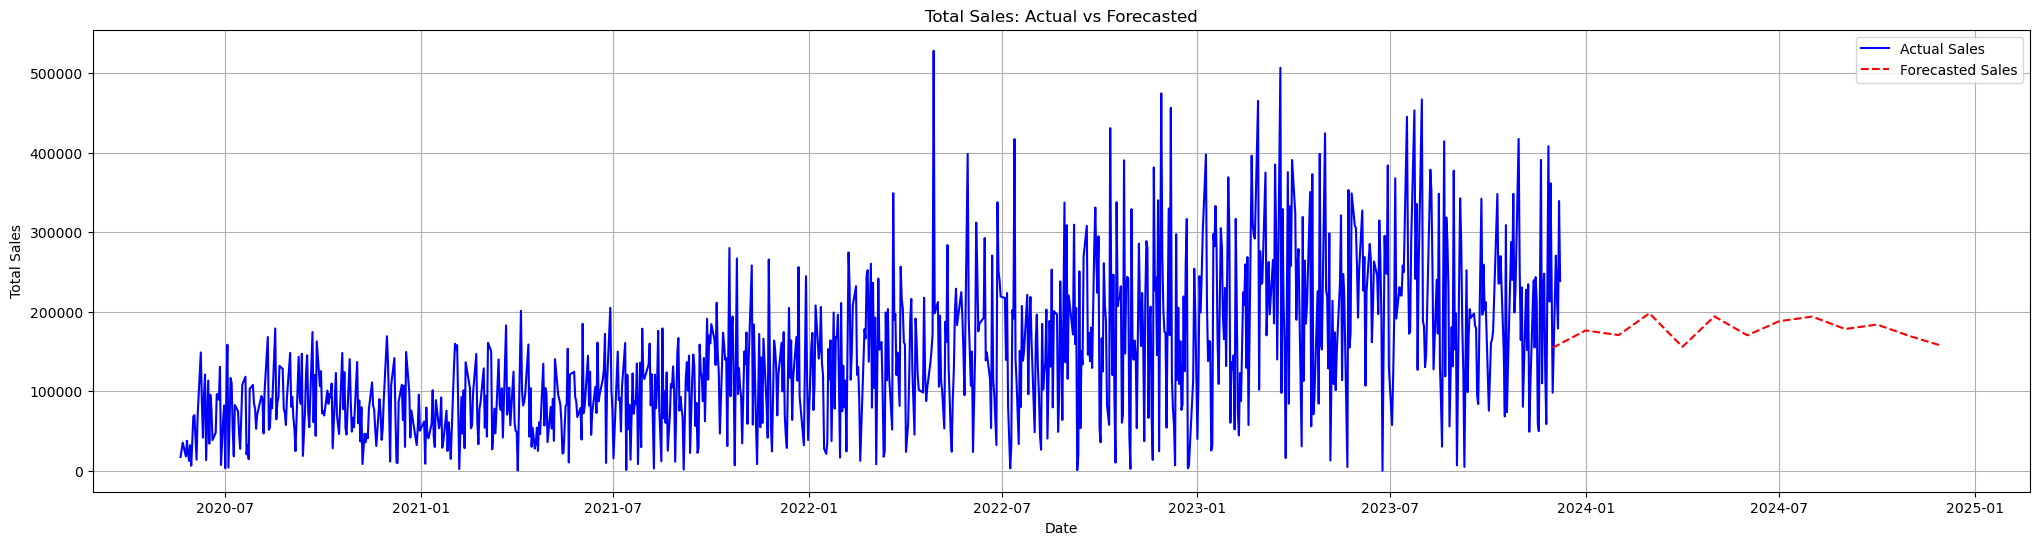

In [41]:
plt.figure(figsize=(25, 6))

# Plot historical data
plt.plot(historical_sales_df['OutDate'], historical_sales_df['TotalSales'], label='Actual Sales', color='blue')

# Plot forecasted data
plt.plot(total_forecast['Date'], total_forecast['Predicted Total Sales'], label='Forecasted Sales', color='red', linestyle='--')

plt.title('Total Sales: Actual vs Forecasted')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()


#### b. Plot for Actual and Forecated for Sales Category

In [42]:
# Convert 'OutDate' to datetime and sort
historical_sales_by_category_df = sales_category_df
historical_sales_by_category_df['OutDate'] = pd.to_datetime(historical_sales_by_category_df['OutDate'])
historical_sales_by_category_df = historical_sales_by_category_df.sort_values('OutDate')

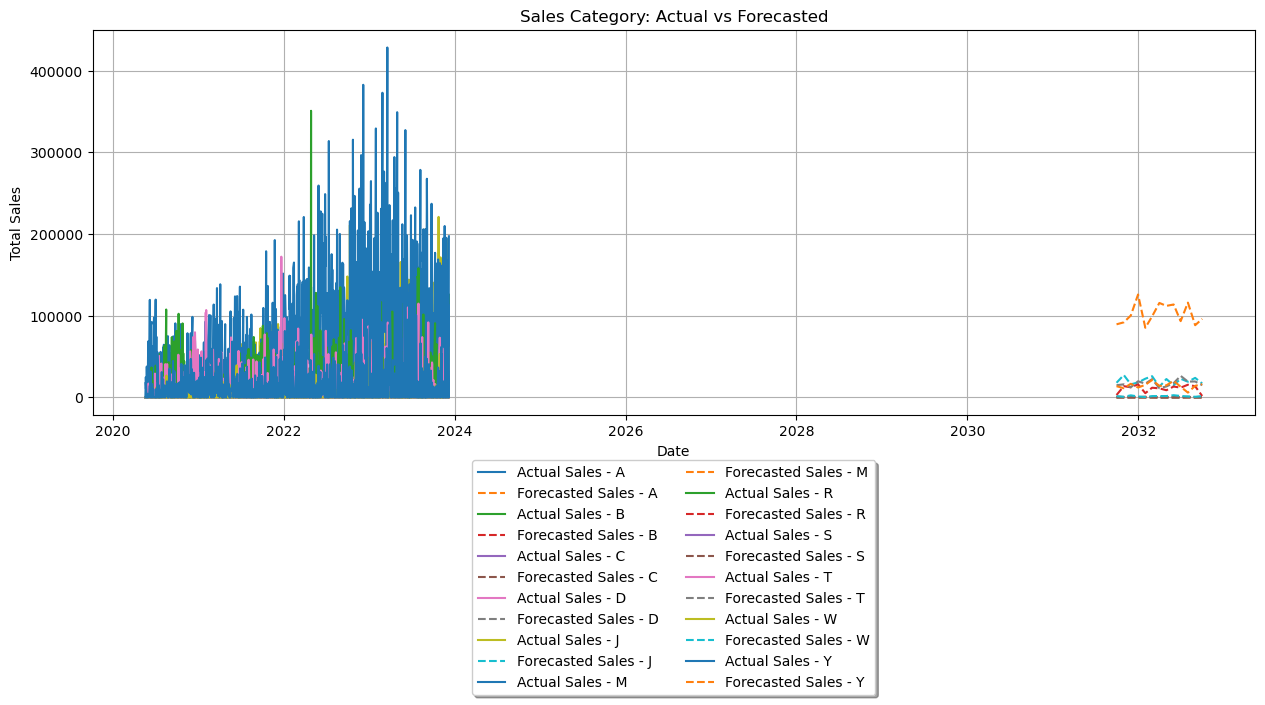

In [51]:
sales_categories = historical_sales_by_category_df['Sales'].unique()

# Set up the plot
plt.figure(figsize=(15, 5))

for category in sales_categories:
    # Filter historical data for the category
    historical_data = historical_sales_by_category_df[historical_sales_by_category_df['Sales'] == category]

    # Filter forecasted data for the category
    forecast_data = future_sales_predictions[category]

    # Plot historical data
    plt.plot(historical_data['OutDate'], historical_data['TotalSales'], label=f'Actual Sales - {category}')

    # Plot forecasted data
    plt.plot(forecast_data['Date'], forecast_data[f'Predicted Sales for {category}'], label=f'Forecasted Sales - {category}', linestyle='--')

plt.title('Sales Category: Actual vs Forecasted')
plt.xlabel('Date')
plt.ylabel('Total Sales')

# Place the legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=2)

plt.grid(True)
plt.show()



### Save data to csv

In [44]:
total_sales_df.to_csv('total_sales_df.csv')

In [45]:
total_forecast.to_csv('total_forecast.csv')

In [46]:
historical_sales_by_category_df.to_csv('historical_sales_by_category_df.csv')

In [47]:
combined_future_sales_predictions = pd.concat(future_sales_predictions.values(), axis=1)
combined_future_sales_predictions.to_csv('future_sales_predictions.csv')